# Python dasturlash tili

## Kirish

Dasturlash tili hisoblash mashinasiga (kompyuter) buyruqlarni ketma-ketiligini berishga muljallangan qattiy gramatik qoidalarga ega notabiiy tildir. Ushbu buyruqlar ketma-ketligini biz kod (code) deb nomlaymiz va ba'zida dastur kori yoki matni deb ham nomlashimiz mumkin. Chunki kod oddiy mant fayllardan iborat bo'ladi odatda. Lekin bundan mustasno hollatlar ham mavjud.

Biz har doim ma'lum bir turdagi narsalarni ularning xusisyatlariga ko'ra bir nechta qismlarga ajratish orqali o'rganamiz va shunda ulardan qachon va qanday vaziyatda foydalanishni yaxshiroq anglaymiz. Shu kabi, dasturlash tillari ularning bajarilishi jihatidan bir qancha turlarga bo'lnadi: quyi, o'rta va yuqori darajadagi dasturlash tillari. Python dasturlash tili yuqorida darajadagi dasturlash tili hisoblanadi. Buni keyinchalik bosqichma-bosqich tahlil qilib boramiz. Ya'na bir boshqasi esa o'zgaruvchilarga ko'radir. Xotirada ma'lumotlarni saqlashda biz har doim o'zgaruvchilardan foydalanamiz, ularga ko'ra esa tillar ikkiga statik va dinamik turlarga bo'linadi. Python esa dinamik tildir. Lekin hozirgi kunda ko'pchilik dasturlash tillari o'zida qo'shimcha imkoniyatlar yaratmoqda, masalan, C# tilida ```var``` kalit so'zi, C++ tilida esa ```auto``` kalit so'zlari kiritilgan.

## Mashina xotirasida qiymatlarni saqlash

Biz mashina xotirasida har doim qiymat(son)larni saqlaymiz undan boshqa narsani emas va o'z navbatida bu sonlarni ham biz o'nlik sanoq sistemasida emas, balki ikkilik sanoq sistemasida saqlaymiz. Masalani, 23 soni bu o'nlikda desak, unda uning ikkilik ko'rinishi 10111 bo'ladi. Agar shu soni 32 bitli xotiraga saqlamoqchi bo'lsak, uning oldiga 27 ta nol qo'shamiz, ya'ni 00000000000000000000000000010111. Agar shu son -23 bo'lsa, unda u quyidagicha bo'ladi 10000000000000000000000000010111, ya'ni soning manifiyligini bildirish uchun birinchi nol 1 ga aylanadi. Bu degani birinchi bit sonning manifiy yoki musbatligi uchun ajratiladi, qolgan 31 bitga esa sonning o'zini saqlaymiz.

Odatda ko'pchilik o'rganuvchilarda savol tug'uladi: `Nimaga biz soni ikkilik ko'rinishda saqlanishini bilishimiz kerak, chunki biz dasturlash tillari bilan ishlayotganimizda ular biz o'zgaruvchiga o'zlashtirgan qiymatni to'g'iridan-to'g'iri ikkilik ko'rinishga o'tkazsa?` Bu jarayon shunday bo'lishi rost, faqat biz nega saqlanayotgan qiymatlarning turlarni va ayniqsa biz haqiqiy sonlar bilan amallar bajarayotganimizda qiymatlarni yuqolishini ham bilishimiz kerak. Buni esa faqat sonlarni qanday xotirada joylashtirishga bog'liqligi asosida tushunishimiz mumkin. Masalan, $-\frac{200}{3}$ soni 32 bitli xotirada IEEE 754 standart bo'yicha quyidagicha bo'ladi. Biz qo'shimcha ushbu misolda soddaroq holni qaraymiz, ya'ni bu haqiqiy standartdagi berilgan hamma hollarni o'z ichiga olmaydi. Berilgan 32 razryadni 3 ta qismga bo'lamiz: 

1. ishora (musbat yoki manifiy uchun) 1 bit;
2. exponenta uchun 8 bit;
3. hamda, mantissa uchun qolgan 23 bit.

| Ishora | Exponenta | Mantissa|
| --- | ----------- | ---|
| 1 | 8 | 23 |

1. Berilgan son manifiy bo'lgani uchun, birinchi bit ga 1 yozamiz. 
2. Exponentani quyidagicha hisoblaymiz. Birinchi soni quyidagi ko'rinishda yozamiz: $\frac{2}{3}10^2$. Keyin esa, 10 sonining darajasidagi 2 sonini ikkilik sanoq sistemasiga o'tkazib, uni Exponentagaga yozamiz. $2_{10}\rightarrow 10_{2}$. Lekin bizda 8 bit bor, shuning uchun $10_{2}$ oldiga 6 nol qo'shamiz, ya'ni $00000010_{2}$.
3. Matnissa qismi $\frac{2}{3}$ ikkilik sanoq sistemasiga o'tkazish orqali amalga oshirladi. Buning uchun shu soni 2 ko'paytiramiz va butun qismidagi soni (0 yoki 1) saqlab qo'yamiz. Quyidagi jadvalda ushbu jarayon batafsil keltirilgan.


Keyinchalik SIning zamonaviy kutubxonalarida bu kabi ta'nlovlarni ko'rishimiz mumkin bo'ladi. Masalan, numpy kutubxonasida ```numpy.float32``` va ```numpy.float64``` o'zgaruvchi turlari mavjud. Bizda har doim muammo bo'ladi qaysi birini tanlash kerak degan, agar biz sonlarni ikkilik ko'rinishda saqlash qanday ekanligini bilsak unda bu qiyinchilikni yengan bo'lamiz. 

|Son|ko'paytiriluvchi son (2)|Ikkilik ko'rinish|
|----|----|----|
|$1+\frac{1}{3}$|$\frac{2}{3}*2$|1|
|$0+\frac{2}{3}$|$\frac{1}{3}*2$|10|
|$1+\frac{1}{3}$|$\frac{2}{3}*2$|101|
|$0+\frac{2}{3}$|$\frac{1}{3}*2$|1010|
|$1+\frac{1}{3}$|$\frac{2}{3}*2$|10101|
|...|...|...|
|...|...|...|
|...|...|...|
|$1+\frac{1}{3}$|$\frac{2}{3}*2$|10101010101010101010101|

Yuqoridagi takrorlash 23 ta raqam bo'lgunicha davom etadi va sonning qolgan qismi tashlab yuboriladi. Ko'rib turganimizdek, biz xotiraga kichkina sonni ham aniq(to'liq) holda saqlay olmas ekanmiz. Shuning uchun sonlarning turlari bilan xotirada ishlayotganda, har bir qismdan maqsadli foydalanish zarur bo'ladi. Hamda ular o'rtasidagi har xil amallarda (+, -, *, /) har doim yaxlitlash xatoligi mavjud bo'ladi va bu o'z navbatida ba'zi vaqtlarda tanlagan matematik modelimiz xatoliklarga olib keladi.

## O'zgaruvchilar

Agar xotiraga biror qiymatni joylashtirmoqchi bo'lsak, u holda bizga kerakli bo'lgan qismga murojaat qiluvchi nom kerak bo'ladi va bu nomni biz o'zgaruvchi deb ataymiz. Bu o'zgaruvchi mashinaning operartiv xoritasi (RAM: Random Access Memory)dan joy egallaydi va biz shu o'zgaruvchiga yangi qiymat yuklashimiz bilan eski qiymatni o'chiradi va yangisini ikkilik (ikkilika o'tkazish jarayoni haqida biz umuman bosh qotirmaymiz) ko'rinishga o'tkazib yozadi va bizda boshqa eski qiymatni olishga imkon bo'lmaydi. Quyida bir qator namunalar berilgan.

In [1]:
# modullarni avtomatik yuklash uchun zarur
%load_ext autoreload
%autoreload 2

In [2]:
a = 4

Python tilida o'zlashtirish amali sifatida tenglik amalidan foydalanamiz, yuqoridagi kod `a` nomli o'zgaruvchi e'lon qildi va unga 4 qiymatni o'zlashtirdi, ya'ni `a`ning qiymati 4 ga teng. Biz o'zgaruvchilarda qanday qiymat saqlanganligini doimiy bilishimiz zarur bo'ladi. Buning uchun eng sodda holatda ```print``` funksiyasidan foydalanamiz hamda bu jarayoni chop qilish deb ataymiz. Hamda, biz ba'zi kodning qatorlarni o'zmiz uchun eslatma sifatida yozish uchun va bu eslatmani mashina buyruq sifatida qaramasligi uchun ```#``` belgisidan foydalanamiz, keyinchalik buni izoh deb ataymiz.

In [3]:
# Bu izoh qatori: bu qatorni mashini buyruq sifatida qabul qilmaydi.
# Ushbu kod ishlashi natijasida hech narsa ro'y bermaydi

In [4]:
# o'zgaruvchi e'loni va unga 4 qiymat yozildi
a = 4
# a o'zgaruvchining qiymatni ko'rish uchun print funksiyasidan foydalanish
print(a)

4


Python tilida bir qator tayyor funksiyalar mavjud va ulardan foydalanish uchun ularning yo'riqnomasini o'qib chiqish zarur bo'ladi. Lekin umumiy bir holat biz funksiya nomidan keyin qavs ichiga unga zarur bo'lgan qiymatlarni berishimiz kerak. Bu qiymatlar o'zgarmaslar ko'rinishida ham bo'lishi mumkin. Misollar:

In [5]:
# o'zgaruvchi e'loni va unga 4 qiymat yozildi
a = 4
# ushbu funksiya bittadan oshiq qiymatlarni qabul qiladi. Natija: 4 14 20
# quyida 14 va 20 sonlari o'zgarmas sonlardir
print(a, 14, 20)

4 14 20


Yuqorida butun turdagi o'zgaruvchilar bilan ishladik, bundan tashqari bir qator turlar mavjud:

1. int - butun
2. float - haqiqiy
3. str - matn

Matni saqlovchi o'zgaruvchilarni e'lon qilishda, o'zgaruvchiga zarur matn `'` yoki `"` ichida beriladi. Misollar:

In [6]:
# Yoshi 14
age = 14
# Familiyasi. Matni ikkita " (qo'shtirnoq) ichiga yozdik
fam = "Abdusamatov"
# Ismi. Matni ikkita ' (tirnoq) ichiga yozdik
# Diqqat ikkisining ham umuman bir-birdan farqi yo'q.
ism = 'Doniyor'
# Og'irligi kgda
# sonning butun va haqiqiy qismini ajratish uchun . (nuqta)dan foydalanamiz
vazn = 78.5
# chop etish
print(fam, ism, age, vazn)

Abdusamatov Doniyor 14 78.5


Yuqoridagi kodga e'tibor bersak, biz umuman o'zgaruvchi turini aytmadik, lekin Python o'zi bu narsani berilgan qiymatga qarab aniqlab oladi. Shuning uchun ham ushbu dinamik turga ega dasturlash tilidir. Bundan tashqari, bitta o'zgaruvchiga dastur ishlash davomida bir nechta har xil qimay bersa ham oxirgisni olib, qolganlarini unutgan holda ishlayveradi. O'zgaruvchi turini bilmoqchi bo'lsak, biz ```type``` funksiyasidan foydalanamiz. Misollar.

In [7]:
# a o'zgaruvchisi e'loni va unga 4 qiymat berildi
a = 4
# a o'zgaruvchisining turi
type(a) # natija int

int

Endi shu o'zgaruvchiga boshqa turli xil qiymatlar berib ko'raylik

In [8]:
# Birinchi a turi int
a = 4
# Endi uning turi float
a = 3.14
type(a)

float

In [9]:
# Birinchi a turi float
a = 3.14
# Endi uning turi str
a = 'salom'
type(a)

str

Yuqorida 3 ta o'zgaruvchi turini e'lon qilishni va ular bilan ishlashni o'rgandik. Lekin ko'pchilik boshlovchilar adashadigan bir holat bor. Masalan quyidagi kodga va uning natijasiga e'tibor beraylik.

In [10]:
# age o'zgaruvchisiga 25 raqami yozildi
age = 25
# age matni chop qilinyapti, bu age o'zgaruvchisi emas!!!
# Natija: age
print('age')

age


Yuqoridagi kodda biz age nomli o'zgaruvchi e'lon qildik va unga 25 qiymatni o'zlashtirdik. Lekin 5-qataorda biz `age` degan matn turidagi qiymatni chop qildik, `age` o'zgaruvchisi emas. Quyida esga ikki holni ham qayta ko'ramiz.

In [11]:
# age ga 25 raqami yozildi
age = 25
# age o'zgaruvchising qiymati chop qilinyapti
print(age)
# age matni chop qilinyapti
print('age')

25
age


### O'zgaruvchi nomlarni aniqlashga cheklovlar va tavsiyalar

Biz xotiraning bir qismini band qilish va shu qismga o'zimizga kerak bo'ladigan qiymatni yozib qo'yishimiz uchun `o'zgaruvchi` tushunchasi bilan tanishdik. Lekin biz ma'lum bir qattiy qoidalarga ega bo'lgan dasturlash tili bilan ishlar ekanmiz, bizda o'zgaruvchilarni e'lon qilishda albatta cheklovlarga egamiz. Quyida ushbu qoidalarning ba'zilari:

1. o'zgaruvchi har doim katta-kichik (masalan, katta harf deb `A`, kichik deb esa `a`) harflar va tag chiziq `_` bilan boshlanadi;
2. o'zgaruvchining qolgan belgilari katta-kichik harflar, raqamlar (0, 1, 2, ..., 9) va tag chiziq `_` belgisi bo'lishi mumkin.
3. har doim katta va kichik harflardan ikki xil o'zgaruvchi paydo bo'ladi. Masalan, `age`, `Age`, `AGE` lar hammasi alohida o'zgaruvchilar, hattoki ma'nosi bir bo'lsa ham.

Quyida birinchi mumkin bo'lgan o'zgaruvchilarga misollarni ko'ramiz, keyin esa uning teskarisiga.

In [12]:
# Mumkin bo'lgan o'zgaruvchilar
# bolaning yoshi
boy_age = 25
# o'rtacha yosh
mean_age = 22
# Uning familiyasi
his_familiy = 'Abdurahmonov'

In [13]:
# Katta-kichik harflaridan farq
# qiluvchi o'zgaruvchilar
# age o'zgaruvchisi
age = 15
# Bu o'zgaruvchi bilan age o'zgaruvchisi
# ikkita alohida o'zgaruvchi
Age = 25

In [14]:
# Taqiqlangan o'zgaruvchilar
12boy_age = 25
mean age = 22
his familiy = 'Abdurahmonov'

SyntaxError: invalid decimal literal (1161089520.py, line 2)

Agar oxirgi kod qismini ishga tushursak biz yuqoridagi kabi xatolikni ko'rishimiz aniq. Har doim dastur bajarilishidan oldin, birinchi kiritilgan kod manti sintaktik tahlildan o'zkaziladi. Agar matnda hech qanday sintaktik xato mavjud bo'lmasa, keyingi bajarilish qismlariga o'tkaziladi.

> Tavsiyalar. Dastur oson o'qilishi va tushunarli bo'lishi uchun biz har doim o'zgaruvchilarga ularning saqlashi mumkin bo'lgan qiymatiga qarab nom berishimiz zarur. Masalan yuqorida, `age` o'zgaruvchisiga doimiy inson (yoki boshqa narsaning) yoshini saqlashimiz maqsadga muvofiq bo'ladi. Agar buning uchun bir nechta so'z zarur bo'lsa, unda tag `_` chiziq bilan yoki har bir so'zning bosh harifini katta harflar orqali ifodalash bilan erishishimiz mumkin. Masalan, `mean_age` - o'rtacha yosh. Yana bir boshqa tavsiya esa, albatta ingliz tilidagi so'zlardan foydalanishdir. Oxirgisi esa agar o'zgaruvchi nomi haddan tashqari uzun bo'lib, qayta yozishga halaqit qilsa unda uni qisqartirib yozish mumkin. Misol uchun, `familiy_name` o'rniga `fam_name` yoki `number_of_objects` o'rniga esa `n_objs`

## Funksiya qaytargan qiymatni olish va ularni chop qilish

Biz shu vaqtgacha faqat ikkita funksiya bilan tanishdik. Shunda ham, faqat ular bilan qisman ishlashni o'rgandik. Shuning uchun ushbu bo'limda, funksiyaning qiymat qaytarishini va ularning natijalarini boshqa o'zgaruvchi saqlab, keyinchalik ulardan foydalanishni o'rganamiz. Python dasturlash tilida har bir funksiya qiymat qaytaradi. Lekin, odatada, dasturlash tillarida biz funksiyalar qiymat qaytarishi yoki qaytarmasligiga qarab ikki turga ajratamiz. Pythonda esa bu holat faqat ```None``` o'zgarmas qiymati bilan amalga oshiriladi. Hozir keling bu qismlarga chuqur kirishmasdan, uning o'rniga, sodda misollar bilan mavzuni tushunaylik. Bu kabi holatlarni esa kelgusida ko'rib chiqaylik. Keling ```type``` funksiyasi qaytargan qiymatni, biror o'zgaruvchiga yozaylikda, keyin uni ```print``` funksiyasi yordamida chop qilaylik quyidagi kodada berilgan kabi.

In [ ]:
# age o'zgaruvchisiga 25 yozish
age = 25
# age o'zgaruvchisi turini olish
age_type = type(age)
# va natijani chop qilish
print(age_type)

<class 'int'>


## ```print``` funkiyasi

Ushbu bo'limda biz ```print``` funksiyasi bilan batafsil tanishishga harakat qilamiz. Chunki biz ushbu funkisyadan ushbu kitob davomida juda ko'p o'rinlarda foydalanimiz. Ushbu funksiya 5 qiymat (argument deb ham nomlaymiz) qabul qiladi, ular:
1. ```*values``` - ushbu argumentga biz chop qilmoqchi bo'lgan qiymatlarimizni beramiz, masalan:

In [ ]:
age = 14
fam = "Abdusamatov"
ism = 'Doniyor'
vazn = 78.5
# chop etish
print(fam, ism, age, vazn)

Abdusamatov Doniyor 14 78.5


Ushbu argument bir nechta qiymatlarni o'z ichiga oladi. Yuqoridagi kodga e'tibor bersak, undagi 4 ta qiymat ham ushbu argumentga tegishli, shuning uchun ham argumentda (```*values```) `*` belgisi bor. Bu kabi tafsilotlarni keyinchalik o'rni kelgandi o'rganamiz.
2. sep - bu satr (matn) turida qiymat qabul qilib, `*values` argumentidagi qiymatlarni o'rtasiga ajratuvchi sifatida yoziladi. Shuning uchun ham uning nomi `sep` ya'ni `separator` ning qisqartmasi. Quyidagi misolni diqqat bilan o'rganing.

In [ ]:
age = 14
fam = "Abdusamatov"
ism = 'Doniyor'
vazn = 78.5
# turli xil chop etishlar
# ajratuvchi sifatida ustun '|' belgisidan foydalanimiz
print(fam, ism, age, vazn, sep='|')
# ajratuvchi sifatida ustun '|' belgisidan foydalanimiz
# va orasiga bo'sh joy ham qo'shamiz
print(fam, ism, age, vazn, sep=' | ')

Abdusamatov|Doniyor|14|78.5
Abdusamatov | Doniyor | 14 | 78.5


Ushbu kodni diqqat bilan kuzatsak, eng farqli bo'lgan tomoni aniqlashmiz mumkin, bu esa biz kodda ```sep='|'``` kodni ishlatishimiz. Biz birinchi 4 ta qiymatni (```fam```, ```ism```, ```age```, ```vazn```) ketma-ket vergul bilan ajratib yozdik va bular jamoa bo'lib ```*values```ga tegishli bo'ldi. Lekin ```sep``` agrumentiga kelganda esa, biz unining nomni berdik, bu kabi funksiya argumentining nomni yozish oshkor ko'rinishda argumentga qiymat berish deb nomlanadi hamda bu shunday qilmasak xatolik ro'y beradi. Bu kabi xatolar nega chiqishi va nega yana shu kabi ko'rinishda foydalanishimiz zarur ekanligini vaqti kelib o'rganamiz. 

3. end -  bu argument ```print``` funksiyasi ishlagandan keyin qanday qiymat qo'yishni aniqlaydi, odatda keyingi qatorga tushish qiymat sifatida turadi. Yuqoridagi kodga e'tibor bersak, unnda ikki chop qilishimiz (```print``` fuknisyasini birinchi va ikkinchi marta chaqirgan qism) natijalari alohida ikki qatorga yozilgan. Keling bir tekshirib ko'ramiz.

In [ ]:
# Yoshi 14
age = 14
fam = "Abdusamatov"
ism = 'Doniyor'
vazn = 78.5
# ushbu koddan keyin albatta keygi chop qilish natijalari yangi qatordan yoziladi
print(fam, ism, age, vazn, sep='|')
# Bunda keyingi chop qilish bilan buning o'rtasida faqat bo'sh joy bo'ladi
print(fam, ism, age, vazn, sep=' | ', end=' ')
# orada bo'sh joy bor
print(fam, ism, age, vazn, sep=' | ', end=' ')

Abdusamatov|Doniyor|14|78.5
Abdusamatov | Doniyor | 14 | 78.5 Abdusamatov | Doniyor | 14 | 78.5 

Yuqoridagi kod bizga ```end``` argumentiga qiymat bermasak natijada keyingi chop qilishlar yangi qatordan boshlanishini ko'rdik. Ushbu funksiyaning boshqa yana 2 ta argumenti bo'lib, biz ularni keyinchalik mustaqil o'rganishga qoldiramiz.

## Tarmoqlanuvchi dasturlash

Shu vaqtgacha biz faqat chiziqli dasturlashdan foydalandik, ya'ni biz yozgan kodlarning hammasi chiziqli (ketma-ket) ravishda ishladi va biror shartga ko'ra ma'lum bir kod qismi qolib ketmadi, albatta izohlardan tashqari (# belgisi bilan boshlanuvchi qatorlar). Bunday kodlash bilan murakkab dasturlarni yozishning iloji yo'q, shuning uchun endilikda biz bosqichma-bosqich chiziqli dasturlashdan tarmoqli dasturlashga, undan keyin esa takrorlanuvchi dasturlashga o'tamiz. Albatta biz har doim ushbu uchta turdan bir vaqtda foydalanamiz. Keling, amaliy misolga o'tsak. Masalan, foydalanuvchi o'zinning shaxsiy sahifasiga kirmoqchi. Buning uchun u dasturga o'zing yashirin paroli va email pochtasini yozishi kerak. Agar foydalanuvchi kiritgan ma'lumotlar mos bo'lmasa, unda biz foydalanuvchiga bu haqida xabar berishimiz kerak. Bu kabi buyruqlarni yozishda, biz `if-elif-else` buyruq strukturasidan foydalanamiz. Avval soddaroq holni qaraylik, bizda $a, b \in R$ (ikkita haqiqiy sonlar ) berilgan bo'lsin. Ulardan qaysi biri katta ekanligini chop qilishimiz kerak, quyidagicha.

In [ ]:
# birinchi son
a = 20
# ikkinchi son
b = 15

# Bu yerda
# 1) if kalit so'z, har doim yozilishi kerak
# ma'nosi - agar
# keyin bo'sh joy tashlab
# Shartni yozamiz: a > b
# Undan so'ngi ikki nuqta (:) majburiy qo'yiladi
if a > b:
  # agar a > b shart to'g'iri bo'lsa
  # else kalit so'zgacha bo'lgan
  # hamma qatordagi kodlar bajariladi
  # faqat biz print funksiyani
  # qator boshidan 2 ta bo'sh joydan keyin yozdik
  print("Birinchi son katta")
# agar a > b shart noto'g'iri bo'lsa,
# else kalit so'zi va ikkit nuqta(:) majburiy
else:
  # agar a > b shart noto'g'iri bo'lsa
  # u holda else: dan keyingi hamma kod
  # bajariladi
  # faqat biz print funksiyani
  # qator boshidan 2 ta bo'sh joydan keyin yozdik
  print("Ikkinchi son katta")

Ikkinchi son katta


Yuqoridagi kodda hozirgacha bo'lgan eng qiyini. Shuning uchun batafsil har xil misollar yordamida tushunishga harakat qilamiz:

1. joriy holda $a=20$ va $b=15$. Shunga asosan $a>b \rightarrow 20>15$ ifoda to'g'iri, ya'ni 20 soni har doim 15 dan katta bo'ladi.
2. Ushbu holni ifodalash uchun biz, Pythonda `if` kalit so'zini yozamiz, undan so'ng esa bizga zarur bo'lgan shartni ya'ni `a > n` va oxirda esa ikki nutqani (`:`)
3. demak, agar $a$ soni $b$ sonidan katta bo'lsa (bu joriy holda to'g'iri), u holda `print("Birinchi son katta")` shu kodni ishlatamiz, ya'ni `Birinchi son katta` natija chiqadi.
4. `print("Birinchi son katta")` kod qismi `if` ga tegishligini ifodalash uchun biz `print("Birinchi son katta")` ni `if` ga qaraganda bir nechta bo'sh joy tashlab, ichkariga kiritgan holda yozamiz (ushbu holda 2 ta).
5. Bu narsani biz ingliz tilida 'indentation' deb ataymiz, o'zbek tilida chekinish deb tarjima qilsak to'g'iri bo'ladi deb o'ylaymiz. Bu narsa dastur kodida sintaktik xato bermasligi uchun, biz har doim bir sondagi bo'sh joy tashlashimiz kerak. Ushbu kitobda biz har doim 2 ta tashlaymiz.
6. Ushbu kodning ikkinchi qismida, ya'ni `if` dagi shart noto'g'iri bo'lganda, biz boshqa kod `print("Ikkinchi son katta")` ni ishga tushirmoqchimiz. Buning uchun biz chekinishi (indentation) `if` bilan bir xil boshlanuvchi `else` (manosi, boshqa holda) kalit so'zni ikki nuqta bilan yozamiz hamda keyingi qatorga ikkitalik chekinishdan keyin esa `print("Ikkinchi son katta")` yozamiz.

Yuqoridagi kod bajarilishi natijasida bizga `Ikkinchi son katta` yozuvi chiqadi. Chunki $a$ o'zgaruvchining qiymati  $b$ nikidan katta. Keling qulay bo'lishi uchun quyidagi atama kiritsak: ushbu kod ishga tushish natijasida bir qismdagi kod ishga tushiriladi (hozirgi holda, `print("Birinchi son katta")`), shu kodlarni `if` ning va `else` ning kodlari deymiz. 

## Mantiqiy(bool) tur bilan ishlash

Bundan oldingi kod yordamida biz tarmoqlanuvchi dasturlashni o'rgandik. Aslida biz `if` kalit so'zidan keyin qo'ygan ifodamiz rost (True) yoki yolg'on (False) ekanligini tekshirdik. Agar ifoda rost bo'lsa, `if` ning kodi bajariladi, aks holde `else` niki. Ushbu $a>b$ ifodaning natijasi ikki xil bo'lishi mumkin: rost(True) yoki yolg'on(False). Bu kabi turni Pythonda ifodalash uchun biz `bool` turidan foydalanamiz. Ushbu turda faqat ikkita qiymat bo'ladi: `True` yoki `False`. Bu turda o'zgaruvchi e'lon qilmoqchi bo'lsak, unda biz `True` yoki `False` qiymatlaridan ishlatamiz. `True` va `False` qiymatlari literal qiymatlar deyiladi. 

In [ ]:
# bool turidagi o'zgaruvchi
a = True
print(a)
b = False
print(b)

True
False


Bunday turni katta, kichik va teng amallari orqali ham yaratishimiz mumkin.

In [ ]:
# a o'zgaruvchisi
a = 15
# b o'zgaruvchisi
b = 20
# a > b ifodani boshqa bool
# turidagi o'zgaruvchiga
# yuklash
c = a > b
print(c)

False


Natija har doim `False` chiqdi chunki $b$ o'zgaruvchisining qiymati $a$ nikidan katta. Keling bundan oldingi kodi qayta yozaylik. Faqat yuqoridagi kod kabi, shart natijasini boshqa alohida o'zgaruvchiga yuklab.

In [ ]:
a = 20
b = 15
c = a > b
if c:
  print("Birinchi son katta")
else:
  print("Ikkinchi son katta")

Birinchi son katta


Ushbu turda bir qancha turli xil amallar mavjud bo'lib, ular odatiy matematik amallardan farqlanadi, ular:

1. `and` - amali ikkita qiymat ham rost (`True`) bo'lsa natija ham rost `True`

In [ ]:
a = True
b = True
# natija True
c = a and b 
print(c)
a =True
b = False
# natija False
c = a and b
print(c)

True
False


2. `or` - amali ikkita qiymatdan biri rost (`True`) bo'lsa, natija ham rost `True`

In [ ]:
a = True
b = True
# natija True
c = a or b 
print(c)
a =True
b = False
# natija True
c = a or b
print(c)
a =False
b = False
# natija False
c = a or b
print(c)

True
True
False


3. `not` - amali qiymatni teskarisiga o'tkazadi, rost bo'lsa yolg'on yoki yolg'on bo'lsa rostga

In [ ]:
a = True
# natija False
c = not a
print(c)
a = False
# natija rost
c = not a
print(c)

False
True


## `if-elif-else` operatori

O'tgan boblarda biz ushbu operatorning qisqartirilgan ko'rinishi bilan tanishdik. Ushbu qismda esa to'liq o'rganib chiqamiz. Avvalo ushbu operator ishlashi uchun eng kamida operatorning if qismi bo'lishi shart. Qolgan ikki qismi `elif` va `else` kodga qarab zurur bo'lsa ishlatiladi.

In [ ]:
# email o'zgaruvchisi
email = 'example@mail.com'
# yuqoridagi email to'g'iriligini tekshirish
if email == 'example@mail.com':
  # if ning kodi
  print("Kiritilgan email to'g'iri")

Kiritilgan email to'g'iri


Bu operatorning `elif` (else if) qismi bir vaqtda undan oldingi `if` yoki `elif` ga teskarilikni hamda ya'na bitta shartni bildiradi. Quyidagi kiritilgan $a$ raqamini so'zlar bilan ifodalashga misolni ko'raylik.

In [ ]:
a = 5
# a=0 bo'lgan holat
if a == 0:
  print('Nol')
# # a=1 bo'lgan holat
elif a == 1:
  print('Bir')
elif a == 2:
  print('Ikki')
elif a == 3:
  print('Uch')
elif a == 4:
  print('To\'rt')
elif a == 5:
  print('Besh')
elif a == 6:
  print('Olti')
elif a == 7:
  print('Yetti')
elif a == 8:
  print('Sakkiz')
elif a == 9:
  print('To\'qiz')
else:
  print("Kiritilgan son 0 va 9 orasida bo'lishi shart")

Besh


Yuqoridagi kod birinchi `if` yordamida $a$ o'zgaruvchisi qiymatini 0 ga tekshiradi, agar teng bo'lmasa o'zidan keyingi, birinchi `elif` ishlaydi va bu soning qiymatini 1 ga tengligini tekshiradi va shu tarzda davom etadi. Oxirida esa, raqamlar tugagandan so'ng, `else` qismida raqam chegaradan chiqib ketdimi yo'qmi shu tekshiriladi. Agar ushbu ketma-ketlikning biror shart to'g'iri bo'lsa, shu qismdagi kod ishlaydi va dasturning qolgan qismlariga (shartlariga) o'tilmaydi. Yuqoridagi qiymat 5 bo'lgani uchun biz `Besh` ni natija sifatida ko'rdik. Demak, beshgacha bo'lgan 6 shartni bittalab tekshirilgan va ulardan birinchi beshtasi noto'g'iri bo'lgan.

## Namunalar

Keling yuqorida o'rganib chiqqan mavzularimizga ozroq qo'shimcha qilib internet sahifasiga kirishga ruxsat bor yoki yo'qligini tekshiruvchi kichkina dastur yozib ko'raylik va shu orqali olgan bilimlarimizni mustahkamlaylik. Buning uchun foydalanuvchi tomonidan qiymatlarni kiritishni birinchi o'rganaylik. Buning uchun biz `input(str)` funksiyasidan foydalanamiz, bu funksiya bizga `str` (satr) turida qiymat qaytaradi. Quyida foydalanuvchi kiritgan matni chop qiluvchi dastur.

In [ ]:
# matni name o'zgaruvchisiga yozish
name = input('Ismingizni kiriting: ')
# Kiritilgan qiymatni chop qilish
print('Sizning ismingiz:', name)

Sizning ismingiz: Alisher


Yuqorida ko'rib turganimizdek, biz birinchi `input()` funksiyasi orqali foydalanuvchi o'zining ismini yozishi uchun maydonni hosil qilyabmiz. Foydalanuvchi o'zining ismini kiritib, keyin 'kiritish' (Enter) tugmasini bosgandan so'ng, biz `input()` funksiyasi qaytargan natijasini ekranga chiqarayapmiz. Agar qaytarilgan qiymat, masalan, foydalanuvchi yoshi bo'lsa unda, biz bu qiymatni butun songa o'tkazishimiz kerak, chunki `input()` funksiyasi har doim sart qaytaradi. Buning uchun bizda tayyor funkiyalar har bir tur uchun mavjud. Oson bo'lishi uchun avval `str` va `int` o'zgaruvhisi farqiga oid ba'zi sodda misollarni qarab chiqaylik. Quyidagi kodda ulardan bir nechtasiga namuna keltirilgan.

In [ ]:
# a qiymatni insoning yoshini saqlaydi
# a o'garuvchisi satr butun emas
a = '25'
# keyinig o'zgaruvchini qaraylik
# bu o'zgaruvchi butun turda
b = 20

# agar o'zgaruvchini qo'shsak
# unda xatolik yuz beradi
# chunki satr turiga butun turni
# qo'shish mumkin emas
c = a + b
print(c)

TypeError: can only concatenate str (not "int") to str

Agar yuqoridagi kodni to'g'irlab ishlatmoqchi bo'lsak, unda $a$ sonini `int` turiga o'kazishimiz zarur. Buning uchun `int()` funksiyasini ishlatamiz.

In [ ]:
a = '25'
b = 20
# a ning qiymatini int turiga
# o'girib uni d 
# o'zgaruvchisiga saqladik
d = int(a)
c = d + b
print(c)

45


Bir eng muhim jihatdni turdan boshqa turga o'zgaruvchini o'tkazishdan oldin bilishimiz kerak. Odatda biz hamma turlarni boshida satr ko'rinishida, ya'ni satr turida olamiz va ularning qanday ma'lumot ekanligiga qarab mos turlarga o'giramiz. Lekin har doim ham bunday qilishning iloji yo'q. Masalan, tassavur qilaylik foydalanuvchi o'zining yoshini kiritish jarayonida xatolik qilib qo'ydi. Misol uchun '22' o'rniga '22a' yoki '22 ' kiritib qo'ydi. Unda yuqoridagi `int()` funksiyasi xatolik qaytaradi va dastur oxirigacha yetmasdan yakunlanadi. Quyidagi kodda ushbu hol uchun ba'zi bir misollarni ko'ramiz.

In [ ]:
# to'g'ir holat
age = '22'
# natija <class 'str'>
print(type(age))
# endi int turiga o'tkazaylik
age = int(age)
# natija <class 'int'>
print(type(age))
# xato hollatlar
age = int('22a') # bu yerda xatolik bor
# bu joyga kod kelmaydi
print(age)

<class 'str'>
<class 'int'>


ValueError: invalid literal for int() with base 10: '22a'

Bu kabi hollatlarda biz `ValueError` ga ega bo'lamiz, buning ma'nosi kiritilgan qiymatni ('22a') `int` turiga o'girib bo'lmaydi.

Endi asosiy maqsadimiz bo'lgan, dasturga qaytsak bo'ladi.

In [ ]:
email = input('Emailingizni kiriting: ')
password = input('passwordingizni kiriting: ')
# birinchi shart
a = email == 'example@mail.com'
# ikkinchi shart
b = password == 'qwerty1234'
# foydalanuvchi sahifasiga kirishi
# uchun ikkisi ham
# bir vaqtda to'g'iri
# bo'lishi kerak
if a and b:
  print("Siz shaxsiy sahifangizdasiz")
else:
  print("Email yoki parolingiz xato kiritilgan")

Siz shaxsiy sahifangizdasiz


## Topshiriqlar

# Chiziqli algebra

## Kirish

Ushbu fan matematikaning sohalaridan biri bo'lib, asosan vektorlar va matritsalar ustida amalarni o'rganadi. Lekin umumiy holda vektor fazolar va chiziqli transformatsiyalarni vekotrlar va matritsalar asosida o'rganadi. Biz ushbu qo'lanmada ko'proq amaliy o'rganganimiz uchun, chiziqli algebraning soddaroq bo'lgan qismi ya'ni vektorlar va matritsalar ustida amallarni o'rganimiz. Lekin mashinali o'rganish fanida bizga ba'zi transformatsiyalar zarur bo'ladi, ularni esa qisman o'rganamiz.

Vektor deb kattalik va yo'nalishga ega bo'lgan qiymatga aytamiz. Masalan, $a(3, 4)$ vektor ikki o'lchovli fazoda quyidagicha tasvirlanadi.

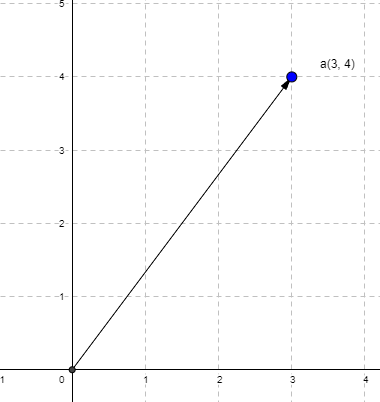

In [ ]:
# Ushbu kod faqat quyidagi rasmni ushbu qo'llanmaga qo'shish uchun ishlatildi
from IPython.display import display, Image
display(Image(filename="2d-vector-example.png", height=400, width=400))

Biz ushbu darslar davomida uning geometrik xususiyatini hozircha qaramasdan, uning o'rniga oddiy o'zgaruvchi deb Python dasturlash tilida o'rganamiz. Agar vektordagi qiymatlar soni boshqacha bo'lsa, masalan $a(3, 5, 2, 6)$ unda bu kabi vektorlarni biz tasavur qilishimizning imkoni yo'q. Shuning uchun ularning chizmasiga e'tibor bermasdan, uning o'lchovi va yo'nalishiga e'tibor beramiz. Hamda vektorni tashkil etuvchi qiymatlarni (so'ngi holda, 3, 5, 2, 6) uning elementlari deb nomlaymiz. Agar uning biror elementiga murojaat qilmoqchi bo'lsak, unda quyidagicha yozamiz $a_1$ va bu murojaatni indekslash deb ataymiz. Bu kab indekslash matematikaga xos bo'lib, dasturlash tillarida bu narsa farqlanadi. Masalan, bizga elementlari haqiqiy sonlardan iborat bo'lgan $a$ vektor berilgan desak, uni odatda quyidagicha ko'rishida yozamiz: $a\in R^n$. Demak $a$ vektorda $n$ ta element bor va uning $i$-elementi $a_i$ bilan belgilanadi.

> E'slatma. Biz vektorlarni belgilashda unlarning haqiqiy ko'rinishdan foydalanmadik, aslida har bir vektor qiymatga va songa ega bo'lgani uchun va ularni vektorligini anglatish uchun yuqoridagi faqat son qiymat emas balki uning yo'nalishini ham ko'rsatishimiz kerak. Lekin bu yo'nalishni matnlarda berishning iloji yo'q, uning o'rniga odatda biz $\overrightarrow{a}$ dan foydalanamiz, masalan yuqoridagi vektorni to'g'iri ko'rinishi $\overrightarrow{a}(3, 5, 2, 6)$ bo'ladi. Biz ushbu qo'llanmada bu belgini ishlatmaymiz.
Bu yerda $R$ harfi har doim haqiqiy sonlar to'plamini anglatadi. Misol uchun agar bizda $b \in R$ bo'lsa, u holda biz $b$ ning qiymati haqiqiy son deb tushunamiz hamda odatda biz bu son (o'zgaruvchi) haqiqiy yoki butun deb yozmasdan shu qisqa belgilashdan foydalanamiz. Ushbu bosqichma-boshqich sohaga kirish, umid qilamizki kelajakda chuquroq fani o'rganishga ko'mak beradi.

## Vektorlarni Pythonda e'lon qilish

Ushbu turdagi o'zgaruvchilarni e'lon qilish uchun Pythonda ikki xil o'zgaruvchi turi mavjud ulardan birinchi ```tuple```(qulaylik uchun biz shu turdan foydalanib turamiz). Misollar:

In [ ]:
# a vektor o'zgaruvchisi e'loni va uning qiymati
a = (3, 4)
# Chop qilish
print(a)
# 4 o'lchovli vektor
b = (4, 6, 23, 6)
print(b)
# Agar bir o'lchovchli bo'lsa, har doim bitta vergul quyish shart, shunda oddiy sondan farq qiladi.
c = (4, )
print(c)

(3, 4)
(4, 6, 23, 6)
(4,)


### Indekslash
Keling hozir biror insoni uning yoshi, bo'yi va vazni bilan ifodalovchi vektorni qaraylik. Hammda shu misol orqali qanday qilib inkeslash Pythonda ishlashini tushunib olaylik. Matematikadan farqli ravishda, Pythonda indekslash har doim 0 dan boshlanadi, ya'ni $a_1$ ni ifodalash biz Pythonda `a[0]` deb kod yozamiz.

In [ ]:
# inson: yoshi, bo'yi va vazni
human = (18, 175, 70)
# uning har bir parameterni chop qilish
# agar insonning faqat yoshini chop qilmoqchi bo'lsak,
# unda, uning 0 chi indeksini chop qilaylik
print(human[0])

18


E'tibor bering, biz hech qachon insoni ifodalovchi bir nechta qiymatlarni bitta o'zgaruvchi ositga jamlaganimizda, har bir qiymatga o'zgaruvchi e'lon qilmaymiz va ```human[0]``` deb uning yoshini tushunamiz, ```human[1]``` deb esa uning bo'yining uzunligini. Agar indekslashda xato qilsak, masalan, qiymatlarning joyini almashtirib qo'ysak, unda dastur bizga qiymatlarni chiqarishda davom ettaveradi, faqat natijalar xato bo'ladi. Buni ko'rish uchun keling, ```print``` funksiyasida nimani chop qilayotgan ekanimizni matnlar orqali tasvirlaylik.

In [ ]:
# inson: yoshi, bo'yi va vazni
human = (18, 175, 70)
# yoshini chop qilish
print('Berilgan insoning yoshi:', human[0])
# agar indekslashda boshqa qiymat berib qo'ysak
# unda ham ishlayveradi
print('Berilgan insoning yoshi:', human[2])
print('Berilgan insoning yoshi:', human[1])

Berilgan insoning yoshi: 18
Berilgan insoning yoshi: 70
Berilgan insoning yoshi: 175


Yuqoridagi kod bizga yaqqol ushbu turdagi xatolikni ko'rsatib berdi. Shuning uchun biz har doim qaysi o'ringa qanday qiymat qo'yanimizni esalab qolishimiz hamda shunga mos ravishda ularga murojaat qilishimiz zarur bo'ladi. Ushbu kodning oxirgi ikkitasi yosh qiymatini emas balki boshqa narsalarni chop qilmoqda. Biroq uning birinchisidagi qiymat 70 bunda yosh mavjud xato bo'lsa ham, lekin ikkinchisi bizga aniq xatoligi ko'rinib turibdi. Birinchi kabi xatolik bizga koddagi kamchiliklarni topishimizga xalaqit qiladi. Shuning uchun eng yaxshisi kodni yozishda e'tiborli bo'lishdir. Quyidagi kod yuoqirdagi kodning to'liq va to'g'iri holatini ifodalaydi.

In [ ]:
# inson: yoshi, bo'yi va vazni
human = (18, 175, 70)
# yoshini chop qilish
print('Berilgan insoning yoshi:', human[0], 'yosh')
print('Berilgan insoning bo\'yi:', human[1], 'sm')
print('Berilgan insoning vazni:', human[2], 'kg')

Berilgan insoning yoshi: 18 yosh
Berilgan insoning bo'yi: 175 sm
Berilgan insoning vazni: 70 kg


> Odatda biz qiymatlarning birligini xotirada saqlamaymiz, ularni mantiqan o'zimiz bilamiz, lekin foydalanuvchiga (dasturdan kimdir foydalansa), unda biz ularga qiymatlar haqida qo'shimcha axborotni berishimiz zarur bo'ladi. E'tibor bering, biz quyidagicha matndan foydalandik ```'Berilgan insoning bo\'yi:'```, ya'ni ```\``` belgisi. Agar matnda tirnoq ' belgisini ishlatish zarur bo'lsa, unda biz uning oldiga ```\``` belgisini qo'yishimiz yoki uni qo'shtirnoq (") belgisi yordamida yozishimiz kerak bo'ladi. Quyidagicha.

In [ ]:
# inson: yoshi, bo'yi va vazni
human = (18, 175, 70)
# yoshini chop qilish
print('Berilgan insoning yoshi:', human[0], 'yosh')
# Yuqoridagi va paski satrlar faqat tirnoq (')
# bilan yozilgan 
# o'rtadi esi qo'shtirnoq bilan
print("Berilgan insoning bo'yi:", human[1], 'sm')
print('Berilgan insoning vazni:', human[2], 'kg')

Berilgan insoning yoshi: 18 yosh
Berilgan insoning bo'yi: 175 sm
Berilgan insoning vazni: 70 kg


## Vektorlar ustida amallar

Chiziqli algebra kursida vektorlar ustida minglab amallarni ko'rib o'rganish mumkin. Lekin biz ushbu kitobda bizga zarur bo'lgan amallarni zarur o'rinlarda ketma-ket o'ganib boramiz. Ushbu amallarni tushinish uchun odatda biz geometrik usuldan foydalanamiz, aks holda bu amallar ba'zida ma'noga ega bo'ladi, ya'ni biz uni hayotiy tushunchalar bilan anglashimiz mumkin, ko'plarini emas yo'q. Masalan, yuqoridagi misoldagi kabi ikki insoni 3 qiymat bilan ifodalaylik va ularni bir biriga qo'shaylik, nima hosil bo'ladi, bu narsa bizga tushunarsiz. Lekin boshqa hollarda tushunish mumkin, masalan, inson faqat oylik moashi va bolalari soni bilan ifodalansa, unda ikki insoning moashining yig'indisi va birgalikda bolalarining soni deb tushunish mumkin. Keling umumiylikni yuqotmasdan, vektorlar ustida amallarni ko'rib chiqaylik. Birinchilari hammamiz eng ko'p ishlatadigan 4 arfimetik amallardir.

1. Ikki vektorni qo'shish va ayirish amallari mos indekslardagi qiymatlarining yig'idisi va ayirmasi bilan yangi vektor hosil qilishdir, ya'ni $a, b \in Z^3$ (ma'nosi, ikkita vektor berilgan va har birida 3 tadan butun turdagi qiymat mavjud), unda umumiy ko'rinishi $c=a\pm b$. Agar har bir elementi bo'yicha yozmoqchi bo'lsak, u holda $c_1=a_1+b_1, c_2=a_2+b_2,c_3=a_3+b_3$. Pythonda kodi. 

> Bu yerda $Z$ butun sonlar (masalan, ..., -10, -9, ..., -2, -1, 0, 1, 2, ..., -10, ... ) to'plamini ifodalaydi. Ba'zi manbalarda ushbu to'plamni $I$ harfi bilan ham belgilashadi.

In [ ]:
# ikkita butun turdagi tuple o'zgaruvchisi
a = (2, 4, -3)
b = (4, 2, 5)
# ularning har bir elementini alohida alohida qo'shish
# va yangi c vektorini hosil qilish
c = (a[0] + b[0], a[1] + b[1], a[2] + b[2])
# chop qilish
print('a+b=', c)
# ularning har bir elementini alohida alohida ayirish
# va yangi c vektorini hosil qilish
c = (a[0] - b[0], a[1] - b[1], a[2] - b[2])
# chop qilish
print('a-b=', c)

a+b= (6, 6, 2)
a-b= (-2, 2, -8)


Ushbu yig'indining geometrik ma'nosi quyidagi ikki o'lchovli koordinatalar sistemasida keltirilgan. Unga ko'ra, agar ikki $a$ va $b$ vektorlarni bir-biriga qo'shsak, u holda ikkisning yo'nalishidan hosil bo'lgan yangi vektorni tasavur qilamiz. Masalan, ikkita kishi aravani bir tomonga qaratib tortib ketyabdi va ularning tortish kuchlari orasida ma'lum bir burchak bor, shunda arava qandaydir tezlik bilan harakatlanishi mumkin.

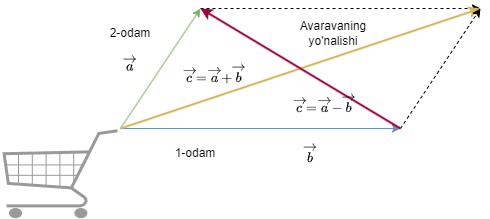

In [ ]:
# Ushbu kod faqat quyidagi rasmni ushbu qo'llanmaga qo'shish uchun ishlatildi
from IPython.display import display, Image
display(Image(filename="vector_pm_operation.png", height=400, width=400))

2. Ikki vektor o'rtasida ko'paytirish amalining bir nechta ko'rinishlari mavjud. Shuning uchun biz hozir skalyar ko'paytmani (ko'p adabiyotlarda nuqtali ko'paytma (dot product)) o'rganamiz. Bu ko'paytma ikki vektorning mos elementlarining ko'paytmasning yig'indisi hisoblanadi. Matematik ko'rinishi, agar yuqoridagidek 3 ta elemenetdan tashkil topgan bo'lsa, ya'ni $a, b \in Z^3$. $c=ab=a_1b_1+a_2b_2+a_3b_3$.

In [ ]:
# ikkita butun turdagi tuple o'zgaruvchisi
a = (2, 4, -3)
b = (4, 2, 5)
# ularning har bir elementini alohida alohida qo'shish
# va yangi c vektorini hosil qilish
c = a[0] * b[0] + a[1] * b[1] + a[2] * b[2]
# chop qilish
print('a*b=', c)

a*b= 1


3. Oxirgi sonlar ustida mavjud bo'lgan bo'lish amali vektorlar ustida aniqlanmagan.
4. Ikki vektor orasidagi masofa. Ushbu amalni sonlar ustida doimiy ishlatamiz hamda u har doim musbat bo'ladi. Chunki biz ikki kishining yoshilarining farqi qancha desak unda biz, masalan, 15 yosh deymiz. Aslida esa kichigidan kattasini ayirsak unda manifiy son hosil bo'ladi, aytaylik 45 yoshli odam 60 yoshli odamdning yoshidan ayirsak, unda -15 bo'ladi. Bu esa ikkis orasidagi masofani, ya'ni farqni ifoday olmaydi. Shuning uchun masofa musbat bo'lishi kerak. Buning uchun biz matematikada sonning moduli degan tushunchani ishlatamiz, masalan, $\vert a \vert$. Bunda $a$ ning qiymati musbat bo'lsa ham manifiy bo'lsa ham musbat son chiqadi. Biz yuqorida fazoda tartib aniqlanmaganligi haqida bahs yuritgan edik, ya'ni bir vektorni ikkinchi vektordan katta yoki kichik deyish mumkin emas. Shuning uchun ham ikki vektor orasidagi masofa ma'lum bir shartlarni qanoatlantirishi kerak hamda eng asosiysi vektorlar nechta elementdan tashkil topishidan qattiy nazar masofa bitta son bo'lishi kerak. Shundagina biz ularni solishtira olamiz. Ushbu amalni ikki vektorni parameter sifatida oluvchi funksiya ko'rnishida yozamiz, ya'ni $\rho(x, y)$.
    * $\rho(x, y) \geq 0$ - manifiy bo'lmasligi zarur;
    * $\rho(x, y)=0 \leftrightarrow x=y$ - ikki vektor teng bo'lsa, ularning orasidagi masofa 0 ga teng bo'lishi kerak;
    * $\rho(x, y) < \rho(x, y) + \rho(x, z)$ - 3 ta vektor o'rtalaridagi masofaning burchak sharti.

Vektorlar ustida oddiy sonlardan farqli ravishda bo'lish amali mavjud emasligini ko'rdik. Buning sababini o'rganish uchun avval vektorlar o'rtasidagi yuqorida keltirilgan ko'paytmani muhokama qilaylik. Chunki yuqorida aytilgan ko'paytma bu skalyar ko'payma va bu ikki vektorning ko'paytmasini bitta songa o'kazadi. Shuning uchun ham odatda bu skalyar ko'paytma vektorlar o'rtasidagi umumiy ma'nodagi ko'paytmani anglatmaydi. Biz qo'shish amaliga ayirish amalini teskari deymiz, ya'ni biror soni ikkinchi songa qo'shsak va keyin ayirsak natija o'zgarmaydi. Bo'lish ham xudi shunday ko'paytirish amalining teskarisi va yuqoridagi skalyar ko'paytma vektor natija bermasligi sababli bo'lish amali aniqlanmagan. Albatta bu sabab qisman to'g'iri lekin to'liq emas, chunki ushbu ko'paytmani boshqacha aniqlash ham mumkin, ammo bu holda ham amallarning ba'zi xossalari yuqoladi. Bu kabi holatlar chiziqli algebra kursida to'liq o'rganiladi. Biz esa boshqa tafsilotlarini keltirmadik.

Shu o'rinda yana bir boshqa narsani ta'kidlash joizki, avvalgi ikki qo'shish va ayirish amalarining ma'nosi ravshan. Lekin, yana, ko'paytmaniki tushunarsiz. Ushbu ko'paytmani bir nechta amaliy va nazariy ko'rinishda tushuntirish mumkin. Biz ulardan eng keraklisi bo'lgan geometrik ma'nosini keltiramiz. Bu ko'paytma shu ikki vektor orasidagi burchakka aloqador, ya'ni

\begin{equation}
a\cdot b=\vert\vert a\vert\vert\vert\vert b\vert\vert cos \theta
\end{equation}
bu yerda $\theta$ - ikki vektorning orasidagi berchak qiymati. Agar ikki vektor bir biriga perpendikulyar bo'lsa, u holda bu ko'paytma natijasi 0 ga teng bo'ladi. Bu kabi vektor xosalari Chiziqli algebrada va boshqa fanlarda juda muhim ahamiyat kasb etadi.

### Vektorlar o'rtasida taqqoslash amallari
Biz odatda ikki narsani qaysi bir kattaroq yoki kichikroqligini aniqlash uchun har doim ularni olishtiramiz. Agar qiymat ikkita son bo'lsa, unda ularni taqqoslab bo'ladi, chunki ular bitta sonlar o'qida joylashgan va tartiblangan. Masalan, natural sonlar (1, 2, 3, 4, ...) har doim biri ikkinchidan keyin keladi va ular tartibga ega. Lekin bu kabi taqqoslashlarni vektorlar o'rtasida kiritib bo'lmaydi chunki ular bittandan ortiq elementlar orqali ifodalanadi hamda ikki va undan katta o'lchovli fazoda tartib yo'q. Keling, misol uchun Alisher va Baxromni olaylik va ularni yoshi, bo'yi hamda vazni bilan ifodalaylik. Masalan, Alisher(22, 180, 86) va Baxrom(24, 175, 90). Agar bizga shu qiymatlarni berib, kim katta desa qanday aniqlaymiz? Bu narsaning iloji yo'q, bo'lsa ham aynan qaysidir bir elementi bo'yicha aytamiz, bunday hollarda esa biz sonlar ustida ishlayotgan bo'lib qolamiz.

Odatda biz mashinali o'rganish fanida shunga o'xshash muammolarga duch kelamiz. Masalan, sodda qilib aytsak, biror bemor 10 ta har xil ko'rsatgichlar bilan ifodalangan (yoki aniqlangan), misol uchun: yoshi, jinsi, qon bosimi, yurak urushi va boshqalar. Bizning vazifa esa, ushbu bermorning holatini aniqlash bo'ladi. Bunda biz yuqoridagi 10 ko'rsatgichni vektor shaklida tasvirlab, ulardan bitta qiymat hosil qilishimiz kerak bo'ladi, misol uchun bemordaning holato 'yaxshi' yoki 'yomon'. Bu kabi narsalar agar vektorning elementlari bir biriga bog'liq narsalarni ifodalasa juda oson. Tassavur qilaylik, odamning pul mablag'lari, ikkita alohida bank hisobida va ikki xil valyutada. Masalan, Alisher (20, 150000) va Baxrom(15, 200000), ya'ni Alisherning 20 dollari va 150 ming so'm puli bor hamda Baxromning esa 15 dollari va 200 ming so'm puli bor. Ushbu misoladigi kabi hollarda biz bemalol kimda ko'p pul borligini aytishimiz mumkin, albatta bir valyuta ko'rinishiga o'tkazib va ularning yig'indisini olgan holda. Lekin birinchi bemor haqidagi misolda esa bu narsaning iloji yo'q. Ushbu bo'limda aytmoqchi bo'lgan asosiy fikrimiz bu vektor elementlarni odatda bitta qiymatga o'tkazib olamiz va shu orqali ularni tushunamiz. Bu haqida mashinali o'rganish bo'limlarida batafsil o'rganib chiqamiz.

### Vektorlar ustida amalarning matematik ko'rinishi
Biz oldingi bobda asosan 3 ta elementdan iborat bo'lgan vektor uchun qo'shish, ayrish va ko'paytirish amalarini yozdik. Aslida agar ularning elementi ko'p bo'lsa qanday yozamiz? Buni ushbu qismda batafsil o'rganib chiqamiz va shu bilan birgalikda ba'zi matematik ifodalarni ham o'rganamiz. Tassavur qilaylik bizda $a \in R^n$ (n ta haqiqiy elementdan iborat vektor) bor. 

1. Uning elementlarining yig'indisining topishni matematik ifodalamoqchi bo'lsak, u holda eng sodda yo'li quyidagicha: $a_1+a_2+\dots+a_n$. Lekin bu shakda yozish har doim ham qulay emas, ayinqsa ifoda uzun bo'lganda. Shuning uchun quyidagi belgidan foydalanamiz $\sum$ - yig'indi belgisi. Hamda oldingi ifodani quyidagicha yozamiz: $a_1+a_2+\dots+a_n=\sum_{i=1}^{n}a_i$. O'qilishi, yig'indi $i=1$ dan $n$ gacha ($n$ har doim kiradi).
2. Agar ushbu vektorning hamma elementlarning bir-birga ko'paytmasini topish kerka bo'lsa, u holda $\prod$ ko'paytma belgisidan foydalanamiz - $a_1*a_2*\dots*a_n=\prod_{i=1}^{n}a_i$. O'qilishi, ko'paytma $i=1$ dan $n$ gacha ($n$ har doim kiradi).
3. Demak ikki vektor o'rtasidagi skalyar ko'paytmani quyidagicha yozish mumkin, agar $a, b \in R^n$ berilgan bo'lsa. $ab=\sum_{i=1}^na_ib_i$.

# Pythonda operatorlari

Bundan oldingi Pythonga oid boblarda biz tarmoqlanuvchi dasturlashni o'rgandik. Lekin o'tgan chiziqli algebraga oid bobda biz vektorlar ustida amallar bilan ishladik. Lekin ularni Pythonda faqat uchta elementdan ibroat bo'lgan holatini ko'rib chiqdik. Shuning uchun bu bobda biz Python n ta elementdan iborat bo'gan vektorlar bilan ishlashni o'rganamiz. Buning uchun bizga Takrorlanuvchi dasturlashni o'rganishimiz kerak bo'ladi ya'ni kodning ma'lum bir qismi bir nechta marta qayta ishga tushiriladi. Hamda bu orqali biz murakkab dasturlarni yozish imkoniyatiga ega bo'lamiz.

Pythonda bundan takrorlanishlarni amalga oshirish uchun 2 operator mavjud, bular `while` va `for`. Keling birinchi `while` operatori bilan ishlab ko'raylik, chunki `for` operatorining ma'lum bir maqsadlar uchun qulayroq. Quyidagi kodda biz 'Salom' so'zini 5 marta chop qilishni amalga oshirganmiz.

In [ ]:
# n ta takrorlashlar soni
n = 5
# i sanagich
i = 1
# 1. while kalit so'zi
# 2. shart
# 3. ikki nutqa (:)
# 4. if dagi kabi
while i <= n:
  # 2 ta chekinish bilan takrorlanuvchi kod
  print('Salom')
  # sanagich qiymani 1 taga oshirish
  # chunki 1 marta chop qildik
  i = i + 1

Salom
Salom
Salom
Salom
Salom


Yuqoridagi kod 4 ta qismdan tashkil topgan:
1. `n = 5` qancha marta chop qilishimiz kerakligini bildiruvchi o'zgaruvchi
2. `i = 1` qancha marta chop qilib bo'linganini hisoblab turuvchi o'zgaruvchi, sanagich
3. `while` operatori. Bu operatorda `if` operatori kabi ishlaydi faqat farqi - agar shart (`i <= n`) bajarilsa, o'zning kodini qayta ishga tushiraveradi.
4. Takrorlanuvchi kod qismi. Bu qismda birinchi 'Salom' so'zini bir marta chop qildik va keyin sanagichni bittaga oshirib qo'ydik. Bu qismni `i = i + 1` mateematik tenglama deb tushunmaslik kerak, chunki unda bur yerda soni bittaga oshirish ro'y bermoqda. Masalan, `i = 2` bo'lsa, `i = i + 1` $\rightarrow$ `i = 2 + 1`, ya'ni `i` o'zgaruvchisining qiymati 3 bo'ladi, oldingi qiymat oxitiradan o'chiriladi.

E'tibor bering yuqoridagi shart har doim o'zgarib turadi, chunki `i` ning qiymati har takrorlashda oshadi va uning qiymati 6 ga teng bo'lganda, `i <=n ` $\rightarrow$ `6 <=5 ` shart `False` qiymat qaytaradi hamda shu bilan takrorlanish tugaydi. Agar shu shart har doim o'rinli (ya'ni rost `True`) bo'lsa, u holda bu takrorlanish hech qachon tugamaydi. Dasturni faqat operatsion tizim orqali to'xtatish mumkin. Masalan, quyidagicha.

In [ ]:
# n ta takrorlashlar soni
n = 5
# i sanagich
i = 1
while i <= n:
  print('Salom')
  # tassuvur qilaylik quyidagi kod qolib ketdi
  # izohga olib quydik
  # i = i + 1

Yuqoridagi kodda ko'rganimiz kabi, oddiy o'zgarish bilan dastur cheksiz takrorlashga tushib qoldi. Boshqa hollari ham mavjud, masalan: `i = i + 1` kodini adashib `i = i - 1`  yoki `i = i` kabi yozib qo'ydik.

## Pythonda vektorlarni ustida amallar

Ushbu bobda endi vektorlar ustidagi 3 ta amalni umumiy hol ya'ni n ta elementdan iborat bo'lgan vektor uchun ishlatib ko'ramiz. Bundan oldin bizga $a \in Z^n$ vektor berilgan deb uning o'lchamini (elementlar sonini) topaylik. Quyida biz 5 ta elementdan iborat vektorni kodda ko'rib turibmiz, lekin bu narsani berilmagan deylik. Buning uchun biz `len()` funksiyasidan foydalanamiz. Bu funksiya juda ko'p turlar bilan ishlay oladi va biz uni doimiy ishlatamiz.

In [ ]:
# 5 ta elementdan iborat vektor
a = (3, 6, 8, 3, 0)
# a vektorning uzunligini aniqlash
n_a = len(a)
print('a vektorda', n_a, 'ta element bor')

a vektorda 5 ta element bor


Vektorda nechta element mavjud ekanligini bilganimizdan so'ng, biz bemolol uning elementlarni ketma-ket chop qilishimiz mumkin.

In [ ]:
# 5 ta elementdan iborat vektor
a = (3, 6, 8, 3, 0)
# a vektorning uzunligini aniqlash
n_a = len(a)
print('a vektorda', n_a, 'ta element bor:')
# sanagich
i = 0
# takrorlash operatori
# sharti bilan
while i < n_a:
  # chop qilish qismi
  print(a[i])
  # sanagichni oshirish
  i = i + 1

a vektorda 5 ta element bor:
3
6
8
3
0


Ushbu va keyingi dasturlarning eng muhim jihati, bu, ularda natijani, masalan chop etishni, birma-bir qilishdir. Chunki dasturlashda va hayotda ham shu kabi ishlarni biz amalga oshiramiz. Masalan, bizga ma'lum bir yuklarning og'irliklaridan iborat bo'lgan ro'yxat berilgan va ularning jami vazni topishimiz zarur bo'lsa, albatda biz boshidan boshlab yig'ib boramiz. Keling keyingi misolga o'taylik. Endi shu vektorning elementlarining yig'indisini topaylik. Buning uchun biz bitta o'zgaruvchi olamiz va unda yig'indilarni saqlaymiz. Matematikadan ma'lumki ixtiyoriy songa nolni qo'shsak natija o'zgarmaydi. Shuning uchun ushbu o'zgaruvchiga boshida 0 qiymat qo'yamiz.

In [ ]:
# 5 ta elementdan iborat vektor
a = (3, 6, 8, 3, 0)
# a vektorning uzunligini aniqlash
n_a = len(a)
print('a vektorda', n_a, 'ta element bor:')
# sanagich
i = 0
# qiymatlar yig'indisini saqlovchi
# o'zgaruvchi
# 0 boshlang'ich qiymat
# natijaga ta'sir qilmaydi
s = 0
# takrorlash operatori
# sharti bilan
while i < n_a:
  # chop qilish qismi
  print(a[i])
  # joriy element qiymatni
  # qo'shib qo'yish
  s = s + a[i]
  # sanagichni oshirish
  i = i + 1
print("a vektor elementlari yi'gindisi: ", s)

a vektorda 5 ta element bor:
3
6
8
3
0
a vektor elementlari yi'gindisi:  20


Yuqoridagi kodda biz oldin ta'kidlaganimizdek har bir keyingi qiymatni oldingi hosil bo'lgan yig'indiga, $s$ o'zgaruvchisiga yig'ib boryabmiz va boshida bu o'zgaruvchining qiymatini 0 deb oldik. Bu albatta umumiylik va qulaylik uchun. Lekin uning birlamchi qiymatiga nolni yozishdan ko'ra hozirgi misolimizda unga vektorning birinchi elementini berish afzal, quyidagicha.

In [ ]:
# 5 ta elementdan iborat vektor
a = (3, 6, 8, 3, 0)
# a vektorning uzunligini aniqlash
n_a = len(a)
print('a vektorda', n_a, 'ta element bor:')
# boshlang'ich qiymat
# vektorning 1-elementi
s = a[0]
# sanagich
# endi noldan emas
# 1 boshlanadi
# chunki 0-element
# allaqachon s da turibdi
i = 1
# takrorlash operatori
# sharti bilan
while i < n_a:
  # chop qilish qismi
  print(a[i])
  # joriy element qiymatni
  # qo'shib qo'yish
  s = s + a[i]
  # sanagichni oshirish
  i = i + 1
print("a vektor elementlari yi'gindisi: ", s)

a vektorda 5 ta element bor:
6
8
3
0
a vektor elementlari yi'gindisi:  20


Ushbu vektorning yig'indisini topishning ikki xil kodi orasida juda kichikina farq bo'lib, ular: 1) $s$ o'zgaruvchisining birlamchi qiymati $a$ vektorning birinchi elementi va sanagich 0 dan emas birdan boshlanayabdi chunki bir element allaqachon yig'indiga qo'shilib bo'lgan.

Yuqorida bir qancha dastur namunalarini takrorlash operatori uchun ko'rib chiqdik. Vektorlar ustida qo'shish amali va boshqa yangi vektor e'lon qilish amalarini bajarish uchun bizga `tuple` turi yetmaydi, shuning uchun keyini bobda biz yangi tur bilan ishlashni o'rganishga qaror qildik.

# Pythonda `list` o'zgaruvchi turi

Yuqorida biz `tuple` turi bilan qisqacha tanishdik. Uning asosiy maqsadi bir nechta o'zgaruvchilarni bitta o'zgaruvchi sifatida saqlash shu bilan bir qatorda chiziqli algebradagi vektorlarni Pythonda ifodalashdir. Lekin ushbu tur dasturlashda ma'lum bir chegaralangan vazifalarni bajaradi. Shuning uchun ham ko'p hollarda bu kabi tur bilan chiziqli algebradagi vektorlarni va matritsalarni biz ifodalay olsakda ular ustida ko'p amalarni bajara olmaymiz. Keling ba'zi bir sodda misollar orqali ushbu holdni tushunsak.

1. Bu tur xotira jihatdan o'zgarmasdir. Ya'ni bu turning ixtiyoriy elementining qiymatni olish mumkin, lekin ularni o'zgartirib bo'lmaydi, qisqa qilib aytganda elementga qiymat yoza olmaymiz.

In [ ]:
a = (2, -8, 3, 2)
print(a)
# e'tibor bering
# ushbu kod xatolik
# hosil qiladi
a[1] = 12

(2, -8, 3, 2)


TypeError: 'tuple' object does not support item assignment

2. Ushbu turga yangi element ham qo'sha olmaymiz. U turida boshida bir marta qiymat bilan e'lon qilamiz va uning elementlari soni boshqa oshira olmaymiz. Demak buning iloji yo'q. Lekin ba'zi yangi o'rganuvchilar quyidagi kodni ham `tuple` ga element qo'shish sifatida qarashadi. Bu esa, afsuski, umumam noto'g'iri. Quyidagi kodda $a$ o'zgaruvchisiga umuman yanig qiymat yozilyabdi, ya'ni uning xotiradagi oldingi joyiga ko'rsatgich yuqolib, $a$ nomli o'zgaruvchiga yangi xotiradan joy berilyabdi.

In [ ]:
a = (2, -8, 3, 2)
print(a)
# ushbu jarayon element
# qo'shish hisoblanmaydi
a = (2, -8, 3, 2) + (6, 9)
print(a)

(2, -8, 3, 2)
(2, -8, 3, 2, 6, 9)


Albatta ushbu o'zgaruvchining juda keng ishlatiladigan o'rinlari mavjud, bu kabi o'rinlarni ushbu qo'llanma davomida o'rni kelganda muhokama qilib o'rganib ketamiz. Ushbu bobda biz e'tibor qaratmoqchi bo'lgan tur esa `list`, ya'ni ro'yxat turidir. Ushbu tur olingi turga nisbatan ancha moslashuvchan bo'lib, u bilan bir qator imkoniyatlarga ega bo'lamiz hamda bundan keyinig o'rinlarda asosan ushbu turdan foydalanamiz. Ko'pchilik dasturlash tillarida bo'lagani kabi, Pythonda ham turlar bilan ishlash bir birga juda o'xshaydi, aytmoqchi bo'lganimiz, bu turha `tuple` bilan deyarli bir xil ko'rinishda ishlaydi faqat bir qator ustunlilar bilan. Keling, birinchi, qanday e'lon qilish hanmda uning u bilan dastlabki ammalarni ko'rsakda, keyin boshqa uning xususiyatlarni muhokama qilsak.

In [ ]:
# list turida a o'zgaruvchisi
a = [3, 6, 2, 9]
# uning hamma elementlari
# chop qilish
print(a)
# elementlarining qiymatlarni olish
# 2-elementi
print("2-elementi:", a[1])
print("a o'zgaruvchisining turi:", type(a))

[3, 6, 2, 9]
2-elementi: 6
a o'zgaruvchisining turi: <class 'list'>


In [ ]:
# elementlarining yig'indisini
# topish
a = [3, 6, 2, 9]
s = a[0]
i = 1
n_a = len(a)
while i < n_a:
  s = s + a[i]
  i = i + 1
print("Elementlarining yig'indisi:", s)

Elementlarining yig'indisi: 20


Yuqoridagi ko'rgan ikkita kodimiz bu `tuple` turi bilan bir xil, faqat yagona farqi bu e'lon qilishda, ya'ni oddiy () qavslarning  o'rniga biz to'rburchak [] qavslardan foydalandik. Esda tuting, yuqorida biz `len()` funksiyasidan foydalandik, ushbu funksiya `tuple` o'zgaruvchisi uchun qanday ishlasa bu uchun ham shunday vazifada ishlayveradi. Hozir navbat ushbu turning imkoniyatlariga keldi, ulardan ba'zi birlari:

1. dinamik ravishda yangi element qo'shish. Buning uchun `list` turining `append()` metodinidan foydalanamiz. O'zgaruvhilarning metodlarga murojaat qilish o'zgaruvchidan keyin nuqta (.) belgisini qo'yamiz va kerakli metod nomni yozib, undan so'ng qavs ichida zarur parameterlarni beramiz. `list` turida e'lon qilingan o'zgaruvchining `append()` metodiga murojaat qilish orqali unga yangi element qo'sha,iz. Afsuski, ushbu metod `tuple` turida mavjud emas.

In [ ]:
# bo'sh list
ages = []
# yangi yosh qo'shish
ages.append(22)
print("Yoshlar: ", ages)
# foydalanuvchidan yangi yosh qo'shishni so'rash
# masalan 4 ta insoning yoshini
n = 4
# sanagich
i = 0
# takrorlash bittalab kiritish uchun
while i < n:
  # albatta yosh qiymati butun
  # shuning uchun int() funksiyasi
  # yordamida int turiga o'tkazamiz
  yosh = int(input('inson yoshini kiriting: '))
  # endi append() metodi
  ages.append(yosh)
  # bitta yosh kiritdik
  # shuning uchun sanagichni bittaga oshiramiz
  i = i + 1

print("Siz kiritgan yoshlar:", ages)

Yoshlar:  [22]
Siz kiritgan yoshlar: [22, 31, 24, 62, 45]


2. Element qiymatini o'zgartirish. Bu ish oddiy bajariladi, ya'ni uning mos elementiga murojaat qilinib unga yangi qiymat yoziladi. Quyidagi koda uchta yoshning oxirgisining qiymatini o'zgartiramiz va qayta chop qilamiz.

In [ ]:
ages = [22, 33, 44]
print("Boshlang'ich qiymatlar:", ages)
# oxigi element qiymatini o'zgartirish
ages[2] = 55
print("O'zgarishdan keyingi qiymatlar:", ages)

Boshlang'ich qiymatlar: [22, 33, 44]
O'zgarishdan keyingi qiymatlar: [22, 33, 55]


3. Mavjud elementni o'chirish. Yuqordagi misol kabi yoshlardan oxirgi qiymatni o'chiramiz.

In [ ]:
ages = [22, 33, 44]
print("Boshlang'ich qiymatlar:", ages)
# oxirgi qiymatni o'chirish
# pop metodi orqali oxirgi qiymatni o'chirish
ages.pop()
print("O'chirishdan keyingi qiymatlar:", ages)

Boshlang'ich qiymatlar: [22, 33, 44]
O'chirishdan keyingi qiymatlar: [22, 33]


`pop()` metodi yordamida element indeksi bo'yicha o'chiramiz, masalan 2-elementni.

In [ ]:
ages = [22, 33, 44]
print("Boshlang'ich qiymatlar:", ages)
# oxirgi qiymatni o'chirish
ages.pop(1)
print("O'chirishdan keyingi qiymatlar:", ages)

Boshlang'ich qiymatlar: [22, 33, 44]
O'chirishdan keyingi qiymatlar: [22, 44]


Yuqoridagi ikkita kodning asosiy farqi shuki `pop()` metodiga, aslida, biz o'chirmoqchi bo'lgan qiymatimizning indeksini berishimiz kerak. Agar shu qiymatni bermasak, u oxirgi elementi o'chirish kerak deb tushunadi hamda o'chirilgan qiymat indeksini qaytaradi. Oxirigi kodda esa biz bu metodga 1 berdik, shuning uchun u 2-elementi o'chirdi. Albattda elementni o'chirishning boshqa usullari ham mavjud, ularni keyinchalik sekin astalik bilan o'ganamiz.

## `list` o'zgaruvchisining metodlari

Ushbu qismda bu tur o'zgaruvchisida mavjud bo'lgan bir qator metodlarni o'rganib chiqamiz, ulardan: 

1. `clear()` metodi, o'zgaruvchidagi hamma elementlarni o'chirib, uni bo'sh holatga o'tkazadi.

In [ ]:
ages = [22, 33, 44]
print("Boshlang'ich qiymatlar:", ages)
ages.clear()
print("O'chirishdan keyingi qiymatlar:", ages)

Boshlang'ich qiymatlar: [22, 33, 44]
O'chirishdan keyingi qiymatlar: []


2. Ushbu turdagi bir o'zgaruvchini boshqa turga to'g'iridan-to'g'ir o'zlashtirganda, uning har bir elementi nusxalanishning o'rniga uning xotiradagi manzilini ko'rsatgich sifatida o'zlashtirib qo'yadi. Bu esa ikki o'zgaruvchining bir xiligiga ya'ni elementlari bittaligi olib keladi. Hamda birining elementini o'zgartirsangiz unda boshqasi ham bu o'zgarishni sezadi. Ta'savur qiling, sizda bitta bank plastik kartasi bor va unda ma'lum bir miqdorda pul turibdi. Siz ushbu kartadan foydalanish uchun ikki xil bank sistemasining ilovasidan foydalanasiz, agar bittasi orqali qandaydir to'lov amalga oshirsangiz ikkinchisiga ham bu o'zgarish ta'sir qiladi, chunki ikkisi ham bir joyni ko'rib turibdi. Xudi shu holat quyida ikkita `list` turi o'zgaruvchisi ustida sodir bo'ladi.

In [ ]:
a = [3, 4, 2, 6]
print("Boshlang'ich qiymatlar:", a)
# to'g'ridan-to'g'iri o'zlashtirish
# endi a bilan b o'zgaruvchilari 
# bir joyni ko'rib turibdi
b = a
# b ning elementini o'zgartiraylik
b[1] = 55
# endi a ni chop qilsak
# a ning 1 elementi ham o'zgardi
print("O'chirishdan keyingi qiymatlar:", a)

Boshlang'ich qiymatlar: [3, 4, 2, 6]
O'chirishdan keyingi qiymatlar: [3, 55, 2, 6]


Ushbi holatdan chiqib ketish uchun biz `copy()` metodidan foydalanamiz. Bu metod har bir elementni alohida xotira manziliga nusxalab, keyin undan `list` turidagi o'zgaruvchi hosil qilib, oxirida uni alohida o'zgaruvchi sifatida e'lon qiladi.  Quyidagi kod oldingi kodning takomillashganidir.

In [ ]:
a = [3, 4, 2, 6]
print("Boshlang'ich qiymatlar:", a)
# to'g'ridan-to'g'iri o'zlashtirish
# endi a bilan b o'zgaruvchilari 
# bir joyni ko'rib turibdi
b = a.copy()
# b ning elementini o'zgartiraylik
b[1] = 55
# endi a ni chop qilsak
# a ning 1 elementi endi o'zgarmaydi
print("O'chirishdan keyingi qiymatlar:", a)

Boshlang'ich qiymatlar: [3, 4, 2, 6]
O'chirishdan keyingi qiymatlar: [3, 4, 2, 6]


3. `count()` metodi orqali biz ro'yxatdagi elementlarning qiymati biror berilgan songa teng bo'lganlarining nechta ekanligini aniqlashimiz mumkin.

In [ ]:
a = [3, 4, 2, 6, 2, 3, 2]
# 2 lar soni 
n_2 = a.count(2)
# chop qilish
print(n_2)

# 3 lar soni 
n_3 = a.count(3)
# chop qilish
print(n_3)

3
2


4. `index()` metodi ro'yxatdagi elementlar ichidan berilgan songa teng bo'lgan birinchi elementning o'rnini (indeksni qaytaradi.)

In [ ]:
a = [3, 4, 2, 6, 2, 3, 2]
# 2 ning indexsi 
n_2 = a.index(2)
# chop qilish
print(n_2)

# 3 ning indeksi
n_3 = a.index(3)
# chop qilish
print(n_3)

2
0


5. `insert()` metodi yangi elementni ko'rsatilgan indeksdan oldingi o'ringa qo'shadi va undan keyingi hamma elementlar bitta indeksga suriladi.

In [ ]:
a = ['A', 'B', 'D', 'F']
print(a)
# Alifbo tartibiga C harfini qo'shamiz
a.insert(2, 'C')
print(a)

# Alifbo tartibiga E harfini qo'shamiz
a.insert(4, 'E')
print(a)

['A', 'B', 'D', 'F']
['A', 'B', 'C', 'D', 'F']
['A', 'B', 'C', 'D', 'E', 'F']


6. `reverse()` metodi ro'yxatning elementlarini teskari tartibda joylashtiradi.

In [ ]:
a = ['A', 'B', 'D', 'F']
# boshlang'ich tartib
print(a)
# teskari tartib
a.reverse()
print(a)

['A', 'B', 'D', 'F']
['F', 'D', 'B', 'A']


7. `sort()` metodi listdagi elementlarni tartiblaydi agar ular o'rtasida taqqoslash amali mavjud bo'lsa.

In [ ]:
a = [3, 4, 2, 6, 2, 3, 2]
print('Tartiblanmagan: ', a)
a.sort()
print('Tartiblangan: ', a)

# lekin quyida list elemenlari
# o'rtasida taqqoslash amali mavjud emas
# shuning uchun tartiblash xatolik
# yuzaga chiqarad
a = ['A', 3, 5, 'B']
print(a)
a.sort()
print(a)

Tartiblanmagan:  [3, 4, 2, 6, 2, 3, 2]
Tartiblangan:  [2, 2, 2, 3, 3, 4, 6]
['A', 3, 5, 'B']


TypeError: '<' not supported between instances of 'int' and 'str'

Demak yuqorida biz oxirida ko'rib turgan xatomiz, bu satr turi va butun tur o'rtasida kichik (<) amali mavjud emasligidir.

## Namunalar

Keling birinchi navbatda biz ikki vektor ustida qo'shish va ayirish amallarini ko'raylik, chunki bu amallarni umumiy holda bajara olmagan edik. Buning asosiy sababi esa, `tuple` turining cheklovlari edi. Hozir biz `list` turini o'rgandik va shu tur asosida bu masalani qayta ko'ramiz. Buning uchun bizga $a, b \in Z^n$ vektorlar berilgan deb hisoblaymiz. Hamda ularning yig'indisi va ayirmasini $c=a+b$ va $d=a-b$ o'zgaruvchilariga mos ravishda yuklaymiz. Buning uchun birinchi qilishimiz zarur bo'lgan narsa, foydalanuvchi tomonidan ushbu vektorlarni xotiraga kiritib olamiz. Keyin esa ushbu amallarni bajarib, eng so'ngida natijalarni chop qilamiz.

In [ ]:
# foydalanuvchidan vektor 
# o'lchamini kiritishini so'raylik
n = int(input("Vektor o'lchamini: "))
# ikkita bo'sh vektorlar e'lon qilamiz
a = []
b = []
# kiritishlarni sanash uchun
i = 0
while i < n:
  # a uchun yangi element kiritishni so'raymiz
  a_elem = int(input("a: "))
  # b uchun yangi element kiritishni so'raymiz
  b_elem = int(input("b: "))
  # kiritilgan elementlarni
  # most listlarga qo'shamiz
  a.append(a_elem)
  b.append(b_elem)
  # sanagichni oshiramiz
  i = i + 1
# ikkinchi qism
# amallarni bajarish
# qo'shish va ayirish
# uchun ikkita bo'sh list
c = []
d = []
# sanash qiymatni yana 0 ga
# qaytaramiz
i = 0
while i < n:
  # qo'shish amali natijasini 
  # c list qo'shamiz
  c.append(a[i] + b[i])
  # ayirish natijasni esa
  # d list qo'shamiz
  d.append(a[i] - b[i])
  # sanagichni oshiramiz
  i = i + 1

# natijalarni chop qilamiz
print(a, b, 'a+b=', c)
print(a, b, 'a-b=', d)

[6, 5, 4, 0] [3, 8, 1, 6] a+b= [9, 13, 5, 6]
[6, 5, 4, 0] [3, 8, 1, 6] a-b= [3, -3, 3, -6]


## Topshiriqlar

# Matritsalar

Biz bunda oldingi boblarda vektorlar ustida amallarni o'rgandik va ularni Pythonda kodlar orqali ishga tushirib o'rgandik. Bu bobda biz keyingi vektorlarning umumiy kengaytmasi bo'lgan matritsalarni o'rganamiz. Matritsalar vektorlardan ham keyingroq tushuncha bo'lib, ular qator va ustunlarda turli xil sonlarni belgilarni yoki ifodalarni to'rtburchak shakldagi jadval ko'rinishida saqlaydi. Masalan, quyida $2\times3$ matritsia berilgan.

\begin{equation}
A=\begin{pmatrix}
2 & 4 & 3 \\
9 & 5 & 1 \\
\end{pmatrix}
\end{equation}

Ya'ni 2 qator va 3 ta ustundan iborat. Umumiy olganda biz matritsalarni KATTA harflar bilan belgilaymiz, yuqoridagi matritsani matematik shaklada quyidagicha yozamiz $A\in Z^{2\times 3}$ - butun sonlardan tashkil topgan va 2 ta qator va 3 ta ustundan iborat $A$ matritsa. Biz odatda vektorlarni kichik harflar bilan belgilaymiz. Ko'rib turganingizdek vektorlar matrisaning xususiy holi hisoblanadi. Masalan, biz $a\in R^n$ vektorni quyidagi matritsa shaklida ham yozishimiz mumkin $A \in R^{n\times 1}$. Ya'ni n ta qator va 1 ta ustunda iborat matritsa.

Matritsalar bilan ishlash amallari va ularning qo'llanish sohasi juda keng bo'lib, bu kabilarni ushbu qo'llanma davomida batafsil ko'rib boramiz. Shulardan eng soddasi biz har doim foydalanadigan rasmlar agar xom ko'rinishda saqlangan bo'lsa, unda bitta rasmi quyidagi matritsa shaklida bo'ladi $A \in Z^{m\times n\times 3}$. Ko'rib turganimizdek buni biz matritsa deya olmaymiz, chunki u yerda uchta qiymat bor: $m$, $n$ va $3$. Lekin matritsaning umumiy ta'rifida ushbu qiymatlar soni har xil bo'lishi mumkin. Albatta biz faqat ikki o'chov, ya'ni ikkita qiymat bilan berilganini tasvirlay olamiz, lekin murakkab jismlarni tasvirlashda yoki saqlashda shunday ko'p o'chamli matritsalardan foydalanamiz. Biz rasm uchun berilgan $A$ matritsaning umumiy ifodasida: $m$ - rasming eni,$n$ bo'yi va $3$ esa uchta rangning (Qizil, Yashil va ko'k) ushbu rasmni hosil qilishdagi o'rnini bildiradi. Ko'rib turibmizki buni holatni tushunish biz uchun sal qiyinlik qiladi. Shuning uchun hozir biz matritsalar ustida ba'zi bir amallarni ko'ramizda keyin boshqa qiyinchiliklarni bosqichma-bosqich o'rganib boramiz.

Soddalik uchun biz matritsani faqat ikki o'lchamdan tashkil topgan deymiz, ya'ni qator va ustunlardan. Birinchi ular ustida ba'zi arfimetik amallarni qarab chiqaylik va undan so'ng dasturlashga o'tamiz. Buning uchun birinchi vektorlarda bo'lgani kabi matritsada ham indekslash amalini kiritib olaylik. Biz har doim birinchi indeks sifatida qatorni olamiz. Masalan, yuqoridagi $A$ matritsada, $A_{12}$ qiymati 4 ga teng. Odatda elementlarni kichik harflar bilan belgilaymiz. Quyida matritsaning umumiy oshkor ko'rinishi berilgan, bundan keyingi o'rinlarda shu ko'rinishni ta'savur qilib ishlaymiz. 

\begin{equation}
A=\begin{pmatrix}
a_{11} & a_{12} & a_{13} & \dots & a_{1n} \\
a_{21} & a_{22} & a_{23} & \dots & a_{2n} \\
a_{31} & a_{32} & a_{33} & \dots & a_{3n} \\
\dots & \dots & \dots & \dots & \dots \\
a_{m1} & a_{m2} & a_{m3} & \dots & a_{mn} \\
\end{pmatrix}
\end{equation}

Yuqoridagi $A$ matritsadagi nuqtalar davomiylikni biladiradi. Endi bizga ikkita $A, B \in R^{m\times n}$ matritsalar berilgan deb hisoblab, ular ustida amallarni qarab chiqaylik:

1. qo'shish va ayirish mos elementlarining yig'indisi va ayirmasiga teng, faqat ularning o'lchamlari bir xil bo'lishi kerak. Matritsalar ustida qo'shish amalida matritsalar o'rni almashsa natija o'zgarmaydi, ya'ni $A+B=B+A$. Lekin ayirishda faqat oddiy sonlarda bo'lgani kabi ishora almashadi. Quyidagi formuladan buni sodda isbotini keltirib chiqarish mumkin.

\begin{equation}
C=A\pm B=\begin{pmatrix}
a_{11} \pm b_{11} & a_{12} \pm b_{12} & a_{13} \pm b_{13} & \dots & a_{1n} \pm b_{1n} \\
a_{21} \pm b_{21} & a_{22} \pm b_{22} & a_{23}  \pm b_{23}& \dots & a_{2n} \pm b_{2n} \\
a_{31} \pm b_{31} & a_{32} \pm b_{32} & a_{33} \pm b_{33} & \dots & a_{3n} \pm b_{3n} \\
\dots & \dots & \dots & \dots & \dots \\
a_{m1} \pm b_{m1} & a_{12} \pm b_{m2} & a_{13} \pm b_{m3} & \dots & a_{mn} \pm b_{mn} \\
\end{pmatrix}
\end{equation}

2. ko'paytirish amali bir muncha boshqacharoq bo'lib, u ikki matritsaning bitta o'lachami teng bo'lishini taqazo etadi. Chunki ularning ko'paytmasi birinchi matritsaning bitta qatori ikkinchi matritsaning ustuniga skalyar ko'paytiriladi va natija yangi hosil bo'lgan matritsaning bitta elementi bo'ladi. Quyidagi rasm ushbu ko'paytmaning matritsalar mos ravishda $(3\times 2)$ va $(2\times 4$ bo'lgan ko'rinishini ifodalaydi.



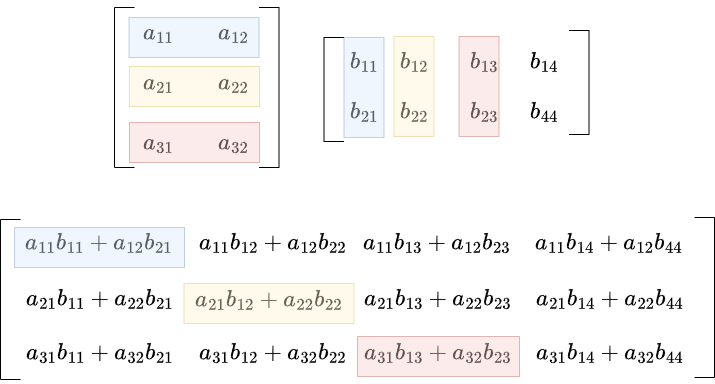

In [ ]:
# Ushbu kod faqat quyidagi rasmni ushbu qo'llanmaga qo'shish uchun ishlatildi
from IPython.display import display, Image
display(Image(filename="matrix mulitplacation.png", height=600, width=600))

Umumiy ko'rinishi quyidagicha. Bizda $A \in R^{m\times n}$ va $B \in R^{n\times k}$ matritsalar berilgan deylik. 

\begin{equation}
C = AB=\begin{pmatrix}
a_{11} & a_{12} & a_{13} & \dots & a_{1n} \\
a_{21} & a_{22} & a_{23} & \dots & a_{2n} \\
a_{31} & a_{32} & a_{33} & \dots & a_{3n} \\
\dots & \dots & \dots & \dots & \dots \\
a_{m1} & a_{m2} & a_{m3} & \dots & a_{mn} \\
\end{pmatrix}
\begin{pmatrix}
b_{11} & b_{12} & b_{13} & \dots & b_{1k} \\
b_{21} & b_{22} & b_{23} & \dots & b_{2k} \\
b_{31} & b_{32} & b_{33} & \dots & b_{3k} \\
\dots & \dots & \dots & \dots & \dots \\
b_{n1} & b_{n2} & b_{n3} & \dots & b_{nk} \\
\end{pmatrix}
\end{equation}

\begin{equation*}
\begin{pmatrix}
a_1b_1 & a_1b_2 & a_1b_3 & \dots & a_1b_k \\
a_2b_1 & a_2b_2 & a_2b_3 & \dots & a_2b_k \\
a_3b_1 & a_3b_2 & a_3b_3 & \dots & a_3b_k \\
\dots & \dots & \dots & \dots & \dots \\
a_mb_1 & a_mb_2 & a_mb_3 & \dots & a_mb_k \\
\end{pmatrix}
\end{equation*}

bu yerda $a_i, i={1, 2, \dots, m}$ vektor $A$ matritsaning ixtiyoriy qatori va $b_j, j={1, 2, \dots, k}$ vektor $B$ matritsaning ustuni, hamda $a_ib_j$ ikki vektorning skalyar ko'paytmasi. Matritsaning qatorlari va ustunlari soni bir nechta bo'ladi va bu sonlarni bildirish uchun biz $i={1, 2, \dots, m}$ belgilashdan foydalanamiz. Buning ma'nosi $i$ ning qiymati 1 dan m gacha bo'ladi, birchi marta 1 ni olsa, keyingisida 2 va shu tartibda oxirida $m$ ni oladi. Bu kabi belgilashlar matematikada murakkab matnlarda ifodalarni o'qish va yozishdan ko'ra juda soddadir.

Biz bu bobda matritsalarni chuqur o'rganmadik chunki ushbu qo'llanmada biz ma'lum bir darajada bizga kerakli bo'lgan qismni o'rganib shu o'rgangan narsalarimizni tadbiq etishni maqsad qilib qo'yganmiz.

# Pythonda matritsalar bilan ishlash

Ushbu bobda biz matritsalar ustida amallarning dastlabki ko'rinishi o'rganish bilan bir qatorda Mashinali o'rganish fanining birinchi eng soda algoritmini boshlang'ich nazariy bilimlarsiz amalga oshiramiz. O'ylaymizki bu yondashuv qadam va qadam sohaga kirib olishimizga yordam beradi.



## Matritsalarni Pythonda saqlash

Garchi biz oldingi boblarda `list` turini o'rganib chiqqan bo'lsakda, lekin ularda biz bir o'lchamli vektorlar saqlashni o'rgandik holos. Endi biz o'sha o'rganishdan hosil bo'lgan bilimlarimizni matrtisalarni saqlash uchun ishlatamiz. Birinchi mavzularda aytib o'tganimizdek Python dasturlash tili yuqori darajali va dinamik turga ega dasturlash tilidir. Bu esa bizga murakkab ko'rinishdagi `list` turidagi o'zgaruvchilarni osongina xotirada saqlash va ular ustida amallar bajarishimizni osonlashtiradi. Ochiqroq qilib aytsak hozir biz `list` turidagi o'zgaruvchi e'lon qilib, uning elementlarini ham `list` turida qilamiz. Agar buni sodda qilib matritsaga qiyoslaydigan bo'lsak, unda matrtisaning ixtiyoriy qatori yoki ustini bu vekotrdir. Demak biz `list` turidagi o'zgaruvchining elementini yana `list` turida bo'ladigan qilib dasturni yozamiz.

Keling buning uchun quyidagi jadvalda keltirilgan inson haqidagi ma'lumotlarni saqlashni amalga oshiraylik.

| Familiyasi      | Ismi | Yoshi     | Bo'yi | Vazni |
| :---        |    :----:   |          ---: | ---: | ---: |
| Samandarov      | Baxtiryor       | 22  | 159 | 63 |
| Axmadov      | Doston       | 19  | 180 | 85 |
| Qarshiyev      | Baxrom       | 20  | 190 | 100 |
| Davronov      | Akmal       | 25  | 175 | 80 |


Aval soddalik uchun yuqoridagi jadvalda berilgan 4 ta insoni alohida `list` turidagi o'zgaruvchilarga saqlab olaylik.

In [ ]:
# 1-inson (human ingliz tilida)
human1 = ['Samandarov', 'Baxtiyor', 22, 159, 63]
# 2-inson
human2 = ['Axmadov', 'Doston', 19, 180, 85]
# 3-inson
human3 = ['Qarshiyev', 'Baxrom', 20, 190, 100]
# 4-inson
human4 = ['Davronov', 'Akmal', 25, 175, 80]

Yuqoridagi kodning davomi sifatida quyida, keling ularni bitta asosiy listga birlashtiraylik. Qisqalik uchun yuqoridagi kodni qayta yozmaymiz.

In [ ]:
# hamma insonlarni saqlovchi
# list turida o'zgaruvchi
# boshida bo'sh
humans = []
# bo'sh listga ketma-ket
# insonlarni qo'shamiz
humans.append(human1)
humans.append(human2)
humans.append(human3)
humans.append(human4)
# va natijani xom ko'rinishda
# chop qilamiz
print(humans)

[['Samandarov', 'Baxtiyor', 22, 159, 63], ['Axmadov', 'Doston', 19, 180, 85], ['Qarshiyev', 'Baxrom', 20, 190, 100], ['Davronov', 'Akmal', 25, 175, 80]]


Yuqoridagi natijaga e'tibor qararsak, unda `list` ichida yana `list` turidagi qiymatlar turganiga guvoh bo'lamiz. Keyingi qatorlarda qanday qilib ushbu ichma-ich joylashgan `list` lardan bizga kerakli qiymatni chiqarib olishni indekslash amali orqali o'rganamiz. Ta'savur qilaylik, ikkinchi insonning yoshini chop qilishmiz kerak. Buning uchun birinchi asosiy `list` dan ikkinchi odamga o'tishimiz kerak, buning uchun `humans[1]` yozamiz. Ushbu kodning qiymatining turi `list` bu esa bizga bu indekslashdan hosil bo'lgan o'zgaruvchiga yana bir bor inkekslash amallini qo'llash imkonini yaratadi.

In [ ]:
# agar shu insoni to'liq chop qilsak
# unda uning turi list
print(humans[1])
# listga ikki marta indeks qo'llasak
print('Ikkinchi insonning yoshi: ', humans[1][2])

['Axmadov', 'Doston', 19, 180, 85]
Ikkinchi insonning yoshi:  19


Ushbu ko'rsatilgan misoldan quyidagi umumiy xulosaning olsak bo'ladi: agar `list`ning elementi ham `list` turida bo'lsa, u holda yana indekslash amalini qo'llash mumkin va ushbu jarayoni istalgancha davom ettirishimiz mumkin, ya'ni `list` turidagi o'zgaruvchida 2, 3, 4, ... indekslash mumkin, agar `list` shunday tarzda ichma-ich joylashgan bo'lsa. Ushbu namunada biz faqat dinamik bo'lmagan dastur holatini ko'rdik, ya'ni foydalanuvchi bizga o'zining ma'lumotlarini kiritmadi, shuning uchun quyidagi kod ushbu dasturning to'liq kodi hisoblanib, unda quyidagi imkoniyatlar mavjud:

1. jadvaldagi ma'lumotlar soni o'zgaruvchan;
2. Undagi har bir qiymatni foydalanuvchi kiritadi;
3. hamda kiritilgan ma'lumotlar kiritilgan tartibda chop e'tiladi. 

In [ ]:
# ma'lumotlar sonini
n = int(input("Nechta ma'lumotlar soni: "))
# bo'sh list
humans = []
# sanash uchun o'zgaruvchi
i = 0
# takrorlash sharti
while i < n:
  # sanagichni oshirish
  i = i + 1
  # i- odam ma'lotlarini kiritish
  print(i, "-odam ma'lumotlarini kiriting: ")
  # familiyasi
  last_name = input('Familiya:')
  # ismi
  first_name = input('Ismi: ')
  # yoshi
  age = int(input('Yoshi: '))
  # bo'yi
  height = int(input("Bo'yi: "))
  # vazni
  weight = int(input("Vazni: "))
  # i-odamni to'liq bitta o'zgaruvchi 
  # sifatida ifodalovchi list
  human = [last_name, first_name, age, height, weight]
  # umumiy listga qo'shish
  humans.append(human)

# chop qilish
i = 0
# sarlavha chop qilish
print("Familiya   |   Ism   |   Yosh   |   Bo'y  |   Vazn")
while i < n:
  print(humans[i][0], "   |   ", humans[i][1], 
  "   |   ", humans[i][2], 
  "   |   ", humans[i][3], 
  "   |   ", humans[i][4])
  i =i + 1

1 -odam ma'lumotlarini kiriting: 
2 -odam ma'lumotlarini kiriting: 
Familiya   |   Ism   |   Yosh   |   Bo'y  |   Vazn
Samandarov    |    Baxtiryor    |    22    |    159    |    63
Axmadov    |    Doston    |    19    |    180    |    85


Yuqoridagi kodni diqqat bilan o'rganib chiqishimiz zarur chunki, unda bir qancha oldingi kodlarga nisbatan mantiqiy o'zgarishlar yuz berdi. Chunki biz dasturlashni ham bosqichma-bosqich o'rganishni maqsad qilib qo'yganmiz va shu maqsadda ba'zi takomillashtirishlarni kiritayabmiz. Biz sanagichning qiymatini `while` takrorlash operatoridan keyin oshirdik. Lekin, buni oldingi holarda va ushbu kodagi ikkinchi `while` da hamma kod bajarilib bo'lgandan so'ng oshirgan edik. Aslida uni `while` takrorlash operatorining qayerida oshirish muhim emas, eng asosiysi bu - takrorlashning mantiqi yuqolmasligi zarur. Keling shu o'zgarish qadam va qadam shuni o'rganib chiqaylik. Birinchi takrorlash operatorida `i` o'zgaruvchisi (sanagich) ikki narsa uchun xizmat qilyabdi: takrorlashlar sonini tekshirib turish va nechanchi odam ma'lumotini kiritayotganimizni foydalanuvchiga bidirish uchun, ya'ni ushbu kod orqali `print(i, "-odam ma'lumotlarini kiriting: ")`. Biz odatda sanashni 1 dan boshlaymiz, noldan emas, shuning uchun ham biz uning qiymatini birinchi oshirib qoydik, oxirida emas. Agar oxirida oshirsak, biz ma'lumotlarni kiritish jarayonida quyidagicha noto'g'iri bo'lgan matni ko'rishimiz mumkin edi: `0-odam ma'lumotlarini kiriting: `. Buni to'g'irlash uchun esa `print(i, "-odam ma'lumotlarini kiriting: ")` kodini `print(i+1, "-odam ma'lumotlarini kiriting: ")` kabi yozish yetarli. O'zgarish faqat `i` ning o'rniga biz `i+1` chop qildik. Masalan, `i` ning qiymati 0 bo'lgan joyda, unga bir qo'shdik bu esa bizga `0-odam ma'lumotlarini kiriting: ` matnini `1-odam ma'lumotlarini kiriting: ` ko'rinishda chop qilish imkonini beradi. Bundan birinchi `while` takrorlashning boshqa joyda hech qanday ta'siri yo'q.

Ikkinchi takrorlashda esa biz `i` o'zgaruvchisini `while` takrorlashni sanash bilan bir vaqtda, qaysi (nechanchi) odamni chop qilayotgan ekanligimizni bildirish uchun ishlatayabmiz. Agar ushbu holda biz `i = i + 1` ifodani `while` dan keyingi qatorga qo'ysak, u holda biz `IndexError` xatoligini qayidagi koddagi kabi ko'ramiz.

In [ ]:
# birinchi qism bor deb tassavur qilaylik
i = 0
print("Familiya   |   Ism   |   Yosh   |   Bo'y  |   Vazn")
while i < n:
  i =i + 1
  print(humans[i][0], "   |   ", humans[i][1], 
  "   |   ", humans[i][2], 
  "   |   ", humans[i][3], 
  "   |   ", humans[i][4])

Familiya   |   Ism   |   Yosh   |   Bo'y  |   Vazn
Axmadov    |    Doston    |    19    |    180    |    85


IndexError: list index out of range

Xo'sh, nega bunday bo'ldi? Chunki Pythonda indekslash 0 dan boshlanadi va `i = i + 1` ifodasi `i` ning qiymati 0 bo'lganda uning (`i` ning) qiymatini birga oshirib qo'yadi. Natijada esa biz indekslashni noldan emas bir dan boshlab qo'yamiz, hamda oxirigi takrorlashda `humans` dan mavjud bo'lmagan indeksni kiritib qo'yamiz. Shu sababdan ham ushbu xatolilar paydo bo'laybdi. Bu kabi xatolilarni ham ushbu qo'llanma davomida ko'rib boramiz. Sal chuquroq tushunish uchun, keling shunday qildik ham deylik, qolgan kodlarga qanday o'zgartirish kiritsak yuqoridagi koda to'g'iri ishlaydi? Buning uchun har safar, `i` ning qiymatini 1 ga kamaytirib ishlatirishimiz kerak, ya'ni `i-1` kabi. Keyingi kod yuqoridagi kodning o'zgartirilgan ko'rinishi. Lekin bu ma'qullangan yondoshuv emas.

In [ ]:
# birinchi qism bor deb tassavur qilaylik
i = 0
print("Familiya   |   Ism   |   Yosh   |   Bo'y  |   Vazn")
while i < n:
  i =i + 1
  print(humans[i-1][0], "   |   ", humans[i-1][1], 
  "   |   ", humans[i-1][2], 
  "   |   ", humans[i-1][3], 
  "   |   ", humans[i-1][4])

Familiya   |   Ism   |   Yosh   |   Bo'y  |   Vazn
Samandarov    |    Baxtiryor    |    22    |    159    |    63
Axmadov    |    Doston    |    19    |    180    |    85


Ushbu ko'rinishda biz turli xildagi bizga berilgan topshiriqlarni bajarishimiz mumkin. Masalan, ismi bo'yicha qidiruv, yoshi bo'yicha saralash va hakozo. Demak asosiy mantiq bu biz masalamizga va yondoshuvimizga qarab turli xil ko'rinishdagi ichma-ich joylashgan ro'yxatlarni hosil qilishimiz va ular ustida kerakli amalarni bajarishimiz mumkin ekan.

## Topshiriqlar

# Mashinali o'rganish
## Kirish

Bizning asosiy maqsadimiz ushbu fanlarni bosqichma-bosqich o'rganish. Shuning uchun ushbu bobda biz Mashinali o'rganish fanini o'rganishni boshlaymiz. Ushbu fan boshlovchilarga og'irlik qimasligi uchun birinchi qisqacha ta'rif berib, undan so'ng amaliy masala yechishni boshlaymiz. Keyinchalik esa ushbu mashinali o'rganish masalarini matematik ko'rnishda tasvirlashni batafsil o'rganamiz. Albatta ushbu amaliy masalada biz oldingi qismlarda o'rgangan bilimlarnimizni ishga solamiz. O'quvchiga oldin aytib o'tilganidek, shu vaqtgacha berilgan masalarni va topshiriqlarni ishlab chiqish qattiq tavsiya etamiz.

Machinali o'rganish - sun'iy intellektning o'rganish sohasi bo'lib, u statistik algoritmlarning umumlashtirish qobilyatini takomillashtiradi hamda vazifalarni odamning oshkor ko'rsatmalarisiz bajaradi. Ushbu ta'rif ko'pchilik o'quvchilarga tushunarsiz bo'lishi turgan gap shuning uchun, bu fanining asosiy metod turlariga qisqacha to'xtalib, keyin masalaga o'tamiz. Ushbu turlarning eng muhimlari: o'qituvchili (supervised) va o'qituvchisiz (unsupervised) o'rganish. Ushbu turlar ham bir qancha yana ichki turlarga ajaratiladi. Bular haqida keyinchalik so'z yuritamiz.

## Amaliy masala

**Masala.** Ta'savur qilaylik bizga rasm berilgan va ushbu rasmda faqat 0 dan 9 bo'lgan raqamlardan faqat bittasi yozilgan. Biz shu rasmda qanday raqam borligini anqilovchi dastur yozishimiz kerak. Albatta, bu dastur Mashinali o'rganish algoritmi asosida bo'ladi. 

**Rasmni xotirada saqlash.** Buning uchun biz, avvalo, bu rasmlar qanday mashina xotirasida saqlanishini tushunishimiz zarur bo'ladi. Soddalik uchun rasm faqat oq va qora rangdan iborat hamda o'chami 28 pikselga 28 piksel bo'lsin deymiz. Rasmlar har doim piksellarda beriladi hamda har bir piksel 0 dan 255 gacha bitta raqam bilan ifodalanadi. Masalan, tim qora rangning qiymati 0 bo'lsa, eng oppoq rang 255 bo'ladi. Shunday qilib biz rasmni juda kichkina katakchalarga ajratib ularga 0 dan 255 gacha bo'lgan raqamlardan rangiga mosini qo'yib qo'yamiz va ularni shu ko'rinishda xotirada saqlaymiz. Ushbu, har xil turdagi ma'lumotlarni son ko'rinishda mashina xotirasida saqlash uchun tasvirlash kodlash yoki (encode) deyiladi.

**Namunaviy rasmlar to'plami.** Mashinali o'rganish fanida bunday rasmlardan tashkil topgan bir qancha tayyor namunalar mavjud bo'lib, ulardan mutaxasislar o'zlarning ilmiy ishlarida foydalanishadi hamda natijalarni shu asosida baholashadi. Ulardan hozirgi bizning sodda masalamizga mosi bu MNIST rasmlar to'plami. Unda jami 70000 dona rasm bo'lib, har bir rams 28 ga 28 pikseldan iborat hamda ular qo'lda yozib chiqilgan. Quyida ulardan ba'zi namunalar.

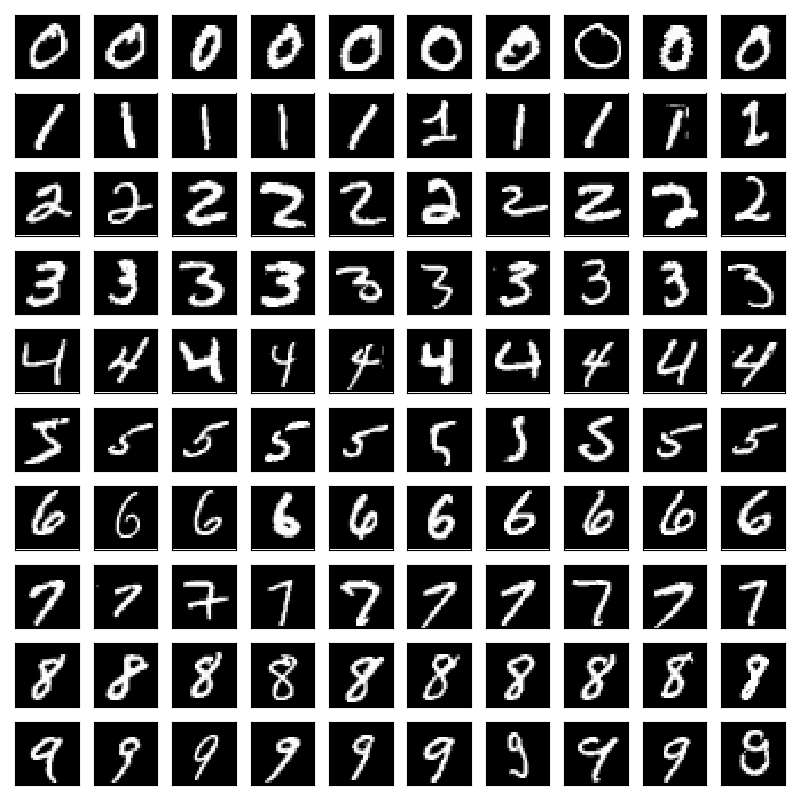

In [ ]:
# Ushbu kod faqat quyidagi rasmni ushbu qo'llanmaga qo'shish uchun ishlatildi
from IPython.display import display, Image
display(Image(filename="MINST_sample.png", height=600, width=600))

Yuqoridagi rasmda to'plamdan har bir raqamning 10 tadan turli xil ko'rinishini chiqardik. E'tibor berib qarasak, ular qo'lda yozilganligi va bir biridan tubdan farq qilishini ko'rishimiz mumkin. Bu kabi namunalar rasmlar bizga algoritmni o'rgatish uchun kerak bo'ladi. Odatda inson ba'zi bir narsadan bitta yoki bir nechta namuna ko'rganda uni esalab qoladi hamda keyinchalik uni boshqa narsalardan osongina farqlay oladi. Lekin mashina uchun o'rgatilgan algoritmlar bu kabi narsa hozircha unchalik qodir emas. Bu haqida ham keyinchalik batafsil mulohaza qilamiz, nega ekanligini.

**Algoritm.** Demak bizga shulardan biror rasm berilsa, biz yozgan kod ushbu ramsda qaysi raqam borligini chiqarishi kerak. Yuqorida aytganimizdek, har bir rasm 28 ga 28 piksel o'lchamda bo'lib, jami 784 ta 0 dan 255 gacha bo'lgan sonlar bilan ifodalangan. Biz yuqorida o'qituvchili mashinali o'rganish turini yozgan edik. Hozir ushbu turdagi algoritm bilan joriy masalani yechamiz.

MNIST rasmlar to'plamida jami 70000 rasm mavjud hamda bu rasmlar ikki qismga bo'lingan: algoritmni o'rgatish uchun 60000 dona rasm va qolgan 10000 donasi esa ushbu algoritmni test qilish uchun. Ushbu 70000 ta rasmning har bir uchun ularda qanday raqam turgani ham bizga ma'lum. Agar sizda unda biz qanday masala yechamiz degan savol tug'ilsa. Biz avval 60000 ta rasm va ularda qanday raqam borligini bilgan holda algoritmni o'rgatib olamiz. Keyin esa test to'plamdagi 10000 ta rasmda qaysi raqam joylashganini algoritm orqali aniqlaymiz. Oxirida esa bizning algoritm aniqlagan natija bilan test to'plamda bo'lgan haqiqiy natijalarni solishtiramiz hamda shu orqali biz algoritmni qanday ishlayotganini baholaymiz.

Albatta ushbu jarayonda algorimtni tushunish bizga qiyinchilik tug'diradi. Shuning uchun keling amaliy tushunishga o'taylik. Tassavur qilaylik bizga test to'plamdan bitta rasm keldi (uning qiymatlari keladi), biz u rasmni bizda oldindan mavjud bo'lgan 60000 ta rasmga solishtirib ko'ramiz va ularning ichidan bu rasmga eng yaqini topamiz. Shundan so'ng, bizga berilgan rasmda joylashgan raqam sifatida topilgan eng yaqin rasmning raqami olamiz. Ya'ni, sodda qilib aytsak, rasmda qanday raqam joylashgani unga eng yaqin bo'lgan rasmda qanday raqam joylashgan bo'lsa, shu bilan bir xil hisoblanadi.

Biz ikki rasm bir-biriga qanday yaqinligini bilish uchun ular o'rtasidagi masofa topamiz. Masofani esa ikki vektor orasidagi masofa sifatida qarashimiz mumkin. Vektorlar orasidagi masofani ifodalashning bir qancha usullari mavjud va ularning o'ziga xos afzaliklar va kamchiliklari bor. Biz soddalik uchun ikki vektor orasidagi masofa sifatida ikki rasmdagi mos piksellarning qiymatlarning ayirmasining absolutni (masalan, ya'ni moduli) olamiz. Lekin bu qiymatlar jami 784 (chunki har bir ramsda shuncha piksell bor). Bular hammasi bir xil ma'noni (piksellar o'rtasidagi mutloq farq) agnlatgani uchun ularning yig'indisini topamiz. Oxir oqibatda ushbu yig'indi bizga ikki rasm orasidagi masofani beradi. Quyidagi kodda dastlab berilgan 60000 ta rasmni yuklash keltirilgan.

In [ ]:
# o'rgatuvchi to'plamni olaylik
# funksiyani import qilish
from datasets import MNIST_train
# ushbu funksiyada ikkita qiymat bor
# 1-rasmlar, 2- ularning mos raqamlari
images, digits = MNIST_train()

Oldingi koda biz birinchi 60000 ta rasmdan iborat bo'lgan to'plamni ikkita o'zgaruvchiga yuklab oldik, bular `images` hamda `digits`. Buni amalga oshirish uchun avval shunga mos funkisya yozdik. Odatda funksiyalarni o'zimiz ham yaratishimiz va ulardan qayta-qayta foydalanishimiz mumkin huddi biz `len` funksiyasi kabi. Ushbu mavzuni keyinchalik o'rganib chiqamiz, chunki bu funksiya avvaldan `datasets.py` fayliga yozib qo'ydik, shu sababdab siz azizlardan faqat tayyor funksiyani o'zimizning kodimizga qanday chaqirish (import qilish) va undan foydalanishni o'rganishni so'raymiz. Tayyor e'lon o'zgaruvchi yoki mavjud funskiyani chaqirish uchun biz avval `from` kalit so'zini yozamiz, keyin ushbu o'zgaruvchilar yoki funksiya qaysi faylida ekanligni bildirish uchun fayl nomni yozamiz va oxirida esa `import` kalit so'zidan keyin, ushbu fayldagi qaysi o'zgaruvchilar yoki funksiyalar kerak bo'lsa, ularning nomalarini birma-bir vergula orqali joriy kod qismiga yozib chiqamiz. Yuqorida esa, `from datasets import MNIST_train`, bu yerda `datasets` fayl nomni (to'liq nomi `datasets.py`, `py` bu kengaytma shuning uchun uni tashlab ketamiz), keyingisi esa `MNIST_train` bu funksiya nomi. Bu funksiya hozircha hech qanday parameterga ega emas va u 2 ta qiymat qaytaradi. Ushbu qiymatlarni ikkita alohida o'zgaruvchiga yuklash uchun biz vergul bila shu o'zgaruvchilar nomidan keyin tenglik belgisini qo'yib `MNIST_train()` funksiyasini chaqirdik, ya'ni `images, digits = MNIST_train()`. Keling ushbu rasmlarning birinchisining 200 pikseldan to 228 gacha qiymatlarini va unda qanday raqam turgani ko'raylik.

In [ ]:
# yuqoridagi kod yozilgan deymiz
i = 0
print('Uning raqami: ', digits[0])
print('200 dan 228 qiymatlari: ')
while i < 28:
  # 1-rasm uchun bitta indeks, ya'ni 0
  # keyingi indeks esa uning qiymati uchun
  # bitta qatorda chop qilish uchun: end=' '
  print(images[0][i+200], end=' ')
  i = i + 1

Uning raqami:  5
200 dan 228 qiymatlari: 
0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 0 0 0 0 

Biz yuqoridagi funksiya oraqli olinga rasmlar quyidagicha o'lchamda birinchi asosiy ro'yxatda jami 60000 ta rasm bor va har bir rasm 784 ta raqam bilan ichki ro'yxat ko'rinishida ifodalangan. Ya'ni bu vektor ko'rnishga o'tkazilgan rasmda keltirilgandek 28 ga 28 o'lchamli ro'yxat ichida yana ro'yxat emas. Buni amalga oshirish juda sodda keyinchalik bu haqida o'rni kelganda batafsil ma'lumot beramiz. Bundan keyingi kode esa 1-rasm va 10-rasm orasidagi farqni topib berishga misoldir. 

In [ ]:
# rasmlarni alohida o'zgaruvchilarga
# yuklaymiz qulaylik uchun
image_1 = images[0]
image_2 = images[10]
# yig'indi bo'lgani uchun
# boshlang'ich qiymat 0 ga teng
s = 0
# sanash uchun
i = 0
while i < 784:
  # ikki rasm o'rtasidagi farq
  diff = image_1[i] - image_2[i]
  # masofa manifiy bo'lmasligi
  # uchun uni musbatga aylantiramiz
  abs_dist = abs(diff)
  # jami yig'indiga qo'shamiz
  s = s + abs_dist
  # sanashni oshirish
  i = i + 1

print('1- va 10-ramslar orasidagi masofa: ', s)

1- va 10-ramslar orasidagi masofa:  24255


Yuqoridagi kodda quyidagilarni ketma-ket bajardik:

1. ikkita ramsni qulaylik uchun alohida o'zgaruvchilarga yuklab oldik, bular `image_1` va `image_2`
2. har bir mos piksellar o'rtasidagi masofani yig'ib borish uchun, `s = 0` oldik
3. `while` takrorlash operatori orqali vektorlarning piksellarni orasidagi masofalarni har bir elementi bo'yicha birma-bir hisoblab chiqamiz.
4. ikki piksel orasidagi farqni oldik, `diff = image_1[i] - image_2[i]`
5. masofa musbat bo'lishi kerak, shuning uchun farqning modulini olamiz, `abs_dist = abs(diff)`. `abs()` funksiyasi bizga ixtiyoriy haqiqiy soning musbat qiymatini hisoblab beradi. Masalan, unga 5 qiymat bersak bizga 5 qaytaradi, agar -5 qiymat bersak unda ham uning musbat qiymati bo'lgan 5 qaytaradi.
6. Oxirida esa masofalarni yig'dik va sanagichni bittaga oshirdik.

Keyingi bosqichlarda oson bo'lishi uchun yuqoridagi kodni funksiya sifatida `distances.py` fayliga yozib qoydik. U ikkita vektor qabul qiladi hamda ular orasidagi yuqorida ko'rsatilgan masofaning qiymatni hisoblaydi va qaytaradi. Uni quyidagicha chaqirib ishlatishimiz mumkin.

In [ ]:
from distances import distance
image_1 = images[0]
image_2 = images[10]
s = distance(image_1, image_2)
print('1- va 10-ramslar orasidagi masofa: ', s)

1- va 10-ramslar orasidagi masofa:  24255


Bizda ikki rasm orasida masofa mavjud bo'lsa, u holda rasmni mavjud rasmlar bilan solishtirish orqali qaysi rasmga eng yaqin ekanligini aniqlashimiz mumkin bo'ladi. Buning uchun qidirish kichik soni algoritmidan foydalanamiz:

1. `while` orqali takrorlash hosil qilamiz
2. 60000 ta rasmdan iborat to'plamdan ramslarni bittalab olib
3. bizga berilgan rasm bilan o'rtasidagi masofani topamiz
4. agar masofa oldingi masofadan kichik bo'lsa, u holda shu rasmning nechanchi o'rinda turganligini eslab qolamiz
5. takrorlashdan so'ng eng yaqin rasmning indeksi orqali uning raqamini aniqlaymiz hamda uni bizga berilgan rasmning raqmi deb javob qaytaramiz.

Quyidagi kod ushbu jarayoni amalga oshiradi. Buning uchun avval biz 1000 ta rasmdan iborat bo'lgan test to'plamni xotiraga yuklab olishimiz kerak bo'ladi. Buning uchun ham bizda tayyor funksiya bor, u `MNIST_test` xudi oldinigisi kabi ishlatiladi. Faqat o'zgaruvchilarning nomiga `test` qo'shimchalarini qo'shamiz oldingi o'zgaruvchilardan farqlash uchun.

In [ ]:
# to'plamlarni yuklash
from datasets import MNIST_train, MNIST_test
images, digits = MNIST_train()
test_images, test_digits = MNIST_test()
# ixtiyoriy rasm test to'plamdan
k = 0
img = test_images[k]
# eng yaqin masofa
# boshida u juda katta son
min_dist = 1000000000000
# eng yaqin ramsning indeks
# noma'lum
min_ind = -1
# sanagich
i = 0
# bizda 60000 ta rasm bor
# solishtirish uchun
while i < 60000:
  # joriy rasm
  curr_img = images[i]
  # joriy rams bilan test rasm ortasidagi
  # masofa
  dist = distance(curr_img, img)
  # joriy rasm oldingisidan yaqinroqmi
  if min_dist > dist:
    # shunday bo'lsa
    # yaqin masofa yangisiga o'tadi
    min_dist = dist
    # indeks ham o'zgaradi
    min_ind = i
  # sanagichni oshirish
  i = i + 1

# natijalarni chop etish
print("Haqiyqiy javob: ", test_digits[k])
# min_ind - eng yaqin rasm indeksi
print("Algoritm topgan javob: ", digits[min_ind])

Haqiyqiy javob:  7
Algoritm topgan javob:  7


Yuqorida biz algoritmni test to'plamdagi 1-rams uchun ishlatib ko'rdik, natijalar to'g'iri chiqidi. Quyidagi jadvalda bir nechata ishlatishlari natijasi keltirilgan.

| Test to'plamdagi rasm indeksi | Haqiqiy javob (qaysi raqamligi)| Algoritmning javobi(qaysi raqamligi) |
| --- | --- | --- |
|0|7|7|
|10|0|0|
|355|8|8|

Yuqorida biz sinov qilgan hamma indekslarda natijalar bir xil chiqayabdi, lekin aslida unday emas, chunki har doim algorimtda xatolik bo'ladi. Bu haqida keyinchalik batafsil mulohasa yuritamiz. Hozirgi algorimning o'rtacha bahosi esa 98\%, ya'ni birinchi 100 ta rasmdan 98 tasini to'g'iri topa oladi. Bu juda yuqori natija chunki masalamiz juda sodda. Yuroqidagi kodning hamma test rasmlarni tekshirish uchun takomillashtirib, uni `experiments.py` faylida `nearest_neighboor_mnist()` funksiyasi sifatida hosil qildik. Lekin biz uni hamma rasmlar bilan ishlatsak taxminan 33 soatdan ko'p vaqt ketib qoladi. Ushbu algorimtning kamchilik va yutuqlarini batafsil mulohaza qilamiz.

In [ ]:
from experiments import nearest_neighboor_mnist
accuracy = nearest_neighboor_mnist(100)
print('Ushbu metodning aniqligi: ', accuracy * 100, '%')

Ushbu metodning aniqligi:  98.0 %


Siz aziz o'quvchilar bilan hozirgi kunda keng qo'llanilaytogan masalalardan biri bo'lgan, berilgan rasmda qanday raqam yozilganini aniqlash dasturini tuzib o'rgandik. Ushbu algoritm faqat amaliy dastur orqali tushuntirildi hamda natijalar olindi. Keyingi qismlarda biz ushbu algoritmning mohiyatini kengroq o'rganishga kirishamiz.

## Eng yaqin qo'shni algoritmi

Eng sodda va tushunarli bo'lgan algoritmlardan biri bu 'Eng yaqin qo'shni' algoritmidir. Biz bundan oldingi boblarda MNIST raqmlari yozilgan to'plam bilan ishlab rasmlardagi raqamlarni aniqlovchi dastur tuzdik va undan natijalar oldik. Ushbu dasturda foydalangan algoritmimiz bu 'Eng yaqin qo'shni' algoritmidir. Ushbu qismda biz shu algoritmni chuqoroq tahlil qilib, matematik usulda ifodalashga harakat qilamiz. 

Buning uchun keling birinchi navbatda uning geometrik ma'nozini tushinishga harakat qilib ko'raylik. Yuqoridagi dasturda biz har bir rasmni 28 ga 28 piksellarda ifodaladik, bu esa 784 o'lchamli vektor degani va bu o'lchamni biz geometrik tarzda tasvirlay olmaymiz. Shuning uchun yuqoridagi masalani boshqa juda sodda masalaga almashtiramiz. Tasavur qilaylik, it va bo'rilar faqat bo'yi va uzunligi (boshidan dumigacha bo'lgan uzunlik) bilan vektor ko'rinishida berildi. Masalan, quyidagi 2 o'lchovli koordinatalar sistemasida ulardan bir nechtasi berilgan.

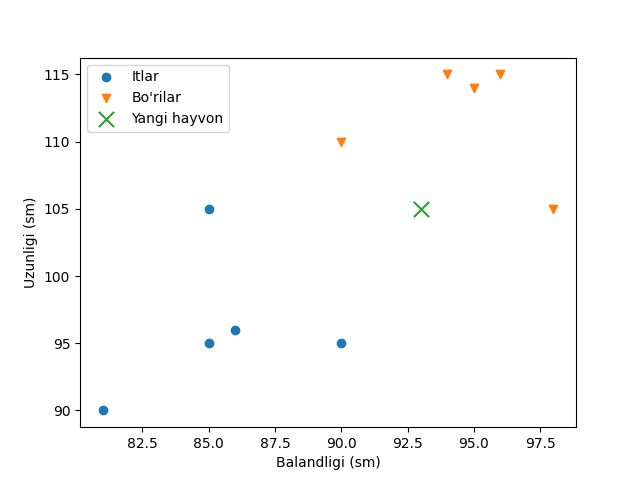

In [ ]:
from IPython.display import display, Image
display(Image(filename="dog_wolf_sample_2D.png", height=600, width=600))

Ushbu rasmda uch xil turdagi shakllar joylashgan: aylana itlarni ifodalaydi, uchburchak bo'rilarni va oxirgi 'X' belgisi esa yangi bizga berilgan hayvoni ifodalaydi. Bu shu yangi hayvon itmi yoki bo'rimi shuni aytishimiz kerak. Buni esa shu rasmga qarab bu hayvon itlarga yaqin bo'lsa, uni it deymiz, aks holda uni bo'ri deymiz. Hozirgi holda bu albatta bo'ri. Buning uchun biz ushbu yangi hayvonga eng yaqin bo'lgan hayvonni topshimiz kerak bu hayvon bo'ri bo'lgani uchun ham biz yangi hayvoni bo'ri turiga masub deymiz. Ushbu sodda masalani geometrik usulda tushunish qiyin emas. Lekin birinchi rasmlardagi raqam masalasini esa bu kabi chimza yordamida tasvirlab bo'lmaydi. Uning o'rniga biz u shunchaki tasavur qilib ishlaymiz.

Oldingi misolni yechishda biz hozirgidek sodda chizmadan emas balki ularning orasidagi masofani topish uchun maxsus masofa $\rho (x,y)$ funksiyasidan foydalandik. Hamda ixtiyoriy rasm berilsa unni bizda oldindan mavjud bo'lgan rasmlar bilan solishtirib unga eng yaqinini topdik va shu orqali yangi kelgan rasmda qanday raqam bor ekanligini aniqladik.

## Atamalar

Keling endi, birinchi, ba'zi bir atamalarni kiritsakda va shu atamalarga izchil rioya qilib kitobni davom ettirsak. Birinchi atamamiz, bu obyekt ba'zida esa namuna ham deymiz. Yuqoridagi misollarda bular: hayvonlar va rasmlar obyekt yoki naumuna deyiladi. Ular o'rtasidagi juda nozik farq bu naumunalar deb biz yechimi bo'lgan obyektlarga aytishimiz mumkin, obyektlarni esa hammasiga qo'llash mumkin. Ikkinchisi esa, o'rgatuvchi va test to'plamlar. Algoritmni o'rgatish uchun ishlatiladigan namunalar bu o'rgatuvchi to'plam deyiladi, uning qanday ishlayotgani tekshirish uchun esa biz test obyektlardan foydalanamiz, buni esa test to'plam deymiz. Keyinchalik boshqa turdagi to'plamlarni ham qo'shamiz.

Keyingisi esa biz qanday masalani yechayotganimizga oid bo'lib, yuqoridagai ikki misolda ham biz yangi obyektni qaysidir jamoaga tegishli ekanligini aniqlashmiz zarur bo'ldi, masalan rasmda qanday raqam joylashgan yoki yangi hayvon qaysi hayvonligi. Obyektni qaysi turga kirishini umumiy holda obyektning 'Sinfi' deymiz. Masalan, itlar sinfi yoki bo'rilar sinfi va hakozo.

Oxirgisi esa alomat bo'lib, har bir obyekt ifodaluvchi qiymatlar uning alomatlari deyiladi. Biz ingliz tilidagi 'feature' so'zini shu tarizda tarjima qildik. Yuqoridagi misollarda: rasmlar uchun uning piksellari alomatlari deymiz, 'It va bo'ri' misolida esa ularning bo'yi va uzunligini alomatlar deb ataymiz. Ba'zida sohani yaxshi tushunmaganlar bu tushunchani simptomlar(symptoms) bilan adashtirishadi, aslida bu so'z faqat fizik va ruhiy alomatlarni ifodalash uchun ishlatiladi va odata kasalikning qanday sharoitda ekanligni anglatadi. Biz mashinali o'rganishda umumiyroq holni qaraymiz. Ushbu alomatlar qo'yilgan masalaga ko'ra ikki qismga bo'linadi. Obyektni tasvirlovchi alomatlar va maqsadli (target) alomat(lar). Yuqorida 'It va bo'ri' masalasida ularning bo'yi va uzunligi tasvirlovchi alomatlar bo'lsa, ularning qaysi sinfga tegishli bo'lishi maqsadli alomat hisoblanadi. Chunki obyektlarning tasvirlanishi orqali ularning qaysi sinfga tegishli bo'lishini aniqlashimiz asosiy maqsadimizdir.

## O'rgatuvchili o'rganish

Ushbu ingiliz tilidagi 'Supervised Learning' atamasini biz o'rgatuvchili o'rganish deb tarjima qildik hamda ushbu qo'llanma davomida shunday deb murojaat qilamiz. Biz birinchi sodda masala kordik va uni yaxshiroq tushinish uchun esa yanada sodda misolni geometrik usulda bayon qildik. Endi bu qismda ushbu o'rgangan 'Eng yaqin qo'shni' algoritmi asosida Mashinali o'rganish fanining ba'zi nazariy qoidalari va ta'riflarini o'tganamiz.

Keling birinchi 'O'rgatuvchi (supervised)' so'zini yuqoridagi masalada aniqlashtirib olsak. Ramalarni o'zida jamlagan MNIST rasmlar to'plami, oldin ham aytganimizdek, ikki qismdan iborat: birinchisi algoritmni o'rgatish va ikkinchisi esa uni test qilish. Birinchi qismdagi to'plamdagi hamma ramsda qanday raqamlar turganini bizga ayon. Xudi shunday, yuqoridagi "It va bo'ri"ga oid to'plamda ham 10 ta (5 ta it va 5 ta bo'ri) hayvoning qiymati oldindan bor va ularning qanday hayvon ekanligini ham bilamiz. Mana shu MNISTning birinchi to'plami va yuqoridagi ramsdagi 10 ta hayvon bizning algoritm uchun "O'rgatuvchi". Shuning uchun ham bu turdagi masalalarni "O'rgatuvchili o'rganish" deb nomlaymiz. Demak soddaroq qilib aytsak algortimni o'rgatish uchun oldindan yechimi bo'lgan namunalar berilar ekan biz shularga qarab yangi muammoni yechimini topishimiz "O'rgatuvchili o'rganish" bo'lar ekan. 

### O'rgatuvchili o'rganishning turlari

Ushbu turdagi o'rganishning o'zini ham maqsadli alomatning turlariga qarab bir qancha turlarga ajratib o'rganamiz:

1. Regressiya - ushbu turda maqsadli alomat ma'lum bir son bo'lib uni topish talab etiladi. Masalan, ertangi haroratni topish yoki uyning narxini baholashlar regressiya masalalaridir.
2. Klassifikatiya (Sinflash) - bunda maqsadli alomat toifali bo'ladi, son bo'lmaydi. Bu toifalilar odatda mantlar bilan ifodalanadi. Masalan, yuqoridagi misolda yangi obyektning qaysi sinfga tegishli bo'lishi bu klassifikatsiya masalasidir.

### Matematik ifodalanishi

Biz kelajakda o'qigan narsalarnimizni tushunish uchun har doim matematik ifodalashga zarurat bo'ladi. Chunki bu soha vaklillari har doim ilmiy maqola o'qishiga to'g'iri kelishi mumkin, bunda esa masalarni qanday ifodalashni bilish juda muhim hisoblanadi. Shuning uchun har bir turdagi masaladan so'ng biz ushbu masalaning matematik ko'rinishini yozib ketamiz va bir necha boblardan so'ng biz deyarli hamma algoritmlarni matematik ko'rinishda ifodalaymiz.

**Klassifikatsiya masalasi**. Aytaylik bizga yuqoridagi masalardagi obyektlarni ifodalovchi $X=\{x^1, x^2, \dots, x^m\}$ to'plam berilgan. Bu yerdagi har bir $x^i \in R^n, i\in \{1, 2, \dots, m\}$ to'plamdagi bitta obyektni tafsiflaydi. Namuna uchun, 'it va bo'ri' misolida $x^1=(yosh, bo'y)$, aniq qiymat bo'lsa, u holda $x^1=(85, 95)$ birinchi obyektnining qiymatini saqlaydi. $X$ to'plam o'zida vektorlarni saqlagani uchun u umumiy holda $X \in R^{m\times n}$ bo'ladi, ya'ni o'lchami $m \times n$ bo'lgan matritsa. Hamda har bir obyektning maqsadli alomatini ifodalash uchun $y=\{y^1, y^2, \dots, y^m\}$, har bir sinfning qiymati 1 dan to sinflarning sonigacha $c$ o'zgaradi, ya'ni $y^i \in \{1, 2, \dots, c\}$. Biz qisqalik uchun har doim sinfning nomlarini matn ko'rinishda tasvirlamasdan, uning o'rnida, ularni ixtiyoriy tartibda tartiblab, ularga tartibi bo'yicha raqamlar beramiz. Bu keyichalik dasturlash va eng asosiysi mashinali o'rganishda zarur bo'ladi. Masalan, yuqoridagi 'it va bo'rida' 'it' lars sinfini 1 desak 'bo'r' larni 2 deymiz.

**Masalaning qo'yilishi** Ushbu masalada bizning asosiy maqsadimiz yuqoridagi ikki o'zgaruvchi, $X$ va $y$, bizga oldindan o'rgatuvchi to'plam sifatida berilsa, u holda yangi obyekt $x^*$ uchun maqsadli alomatning ($y$) qiymatini topishimiz kerak bo'ladi. Buni sodda matematik ko'rinishda quyidagicha yozamiz, $y=f(x)$. Biz shunday funksiya (ba'zida, algoritm, usul yoki operator) topishimiz kerak bo'ladi, unga $x^*$ qiymat sifatida bersak, u $f(x^*)$ bizga $y$ ning qiymatini qaytarishi kerak. 

Sodda misol sifatida valyuta ayriboshlash funksiyasini qarab chiqaylik. Agar bizga joriy AQSH dollorining O'zbekiston so'miga nisbati berilgan bo'lsa, u holda $g$ funksiyaga biz AQSH dollorda qiymat ko'rsatsak, u bizga shu qiymatning O'zbekiston so'mida qancha bo'lishini qaytarishi kerak. Xudi shunday, yuqoridagi funksiya (ba'zida, algoritm, usul yoki operator) qo'yilgan masalaga berilgan $X$ va $y$ asosida mos javob qaytarishi kerak.

Endi yuqoridagi biz ko'rib chiqqan ikki masalanining matematik ifodalanishi qisqacha yozib qo'sak. Birinchi masalada, biz rasmlar bilan ishladik. Aslida rasmlar $28\times 28$ ko'rinishidagi jadval (matritsa) edi. Lekin biz uni $784$ o'lchamli vektor ko'rinishiga o'tkazib oldik. Shunda, obyektlarni o'zida saqlovchi o'rgatuvchi to'plam $X \in R^{60000\times 784}$ va maqsadli alomat $y=\{y^1, y^2, \dots, y^{60000}\}$ bo'ladi. Bu yerda har bir $y^i \in \{1, 2, 3, \dots, 10\}$, chunki $c=10$. Ikkinchi namunamiz ham birinchisiga o'xshaydi, faqat ancha soddaroq, o'rgatuvchi to'plam $X \in R^{10 \times 2}$ va maqsadli alomat $y=\{y^1, y^2, \dots, y^{10}\}, y \in \{1, 2\}$

**Regressiya masalasi**. Ushbu tur masalalar boshqalaridan ko'ra ko'proq uchraydi, chunki ko'pchilik masalalar ushbu turga keltirib yechiladi. Ushbu turning oldingisidan asosiy farqi bu $y$ qiymati sinflar qiymatini saqlamasan, o'rniga haqiqiy sonlarni saqlaydi, ya'ni $y=\{y^1, y^2, \dots, y^m\} $, bu yerda har bir $y^i \in R$.

## Xulosa

Ushbu bobda mashinali o'rganishga oid bir qator muhim mavzularni o'rganib chiqdik. Shulardan eng muhimi o'zimiz uchun sodda klassifikatsiya algoritmi bo'lgan *Eng yaqin qo'shni algoritm* ni o'rganib chiqdik. Ushbu metod sodda bo'lishi qaramsdan ko'pchilik amaliy masalalarni yechishda hozirda ham keng qo'llaniladi. Guvohi bo'lganimizdek, bizning algoritm 98\% aniqlik bilan ishladi hamda bu ko'rsatgich juda aniq hisoblanadi. Bundan tashqari kelajakda o'rganmoqchi bo'lgan mashinali o'rganish algoritmlari uchun zarur bo'lgan eng zarur mavzularni ham ko'rib chiqdik. Bundan keyingi bobni biz statistik tahlil uchun bag'ishlasakda hamda uning ichida ba'zi algoritmlarni o'rgansak. Chunki, yuqorida ta'kidlaganimizdedk, mashinali o'rganish fani statistik tahlilning bir qismi bo'lib rivojlanib kelgan.

# Statistika asoslar va ehtimollik

Ushbu ikki fanni o'rganishning o'zi insondan uzoq yillik qattiq mehnat talab etadi. Lekin ushbu qo'llanmada biz bu ikki fanni sodda ikki bo'lim sifatida berib ketmoqchimiz, chunki bizning maqsadimiz sun'iy intellektni o'rganish. Qo'llanmaning ushbu qismini Martin Buntinas va Gerald M. Funklar tomonidan yozilgan *Statistics for the Sciences (Fanlar uchun statistika)* kitobidan va boshqa bir qancha manbalardan foydalanamiz. Hamda ushbu bo'limda biz mashinali o'rganish fanida ba'zi kiritilmay qolib ketgan atamalarni kiritamiz va ularni kamchiliklarini to'ldiramiz.

## Statistika

### Statistika nima

Ko'pchilik statistikani odatda ma'lum bir ma'umotlarni har xil jadvallarga yoki diagrammalarga chiqarib tasvirlashni tushunishadi. Yok bo'lmasam *oddiygini bu yil nechta chaqaloq tug'ilibdi?* deyishadi va uning javobini olgandan so'ng shu bu yilgi statsitika deyiladi. Aslida esa bu statsitikaning bir kichginagina yo'nalishi bo'lib, tavsiflovchi statistika deyiladi. Balki bu soha undan ancha keng bo'lib, asosan muhitdagi haqiqiy holatni aniqlik bilan bilishning iloji bo'lmaganda yoki bo'lsa ham juda ko'p harakatlar talab qilinganda, bu fan qanday qilib shu narsalarni ma'lum bir noaniqlik bo'lsa ham aytish mumkinligini o'rganadi. Masalan, ma'lum bir davlatda hamma aholisdan so'rovnoma olish kerak bo'lsa, unda buning uchun juda katta harajat va mehnat talab qilinadi. Uning o'rniga shu aholining ma'lum bir qismidan shu so'rovnomani olib, xulosa chiqarilsa va xulosadagi xatolikni kamligiga ishonch hosil qilinsa, unda shuncha qiyinchilik yuzaga kelmadi.

Biz ko'pchilik mahsulotlarni qopida, masalan unning qopida, $50\pm 3\%$ yoki shunga o'xshash sonlar bo'ladi. Bu kabi narsalar ko'pchiligimizga notanish yoki qanday ma'no anglatishiga qiziqmaymiz. Ushbu qoplash jarayonini hech qachon aniq 50 kglik qilishning iloji yo'q yoki hamma qopni tekshirib bo'lmaydi, chunki ishlab chiqarilgan mahsulot sotilib ketaveradi. Keling birinchi bitta namunani yaxshilab o'rganib chiqaylikda keyin, shu asosida ba'zi birlamchi atamalarni kiritaylik. 

**Namumna 1**. Louis Harris va sheriklari har xil mavzular yuzasidan so'rovnomalar o'tkazishadi. Ushbu so'rnomalar ba'zida yuzma-yuz, ba'zida esa telefon yoki boshqa vaqtlarda Internet orqali olib boriladi. 1991-yilda, shunday so'rovlardan biri Amerikalik balog'atga yetgan kishilar o'rtasida olib borildi. Ushbu so'rov davomida jami bo'lib 1256 kishi tasodifiy tanlab olinib, ularga quyidagi savollar (parhez, siqlishni boshqarish, o'rindiq kamaridan foydalanish, va shu kabilar) berilib, ularning javoblari yig'ildi. Shu savollardan biri, biz muloha qilmoqchi bo'lganimiz, 'Siz semirib ketmaslik uchun o'zingizning parhezingizda qattiq amal qilasizmi?' Natijada, Harris qatnashuvchilarning 57\% savolga 'Ha' deb javob berganlarligini aytdi. Hamda bu natijalarning xatosining kattaligi musbat yoki manifiy 3\% edi.

Ushbu so'rovdagi qiymatlar to'liq bo'lmagan ma'lumotlardan olindi, ya'ni Amerkada taxminan 200 million yoshi kattalar mavjud bo'lib, so'rovda ulardan bor yo'gi 1256 kishi qatnashdi. Ushbu so'rovda qatnashishi kerak bo'lgan 200 million kishilar to'plamini biz *populatsiya* deb ataymiz. Agar ushbu savollarni hamma insonlarga berib, ularning javobini to'liq olganimzida bu narsa *sensus* bo'lar edi, ya'ni *sensus* murojaat qilamiz. 200 million aholi bo'lishiga qaramasdan, Harris so'rovnomada ulardan 1256 tasining javobini oldi. Bu narsani, ya'ni to'liq bo'lmagan so'rovni, biz namuma deb aytamiz.

Ko'rib turganimizdek ushbu so'rovni populyatsiyada o'kzasak, unda davlat uchun yoki so'rovni o'tkazayotganlar uchun juda katta harajat bo'ladi. Shuning uchun bunday populyatsiydan so'rov olish deyarli ko'p hollarda amaliy bo'lmaydi. Ushbu muammodan chiqib ketish uchun esa 'sinchikovlik bilan olib borilgan sensus yetarli deb aytadi' Samuel Johnson. Bunga misol sifatida esa, agar ovqatning ta'mini bilmoqchi bo'lsagniz shu ovqatni to'liq yeb tugatishingiz shart emas, ozroq qismi bilan bilish mumkin deb o'zing gapini quvatlaydi.

Ushbu so'rovnoma ishtirok etgan odamlarni biz *birlik* deb ataymiz. Ushbu birliklarning, yuqoridagi misolda esa odamlarning, turli xil o'ziga xos fazilatlarni yoki ularning yuqoridagi savollarga javob bergan natijalarini *o'zgaruvchi* deb nomlaymiz. Yuqoridagi so'rovda esa bunga misol sifatida odamning yoshi, og'irligi, parhez haqidagi savolga bergan javoblarning barchasini biz o'zgaruvchi deb ataymiz. E'tibor bering statistikada *o'zgaruvchi* va dasturlashdagi *o'zgaruvchi* atamalarni deyarli bir xil narsani anglatayabdi, ya'ni ma'lum bir qiymatnining unga bog'lik jarayon asosida o'zgarishi. Ushbu o'zgaruvchilarni ikki qimsga ajratamiz: *toifali* va *miqdoriy* o'zgaruvchilar. Toifali o'zgaruvchiga so'ruvdagi savollarga 'Ha' yoki 'Yo'q' deb javob berish, insoning jinsi, ranglar va shu kabilar kiradi. Miqdoriyga esa son bilan ifodalnuvchi qiymatlar, masalan, yosh, vaznlar kiradi. Yuqoridagi klassifikatsiya misolida ham bizdagi raqamlarning qiymatlari toifali edi, ya'ni ular son emas edi yoki 'It' yoki 'bo'ri' ham shular jumlasidan.

Namuna natijasida yoki namunandan hosil bo'lgan son *statisitka* deyiladi. Agar shu son butun boshli populyatsiyadan hosil qilinsa unda esa *parametr* deyiladi. Ushu parametrlarni belgilash uchun odatda biz grek harflaridan foydalanamiz, masalan $\pi$ n yuqoridagi toifali o'zgaruvchining populyatsiya ulushini belgilash uchun yoki $\mu$ ni esa miqdoriy o'zgaruvchining o'rtacha qiymatini belgilash uchun ishlatamiz. Agar yuqoridagi Amerkalik yoshi kattalar o'rtasidagi o'tkazilgan so'rovni barcha uchun o'tkazish mumkin emas, shuning uchun ham $\pi$ qiymatni qiymati ma'lum emas. 

Namunadan olingan dalilar (qiymatlar) asosida biz populyatsiya haqida xulosa qilishimiz mumkin. Shuning uchun ham $p$ statistika $\pi$ parameter bilan bir xil bo'lmaydi, ya'ni ko'pchilik hollarda $\pi$ parametr noma'lum bo'ladi. Chunki shu so'rovni qayta bir sharoitda bir necha bor takrorlasak ham $p$ statistika har doim har xil chiqadi, lekin $\pi$ parametr o'zgarishsiz qoladi.  Harrisning misolidagi ushbu o'zgarishlar xatolining chegarasi deb yuritiladi. Biz odatda populatsiyaning paramterlarni hisoblashga imkonimiz bo'lmaydi, shuning uchun deyarli hamma joyda numunalar haqida so'z yuritamiz. Zarur joylarda esa populyatsini so'zini oshkor ravishda qo'shamiz.

> Eslatma. Biz yuqorida, birinchi mashinali o'rganishda odamni ifodalovchi qiymatlarni alomatlar deb nomladik, lekin hozir shu narsalarni biz o'zgaruvchi deb statistika fanida o'rgandik. Ushbu ikki turli nomlanish ko'pincha o'zaro almashtirilib ishlatiladi. Shuning uchun ushbu qo'llanma davomida biz ikkisini ham ishlatishga harakat qilamiz. Dasturlashda ko'pincha o'zgaruvchi, qolgan qismlarda esa alomat deb yuritamiz.

Biz yuqoridagi so'rovda 1256 ta odam qatnashganining guhovi bo'ldik, bu esa to'liq odamlar emas. Ushbu qatnashish natijasida hosil bo'lgan qiymatlarni, masalan, jadvalni *kuzatuvlar* deb ataymiz, chunki bu kuzatish doimiy o'zgarib turishi mumkin. Masalan, biz odamdan so'rov olinganda bir nectha qiymatlar olinadi, shuning uchun uni *kuzatuvlar* deymiz, shunchaki *kuzatuv* deyishning o'rniga. Shunda kuzatuvlardan hosil bo'lgan to'plamga biz *berilganlar* deb ataymiz.

> E'slatma. Hozirgi kunda kompyuter fanlarida ingliz tilidagi 'Data' so'zi tarjimasi ko'p joylarda *ma'lumotlar* deb tarjima qilandi. Lekin ushbu so'zning o'zbek tilida aniq tarjimasi yo'q va shu bilan birgalikda rus tilida ham. Agar ushbu so'zni *ma'lumotlar* deb tarjima qilsak, bu so'zning ma'nosi bir qancha narsalarga nisbatan ishlatilishi mumkin bo'lib, *Data* ta'rifiga ba'zi qarama-qarshililarni keltirib chiqaradi. Chunki bu so'zning ta'rifida 'Zamonaviy kompyuter tizimlarida hamma *data* bu raqamli' degan tushuncha bor. Lekin 'ma'lumotlar' o'zing ichiga raqamlini ham raqamsizni ham qamrab oladi, hattoki anolig bo'lgan gaplarni ham biz ma'lumot deyishimiz mumkin. Agar shuni 'berilganlar' desak, xuddi rus tilidagiga o'xshab, unda, bizning fikrimizcha, kompyuterda albatta qiymatlar 0 yoki 1 ko'rnishda beriladi, boshqacha bo'lishi mumkin emas. Agar boshqa sohada, masalan, 'berilganlar' deyilsa shu sohaga oid narsani tushunishimiz mumkin. Sodda matematik masalada: 'To'g'iri to'rt burchakning bo'yi va eni berilgan uning yuzini toping.' Ushbu matnda hamma narsa tushunarli, ya'ni bizga qiymatlar son ko'rinishda yoki ikkita belgi ko'rinishida beriladi, boshqa narsa emas. Endi shu misolni ma'lumotlar deb yozib ko'rsak, unda juda boshqacha ko'rinishga ega bo'ladi. Albatta to'g'iri to'rt burchakning bo'yi va eni ham biz uchun ma'lumot, u narsa aniq daladagi belgilan maydon ham bo'lishi mumkin emasmi? Yoki *oliy ma'lumotli* deganda nimani tushunamiz?

### Beshta sonli xulosa

Tassavur qilaylik bizga isnoning yoshlarini ifodalovchi berilganlar to'plami bor. Biz ushbu to'plam ustida beshta eng muhim qiymatlari aosida xulosa chiqarishimizga *Beshta sonli xulosa* deb nomlanadi. Bu sonlar ushbu to'plamdagi eng kichik, eng katta yoshlar, o'rtacha daraja (*rank*), birinchi chorak va 3 chorak. Sodda qilib aytganda bizga berilgan yoshlar to'plamini tartiblab, urtasidan ikki qismga ajratamiz hamda bu qismlarni birinchi daraja va ikkincha dajaraj deb nomlab ularni yana teng ikki qimsga ajratsak, u holda bizda jami beshta son (chegara) va to'rta qimdan iborat bo'lgan yoshlar to'plami bo'ladi. Shu beshta son berilgan yoshlarni ma'lum darajada umumiy tafsiflaydi hamda ko'p o'rinlarda ushbu sonlar bilan ishlaymiz. Yuqoridagi o'rtacha daraja ko'pincha median deb nomlanadi. Quyidagi misolda bu jarayoni ko'rishimiz mumkin.

\begin{equation*}
a = \{45, 12, 36, 78, 56, 24, 89, 15, 55, 35\}
\end{equation*}

Medianning qiymati tartiblagandan so'ng topiladi:

\begin{equation*}
a = \{12, 15, 24, 35, 36, 45, 55, 56, 78, 89\}
\end{equation*}

To'plamdagi qiymatlari soni juft bo'lgani uchun biz o'rtadagi raqamni topa olmaymiz, shuning uchun bechinchi va oltinchi qiymatlarning o'rtachasi mediana bo'ladi, ya'ni $\frac{36+45}{2}=40.5$. Endi yuqoridagi tartiblangan qiymatlarni ikki qismga ajratamiz.

Quyi darajadagi qiymatlar: 
\begin{equation*}
b = \{12, 15, 24, 35, 36\}
\end{equation*}

Yuqori darajadagi qiymatlar
\begin{equation*}
c = \{45, 55, 56, 78, 89\}
\end{equation*}

O'z navbatida yuroqidagi $b$ va $c$ ning qiymatlarini ham xudi shunday tartizda ikkiga bo'lish natijasida birinchi chorak va 3 chorakni topamiz. Ular 24 va 56 lardir. Yuqoridagi tartiblangan qiymatlardan eng kichik va eng katta qiymatlarni olsak, u holda bizda barchasi bo'lib beshta son bo'ladi: 12, 25, 40.5, 56 va 89.

### O'rta qiymat, standart chetlanish va farq

Biz yuqorida o'rta qiymat deb tarjima qilinga so'z ingliz tilida 'mean' deyiladi. Bu bilan biz bu yerda arfimetik o'rta qiymatni nazarda tutamiz chunki berilganlarning markazini topish uchun odatda median, mod (mode) va arfimetik o'rta qiymatlar ishlatiladi. Shu bilan birgalikda o'rta qiymat degandan geometrik o'rta qiymat ham bo'lishi mumkin. Agar o'rtacha qiymat desak, bu arfimetik o'rta qiymat bo'lib, berilgan qiymatlarning o'rtachasidir, ya'ni ularning yig'indisining ularning soniga nisbati. Masalan, yuqoridagi yosh qiymatlarini olsak

\begin{equation*}
mean = \frac{12 + 15 + 24 + 35 + 36 + 45 + 55 + 56 + 78 + 89}{10}=44.5
\end{equation*}

Matematik ifodada esa, agar bizga $x \in R^n$ vektor berilgan bo'lsa, u holda uning ko'rnishi quyidagicha bo'ladi va har doim o'rtacha qiymatni $\overline{x}$ bilan belgilaymiz.

\begin{equation}
\overline{x}=\sum_{i=1}^n\frac{x_i}{n}=\frac{1}{n}\sum_{i=1}^nx_i
\end{equation}

Yana bir boshqa turdagi o'rtacha qiymat bu berilgan qiymatlarni ma'lum qoida asosida bir nechta guruhlarga ajratib, shu guruhlar bo'yicha guruhlangan o'rtacha qiymatni topish ham mumkin. Bu kabi narsalardan juda kam foydalanamiz, shuning uchun bu haqda to'xtalmaymiz.


Biz *deviation* so'zini *chetlanish* deb tarjima qildik, ushbu miqdor to'plamdagi qiymatlarning markazdan qanchalik chetlanishini baholaydi. Ushbu miqdorni hisoblasha biz ko'pincha standart chetlanishdan foydalanamiz. Quyidagi namumaning standart chetlanishi quyidagicha

\begin{equation}
s=\sqrt{\frac{1}{n}\sum_{i=1}^{n-1}\left({x_i-\overline{x}}\right)^2}
\end{equation}

yuqorida $\overline{x}$ ushbu to'plamning o'rtacha qiymati. Ushbu formulada biz $n$ farqlarning kvadratlarining yig'indisini $n-1$ ga bo'lyabmiz, aslida o'rtacha qiymatni topishi (bu yerda farqlarning o'rtachasini nazarda tutdik) uchun $n$ ga bo'lishimiz kerak. Lekin agar bu narsa populatsiyaning standart chetlanishi bo'lsa, u holda biz xuddi yuqoridagi formulani yozib, faqat $n$ populatsiyadagi elementlar soniga bo'lamiz, ya'ni.

\begin{equation}
\sigma=\sqrt{\frac{1}{n}\sum_{i=1}^{n-1}\left({x_i-\mu}\right)^2}
\end{equation}

bu yerda $\mu$ populyatsiyaning o'rtachasi. Ikki namunaning va populyatsiyaning chetlanishlarida belgilashlarda farqlar bor chunki, biz $s$ ni namuna uchun $\sigma$ ni esa populaytasiya uchun ishlatamiz.

Farq so'zi ingliz tilidagi 'variance' so'zining tarjimasi hisoblanib, chetlanishning kvadratiga teng, ya'ni $s^2$.

### Tasodifiy o'zgaruvchilar

Amaliy matematikadagi ko'pchilik metodlarning asosida tasodifiy o'zgaruvchilar yotadi. Chunki hayotimizda bizni o'rab va biz bilan doimiy ravishda o'zaro muloqatda bo'lgan atrof-muhit, undagi odamlar, jamiyat va boshqa narsalar ko'pincha tasodifiy bo'ladi. Ya'ni biz oldindan ayta olmaydigan hodisalardan tashkil topadi. Bunday jarayonlarni biz matematika tilida stokastik jarayonlar deb ataymiz va bunga asosan qurilgan modellarni esa stokastik modellar deymiz. 

Biz statistikani va stokastik jarayonlarni tushunishimiz uchun avollo uning ziddini nima ekanligini bilib olishimiz zarur bo'ladi. Ushbu stokastik jarayonning yoki modelning teskarisi bu deterministikdir jarayon yoki modeldir. Tassavur qiling bir joydan qo'zg'almaydigan robot ma'lum bir ishni takroriy qilyabdi. Masalan, mashina ishlab chiqarish zavodida mashining ma'lum bir ehtiyot qismini uning asosiga payvandlayabdi. Ushbu jarayonda. bir mashinani tugatishi bilan ikkinchi mashina ham keladi va unga ham birinchi mashinaga ko'rsatgan bir xil hizmatni ko'rsatadi. Ya'ni o'ziga biriktirilgan vazifadan oshig'ini bajarmaydi. Ushbu robotda aniq qoidalar asosida qaysi qadamdan keyin qanday ish qilish kerakligi aniq va vaqt yoki muhit o'zgarishi bilan o'zgarmaydi, ya'ni detirministik. Stokastikda esa ushbu jarayon har doim o'zgarib turishi mumkin va hattoki, natijalar bir xil model bilan bir vazifani bajarsa ham o'zgarishi mumkin. 

Tasodiy o'zgaruvchilarga eng birinchi misol sifatida keltiriladigan jarayon bu - tangani yuqoriga otib uning qaysi tomoni tushishi haqidagi mulohazadir. Biz bu haqidagi mulohazalarni ehtimollik qismida batafsillor o'rganishga qoldiramizda, hozir Pythonda tasodifiy sonlarni generatsiya qilishni mashq qilamiz. Chunki bundan keyingi mavzularni o'rganishda biz uchun eng kerak bo'lgan quroldir. Shundan so'ng esa ularni tahlil qilib o'rganamiz. Tasodifiy sonlarni aslida qanday generatsiya qilinadi va ularning taqsimoqlarini keyingi mavzularda alohida qayta o'rganib chiqamiz.

Pythonda bundan sonlarni generatsiya qilishning bir nechta usuli bor, boshlanishga butun sonlarni generatsiya qilib o'rganamiz hamda ularni keyinig mavzularda qo'llaymiz. Buning uchun Pythonda `import random` kodi orqali `random` paketini dasturga qo'shamiz va uning `randint(a, b)` funksiyasidan foydalanamiz. Ushbu funksiyaga biz har doim ikkita parameter berishimiz zarur bo'ldi. Shundan so'ng esa metod bizga shu parameterlarning oralig'idagi bitta soni tasodiy bizga tanlab beradi. Masalan, quyidagi kodda bitta soni 0 va 100 oralig'idan tanlangan. Bu son har safar dasturni qayta ishga tushurganimizda o'zgaradi. Ushbu metoni bizga nechta son kerak bo'lsa shuncha marta chaqiramiz, har safar bizga boshqa son qaytaradi. Albatta bizda chegaralar bo'lgani uchun ma'lum bir sondan keyin takrorlashlar boshlanadi. Bu kabi takrorlanishlar tahlilini ham keyinchalik o'rganib chiqamiz.

In [ ]:
# paketni qo'shish
import random
# 1-soni generatsiya qilish
a = random.randint(0, 100)
# 2-soni generatsiya qilish
b = random.randint(0, 100)
# ularni chop qilihs
print(a, b)

100 87


#### Tasodifiy o'zgaruvchilarning turlari

## Ehtimollik

Ushbu bobda biz ehtimollar nazariyasining boshlang'ich ta'riflarini va qoidalarni o'rganib chiqamiz, hamda uning mashinali o'rganishda keng qo'llaniladigan usullaridan biri bo'lgan, Naive Bayes algortimni berilgan elektron xabarlarni spam yoki yo'qligini tekshirivchi dastur yozamiz. Bu fanning tarixi o'yinlarda yutishni tahlil qilishdagi imkoniyatni o'rganish bo'lib, 1600-yillardan o'rganilib boshlangan. Albatta bunda ham oldin boshqa ko'rinishlarda mavjud bo'lgan. Odatda Mashinali o'rganish masalalarini shakllantirishda va ularni belgilashda ikki xil yondashuv mavjud. Garchi ikkisi ham bir narsani ifoda etsada, lekin ulardagi ta'riflar qoidalar tubdan farq qiladi. Shuning uchun ushbu bobda biz ko'proq ehitmollar nazariyasi nuqtai nazaridan Sun'iy intellekt, xususan mashinali o'rganish masalalarini yechamiz.

Keling birinchi ushbu fanning maqsadini va o'rganadigan hayotiy masalalaridan bir ikki misol keltiraylik, shu orqali tushunish oson bo'ladi. Biz kundalik hayotimizda har doim biror joyga borib kelamiz va bu narsa qayta-qayta takrorlanadi. Masalan, o'qishga borib kelishni olsak. Tassavur qilaylik bir nechta yo'llar bor uydan o'qishga yetib olish uchun. Bulardan qaysi bir kunning qaysi vaqtida yaxshi ekanligini biz shu kuzatishlarimizdan xulosa qilib olganmiz hamda shunga ko'pincha rioya qilamiz. Lekin ushbu yo'l har doim ham eng tez yo'l bo'lmasligi mumkin, ammo eng yaxshi bo'lgan holatlari juda ko'p. Masalan, bir yil davomida o'qishga 100 marta borib keldik aynan shu biz tez deb o'ylagan yo'l orqali. Ba'zi sabablarga ko'ra shundan 86 martasida eng tezi bo'ldi, qolgan hollarda yetarlicha ko'p vaqt ketdi, misol uchun yarim soatdan ko'p. Shunda biz aytishimiz mumkin, bu yulda juda kam sekin borishim mumkin, ya'ni tez borishning ehtimoli 86\%. Ushbu fanda shu kabi narsalarni o'rganamiz.

Garchi ular orasida fundamental farqlar mavjud bo'lsada, ehtimollar nazariyasi va statistika ikkisi ham noaniqliklar ustida ish yuritadi. Ehitmollar nazariyasi deduktiv mulohazalar bilan ishlasa, statistika induktiva mulohazalar bilan. 

### Ta'riflar


*Experiment* deb kuzatishlarni yoki o'lchovlarni yig'ib olish ketma-keligiga aytiladi. Ushbu experimentni ishga tushirishga va natija olishga *o'rinish* deyiladi. Biz o'rinishlar bajarishdan olgan qimatlarimiz, kuzatishlarimiz va o'lchovlarimizni *natija* deb ataymiz. Biror hodisa asosida experiment o'tkazish esa tasodifiy experiment deyiladi. Masalan, yuqoridagi *o'qishga borish* misol kabi, ya'ni har safar har xil vaqtda va sharoitda yetib boramiz.

*Natijalar to'plami* deb biror experimentni o'tkazish natijasida hosil bo'ladigan natijalarga aytiladi. Ba'zida buni biz *namunalar fazosi* ham deb ataymiz. Biz mashinali o'rganish fanida ko'pincha *alomatlar fazosi* atamasini ham qo'llashimiz mumkin, ushbu holda ikkisining deyarli farqi yo'q, chunki ikkisi ham experiment orqali yig'ib olingan natijalar to'plamini ifodalaydi.

**Namuna**. *Tanga tashlash*. Tangani yuqoriga otib uning qaysi tomoni tushushini tekshirib ko'raylik. Bu experimentni *ikkilik experiment* deb ataymiz, chunki natijalar ikki xil bo'lishi mumkin va tanda tik turmaydi deb tassavur qilamiz. Hamda bu natijalar to'plamni $S={M, R}$ kabi belgilaymiz. Bu yerda $M$ tanganing miqdori yozilgan tomoni bo'lsa, $R$ rasmli tomoni.

*Hodisa* deb biror narsaning experiment o'tkazganda sodir bo'lishi yoki bo'lmasligini aytamiz. Masalan, yuqoridagi misolda, 'Rasmli tomon tushishi' yoki 'Miqdorli tomon tushishi'.

**Namuna**. *Tosh tashlash*. Kubning 6 ta tomoniga 1 dan 6 gacha raqamlar yozib chiqilgan. Ushbu kubni tashlash orqali uning bir tomoni osomga qarab qoladi. Ushbu misolda natijalar to'plami $S={1, 2, 3, 4, 5, 6}$ ya'ni biz tashlangan kubning ustki tomonid shu sonlardan birini ko'rishimiz mumkin. Quyida esa bir qancha turli xil xodisalarga kuzatishimiz mumkin:

* juft son bo'lishini
* 2 dan katta son bo'lishini
* 5 soni bo'lmasligini

Bu kabi turli xil xodisalarni **joiz** hodisalar deymiz. Agar ushbu kubni bir marta tashlasak unda uning qaysi soni tushishiga ko'ra 6 ta mumkin bo'lgan hodisa bo'ladi. Agar shu kubni ikk marta ketma-ket tashlasak, unda bu ko'rsatgich $2^6$ bo'ladi, ya'ni: $S=\{(1, 1), (1, 2), (1, 3), \dots, (6, 6)\}$.

### Hodisaning ehtimolligi

$E$ hodisaning *Ehtimollik*gi deb uning shu hodisada ro'y berishining miqdoriga aytamiz. Bu miqdor har doim 0 va 1 yoki 0\% va 100\% oralig'ida bo'ladi hamda $Pr(E)$ deb belgilanadi. Ushbu miqdorning hisoblashning 3 ta asosiy yo'li bor: nazariy, empirik va subyektiv. 

**Nazariy yo'li**. Ushbu yo'lda hodisaning *simmetrik*liginga e'tibor qaratamiz. Masalan, yuqoridagi *tangani tashlash* namunasida biz joiz hodisalar 2 ta. Shunga ko'ra tanganing ikki tomonidan biri tushishi mumkin, shuning uchun ham:

* $Pr('Rasmli tomon tushishi') = \frac{1}{2}$
* $Pr('Miqdor tomon tushishi') = \frac{1}{2}$

Ushbu qiymatlar kub tashlash misolida esa:

* $Pr('1 raqmi tushishi') = \frac{1}{6}$
* $Pr('2 raqmi tushishi') = \frac{2}{6}$
* $Pr('3 raqmi tushishi') = \frac{3}{6}$
* $Pr('4 raqmi tushishi') = \frac{4}{6}$
* $Pr('5 raqmi tushishi') = \frac{5}{6}$
* $Pr('6 raqmi tushishi') = \frac{6}{6}$

Agar hamma joiz hodisalarning experimentda sodir bo'lishi teng o'xshash bo'lsa, u holda ularning ehtimoligi quyidagi formula asosida hisoblanadi

\begin{equation}
Pr(E)=\frac{kuzatilayotgan\,hodisalar\,soni}{joiz\,hodisalar\,soni}=\frac{E\,soni}{S\,soni}
\end{equation}

Bu yerda $E$ deb bizning eksperimentimizdagi shu hodisaning ro'y berishlar soni, $S$ esa hamma joiz hodisalar soni.

**Empirik yo'l**. Odatda har doim simmetrikani qo'llab nazariy yo'l bilan hodisalarning ehtimoligini topib bo'lmaydi. Shuning uchun biz bunda boshqacharoq bo'lgan, experimentlar asosida topiladigan yo'l deb **empirik** yo'lni aytamiz. Hamda bu yo'l eng ko'p qo'llaniladigan yo'l hisoblanadi. Biz rasmlarga oid masalani o'rganib chiqanimizda ham xudi shu yo'l bilan ishlagan edik. Ya'ni berilgan raqmlarni saqlovchi rasmlarni bu empirik yo'l bilan olingan deyishimiz mumkin. Tasavur qilaylik, bir qutiga 3 ta bir o'lchamdagi va bir-biridan ularning ustiga yozilgan raqamalardan boshqa yo'l bilan farqlab bo'lmaydigan tangalar tashlangan. Hamda tangalarning ikkitasiga 0 raqami va bittasiga 1 raqami yozilgan bo'lsin. Bu tangalarni qutining ichiga qaramasdan tasodifiy tanlab olsak, u holda biz yuqoridagi simmetrik yo'lni qo'llay olmaymiz. Uning o'rniga empirik yo'lni qo'llaymiz. Masalan, tangalarni 100 marta tasodifiy tanlaymiz hamda ularni yozib boramiz, keyin esa ulardan nechtasida 0 raqam yozilgan va nechtasida 1 raqam yozilganligini topamiz. Bu raqamlarni 100 ga bo'lish orqali biz qutidan keyingi oladigan raqamizni 0 yoki 1 bo'lish ehitmolini topishimiz mumkin. Quyida shunday eksperimentni Pythoning *random* modulining `random.choice()` metodi orqali amalga oshirishimiz mumkin.

In [ ]:
# random paketini qo'shish
import random
# 2 ta 0 va 1 ta 1 dan ibora quti
box = [0, 0, 1]
# 0 lar soni, boshi hech narsa yo'quit
# shuning uchun 0
s0 = 0
# 1 lar soni
s1 = 0
# sanagich
i = 0
# eksperimentlar soni
n = 10000
while i < n:
  # raqam tanlash
  digit = random.choice(box)
  # tekshirish 0 yoki 1 likka
  if digit == 0:
    s0 = s0 + 1
  else:
    s1 = s1 + 1
  i = i + 1

# ehitmoliklarni hisoblash
# 0 chiqishi ehtimoli
print('0 chiqishi ehitimoli: ', s0 / n)
print('1 chiqishi ehitimoli: ', s1 / n)

0 chiqishi ehitimoli:  0.6648
1 chiqishi ehitimoli:  0.3352


Yuqoridagi dasturni har safar ishga tushirganimizda turli xil natijalar olamiz, ya'ni buning sababi empirik baholar har safar o'zgaradi, lekin nazariylar emas. Lekin bu misolda biz sodda usulni ko'rdik. Aslida esa buni simmetrik ham baholash mumkin edi, chunki qutida 3 ta tanga bo'lib ulardan 2 tasi 0 bo'lgani uchun 0 chiqishi hodisasini sodda qilib 2/3 va 1 chiqishini esa 1/3 deb hisoblash mumkin edi.

Yana bir boshqa holat bu biz qutida haqida to'liq ma'lumotga egamiz va bu qutini biz umumiy holda **muhit** deb nomlaymiz. Agar bizda muhit haqida umuman aniq manba bo'lmasa u holda ushbu empirik kuzatishlarni o'tkazib natijalar olamiz. Ushbu tanga qutisi misolida esa, bizda nechta tanga va qanday raqamli ekanligi oldindan aniq, shuning uchun ham biz ushbu muhit haqida to'liq ma'lumotga egamiz. Boshqa hollarda, masalan Mustahkamlab o'rganishda, bunday ma'lumotlar berilmaydi, shuning uchun ham xuddi shunday eksperimentlar o'tkaziladi va funksiyalarning qiymati topilib har qadamda shu orqali qaysi harakat tanlash aniqlanadi.



**Subyektiv ehtimollik**. Bu kabi ehtimollik ma'lum bir soha mutaxasisining o'zi foaliyat yuritib turgan sohada ma'lum bir darajada ishonchlilik bilan aytgan fikri. Masalan, iqtisodchi keyingi oyda narxlarning ko'tarilishiga o'zi 75\% aminligini aytsa, bu kabi ehitmollik subyektiv bo'ladi. Ushbu turdagi ehtimollik bilan ko'p shug'ullanmaymiz chunki biz sun'iy intellekt yaratmoqchimiz.

### Monte Carlo usuli (ixtiyoriy)

Biz oldingi qismda empirik bahoni 1000 marta urinish orqali topdik va bu topilgan baholar haqiqiy bahodan farqlanadi. Agar ushbu tarjibalarni ko'paytirsak, aytaylik cheksizga qaratib ketsak, biz empirik yo'l bilan oladigan natijalarimiz ham haqiqiy yechimga yaqinlashadi. Ushbu qonun *Katta sonlar qonuni* deb nomlanadi. Ushbu yuqoridagi kabi usullarni umumiy holda **Monte Carlo usuli** deb nomlaymiz. Bu usulning qo'llanishi juda keng bo'lib, u hatto *Ikkinchi Jahon urushi* davrida atom bombasini ishlab chiqishda ham keng qo'llanildi. Bu metodning asosiy g'oyasi tasodifiy ravishda eksperimentlarni kompyuterda o'kazib shu orqali matematik masalalarni yechish bo'lgan. Masalan, hammamizda mashhur $\pi$ sonining qiymatini ham biz shu usul orqali taqribiy yechishimiz mumkin, yoki bo'lmasam ko'p karrali integrallarni hisoblash ham.

### Ehtimollik qoidalari

Qaysi turgadi metod orqali biz hodisaning ehtimolligini topmaylik, ular ustidagi aksoimalar va boshlang'ich qoidalar bir xil bo'ladi. Keling ularni birma bir ko'rib chiqaylik.

* Har qanday $E$ hodisaning ehtimoligi 0 va bir orasida, ya'ni $0 \leq < Pr(E) \leq 1$
* Joiz bo'lmagan hodisaning ehimoligi 0 ga teng, bu ehtimollikni odatda $\emptyset$ belgisi oraqli ifodalaymiz. $Pr(\emptyset)=0$
* Muqarar hodisa, ya'ni sodir bo'lishi aniq hodisaniki 1 ga teng bo'ladi. $Pr(S)=1$.
* Hodisaga teksari hodisaning ehtimolligi, $Pr(not E)=1-Pr(E)$. Masalan, 'tanganing miqdor tomoni tushishi' deb $E$ hodisani belgilasak, unda tushmasligi esa $not E$ bo'ladi. Hamda bizda faqat ikkita hodisa bo'lgani uchun uning teskarisining qiymati $Pr(not E)=1-Pr(E)$ bo'ladi.
* Ikkita $E_1$ va $E_2$ hodisalarning ehitmoligining yig'indisi $Pr(E_1 \cup E_2)=Pr(E_1) + Pr(E_2) - Pr(E_1 \cap E_2)$.

### Erkli va shartli ehtimollik

Bizda bir qancha hodisalar bo'lganda birining sodir bo'lishi ikkinchisining sodir bo'lishiga sabab bo'lishi mumkin yoki yo'q. Masalan, qonunga ko'ra 18 yoshdan oshganlar uylanish yoki turmush qurishi mumkin. Ya'ni birinchi hodisa deb $E='18\,yoshdan\,kattalar'$ ni olamiz va ikkinchisga esa $S='Turmush\,qurganlar'$ ni olamiz. Albatta ikkinchisi sodir bo'lishi uchun avval birinchisi bo'lishi kerak bu kabi hodisalar **Eksiz hodisalar** va o'z navbatida ularning ehtimolig esa **shartli ehtimollik** deb yuritiladi, hamda ular quydagicha ifodalanadi $Pr(S|E)$. O'qilishi $E$ hodisai ro'y berganda $S$ hodisaning sodir bo'lishining ehtimoli. Ya'na bosh bir misol sifatida esa, masalan, 'Issitmasi bo'lgan'larda COVID-19 virusi bo'lish ehtimoli. Demak bu ehtimollikda biz avval shart bo'yicha bir hodisaning sodir bo'lishini qo'yib, keyin unga bog'liq boshqa hodisaning qo'shyabmiz. 

Erkli ehtimollik esa ikkita bir biriga bo'gliq bo'lmagan hodisaning ehtimoligi bilan bo'ladi. Masalan, oldingi misollardagi tangani yoki raqamli kubni tashlashimizda, birinchi tashlash bilan ikkinchi tashlash orasida hech qanday bog'liqlik yo'q. Ya'ni, misol uchun, birinchis tashlashda miqdor tomon tushgan bo'lsa, bu ikkinchi tushish natijasiga hech qanday ta'sir qilmaydi. Shu bu turdagi hodisalarga ko'ra ikki hodisaning ehtimoligi ko'paytmasi quyidagicha:

* ixtiyoriy ikki $E$ va $F$ hodisaning ehtimoligining ko'paytmasi $Pr(E\,and\,F) = Pr(E)\cdot Pr(F|E)$ ifodalanadi. Biz ko'paytma deb ikki hodisaning bir vaqtda sodir bo'lishi tushunamiz va shuning uchun ular o'rtasida **and** (va) amalini qo'yamiz.
* Yuqoridagi formuladan sodda qilib, shartli ehtimollikni keltirib chiqaramiz, ya'ni $Pr(F|E)=\frac{Pr(E\,and\,F)}{Pr(E)}$, bu yerda $Pr(E) \ne 0$
* Agar shu ikki $E$ va $F$ hodisalar erkli bo'lsa, ya'ni bir-biriga bog'liq bo'lmasa, u holda ularning ko'paytmasi $Pr(E\,and\,F)=Pr(E)\cdot Pr(F)$ bo'ladi.

### Bayes usuli

Ushbu usul statistikaning mashhur va keng amaliy masalarda qo'llanilib kelinayotgan usulidir. Bu usul orqali biz agar oldindan biror qo'shimcha ma'lumotga ega bo'lsak, bu ma'lumotlardan foydalanib hodisaning bo'lish ehtimolini qayta yangilashimiz mumkin. Bu qo'shimcha ma'lumotlar, masalan raqamlangan rasmlarda har bir raqam uchun nechta rasm borligi bo'lishi mumkin. Bu jarayonni ikki bosqichli eksperiment orqali amalga oshiramiz. Bunda birinchi bosqichdagi ba'zi hodisalarning ehtimoliklarini ikkichi bosqich natijalariga ega bo'lgandan keyin topamiz. Keling buni tushunish uchun quyidagicha namunaviy masala olib, undan so'ng uning dasturini tuzsak.

**Namunaviy masala**. Ushbu masala tibiyotga oid bo'lib, insonlarda qandli diabet (tanada qand miqdorining keskin oshib yoki kamayib ketishi) kasaligi bor yo'qligini ularning bergan javoblari asosida bashorat qilish kerak bo'ladi. Hammaga ma'lumki butun dunyoda ushbu kassalikdan jabr ko'rayotganlar ko'p. Ba'zida, ayniqsa bizning xalqimizda, ushbu kasallikni vaqtida tekshirtirmay yoki aynan shu kasalikka chalinganiligni aniqlashga ancha vaqt ketishi mumkin. Shuning uchun biz agar ushbu kasalikni soddaroq usullarda aniqlashning imkoni topsak, u holda biz insonlarga yordam bergan bo'lar edik.

Keling ushbu muammoni matematik usulda ifodalasakda, keyin masalani yechishga o'tsak. Tassavur qilamiz, bizga standard ko'rinishdagi klassifikatsiya masalasi berilgan, ya'ni obyektlar to'plami $X=\{x_1, x_2, \dots, x_m\}$  va har bir obyektning maqsadli alomati $y_i \in \{1, 2, \dots, c\}$ orqali berilgan.

**Namunaviy to'plam**. Ushbu masalaga mos keluvchi to'plam bu [*Diabetes Health Indicators Dataset*](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). Bu to'plam o'zida 70 692 ta insonlarning ularga berilgan javoblarini saqlaydi. Ushbu so'rovnomada jami 22 ta savol bo'lib, ulardan birinchi 21 tasi insoning holatini ifodalovchi ko'rsatgichlar bo'lib, qolgan 1 tasi esa ushbu insonning qandli diabeti borligi yoki diabetning yo'qligini ifodalaydi. Ushbu to'lamning qiymatlaridan ba'zilari quyidagi jadvalda keltirilgan:

In [24]:
# Ushbu kod faqat to'plamni chiqarish uchun yozildi
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('./datasets/diabetes_5050_pre.csv')
df.head(10)

,Diab,HBP,HChol,CCheck,BMI,Smok,Str,HDAtt,PAct,Fruit,Veggy,HACon,AHCare,NoDoCost,GHlth,MtHlth,PHlth,DWalk,Sex,Age,Edu,Inc
0,0,1,0,1,14,0,0,0,1,0,1,0,1,0,2,5,30,0,1,3,5,7
1,0,1,1,1,14,1,1,0,0,1,0,0,1,0,2,0,0,0,1,11,5,7
2,0,0,0,1,14,0,0,0,1,1,1,0,1,0,0,0,10,0,1,12,5,7
3,0,1,1,1,16,1,0,0,1,1,1,0,1,0,2,0,3,0,1,10,5,7
4,0,0,0,1,17,1,0,0,1,1,1,0,1,0,1,0,0,0,0,7,4,7
5,0,0,0,1,6,0,0,0,1,1,1,0,0,0,1,7,0,0,0,0,3,6
6,0,0,1,1,14,1,0,0,1,1,1,1,1,0,0,0,0,0,1,12,4,5
7,0,0,0,1,19,1,0,0,0,1,1,0,1,0,3,0,0,0,1,5,3,2
8,0,0,0,1,20,0,0,0,1,1,1,0,1,0,2,0,0,0,0,2,5,7
9,0,0,0,1,15,1,0,0,0,1,1,0,1,0,2,0,6,0,1,5,3,3


Ko'rib turganimizdek yuqoridagi jadvalda jami, 22 ta ustun bor, lekin ustunlar bir qatorga sig'magani uchun keyingi qatorga o'kazildi. Ushbu berilganlar to'plaming birinchi alomati bizga maqsadli alomat bo'lib, u so'rovnomaga javob bergan shaxsning diabeti bor yoki yo'qligini bildiradi. Bu yerda 0 diabeti yo'qlarni va 1 diabeti borlarni anglatadi. Qolgan 21 ta alomatning qiymatidan foydalangan holda biz agar boshqa biror so'rovnomada ishtirok etmagan shaxs shu so'rovnomani to'ldirsa, unda diabet bor yoki yo'qligining ehtimoligini topishimiz kerak. Ushbu holda bizning hodisamiz quyidagi ikkita: 'Diabeti bor' yoki 'Diabeti yo'q'. Joriy masalani Bayes usulida ishlash uchun, oldingi masalalardagi kabi bu to'plamni ham ikki qismga ajratib olamiz, uning 80 foizi o'tgatuvchi va qolgan 20 foizi esa test uchun bo'ladi. Ushbu qismlarga ajaratishni biz oldindan funksiya qilib yozib qo'yganmiz, quyida o'sha ikkita to'plamni xotiraga yuklash kodi keltirilgan.

Qiymatlarga e'tibor bersak, u yerda hech qanday so'zlar bilan ifodalash yo'q. Chunki biz odatda so'zlar bilan yoki gaplar bilan toifali alomatlarning qiymatlarni ifodalashdan ko'ra har bir so'zga yoki gapga shunchaki bitta raqam berib ishni osonlashtiramiz. Masalan, 'Chekasizmi?' deyilgan savolga, javob 'ha' bo'lsa 1 yoki 'yo'q' bo'lsa 0 bilan bu alomatning qiymati berilgan. Bu berilganlar to'plamidagi 21 ta asosiy alomatlardan faqat bittasini ('Body mass Index') to'lig'icha olib tashlaymiz, chunki u miqdoriy va Bayes usulining biz o'rgamoqchi bo'lgani miqdoriy alomatlar bilan ishlay olmaydi. To'plamda boshqa bu kabi alomatlar bo'lib, ular yo toifali ko'rinishga o'tazilgan, masalan yosh, yoki toifali ko'rnishda qabul qilsa bo'ladi. Bu kabi berilganlarga qayta ishlov berish usularini kelgusi darslarda ko'rib chiqamiz.

In [2]:
# funksiyalarni asosiy kodga qo'shish
from datasets import diabet_train, diabet_test
# ularni chaqirish orqali qiymatlarni yuklash
# funksiyalar ikkita asosiy va maqsadli alomatlarni qaytaradi
# shunign uchun ikki o'zgaruvchi mos ravishda yuklaymiz
x_tr, y_tr = diabet_train()
x_ts, y_ts = diabet_test()
# ularning sonini aniqlash
n_tr = len(x_tr)
n_ts = len(x_ts)
# parameterlarni chiqarish
print("O'rgatuvchi to'plamda: ", n_tr, "ta obyekt bor.")
print("Test to'plamda: ", n_ts, "ta obyekt bor.")

O'rgatuvchi to'plamda:  56553 ta obyekt bor.
Test to'plamda:  14139 ta obyekt bor.


Demak ushbu ikki to'plamda yuqurida ko'rsatilgandagi kabi sonda obyektlar mavjud. Endi ushbu to'plamlarning birinchisini bizga berilgan deb tassavur qilamiz hamda algorimtni shu o'rgatuvchi to'plam asosida o'rgatamiz. Keyin esa o'rgatilgan algoritmning qanchalik to'g'iri ishlayotganini test to'plam orqali teshiramiz. Algoritm bir necha qadamlardan iborat ularni ketma-ket bajarib ketamiz.

**1-bosqich**. *Har bir alomatning* maqsad alomatga, ya'ni diabetga qanday ta'sir etayotganining ehtimolini topamiz. Masalan, 'Chekasizmi?' deyilgan savolning javob 0 yoki 1 qiymatli. Biz quyidagi 4 ta hodisalarning sonini topishimiz kerak, keyingi kod qarang:
* Chekuvchilardan nechtasida diabet kasaligi bor?
* Chekuvchilardan nechtasida diabet kasaligi yo'q?
* Chekmaydiganlardan nechtasida diabet kasaligi bor?
* Chekmaydiganlardan nechtasida diabet kasaligi yo'q?

In [3]:
# o'zgaruvchilar e'loni, boshida hammasi 0 qiymatli
# chunki o'rgatuvchi to'plamdan ularni hisoblashimiz kerak
# chekuvchi va diabet kasaliga chalingan
smoker_diabet = 0
# chekuvchi va diabet kasaliga chalinmanagan
smoker_no_diabet = 0
# chekmaydi va diabet kasaliga chalingan
no_smoker_diabet = 0
# 
no_smoker_no_diabet = 0
# takrorlashni sanash uchun o'zgaruvchi
i = 0
# takrorlash
while i < n_tr:
  # shartlar: 1) chekuvchi va diabeti bor
  # i obyekt indeksi va 3 ushbu alomatning indeksi
  if y_tr[i] == 1 and x_tr[i][3] == 1:
    smoker_diabet = smoker_diabet + 1
  # chekuvchi va diabet kasaliga chalinmanagan
  elif y_tr[i] == 0 and x_tr[i][3] == 1:
    smoker_no_diabet = smoker_no_diabet + 1
  # chekmaydi va diabet kasaliga chalingan
  elif y_tr[i] == 1 and x_tr[i][3] == 0:
    no_smoker_diabet = no_smoker_diabet + 1
  # chekmaydi va diabet kasaliga chalinmanagan
  else:
    no_smoker_no_diabet = no_smoker_no_diabet + 1
  i = i + 1
# natijalarni chop qilish
print("Chekuvchi va diabet kasaliga chalingan: ", smoker_diabet)
print("Chekuvchi va diabet kasaliga chalinmanagan: ", smoker_no_diabet)
print("Chekmaydi va diabet kasaliga chalingan: ", no_smoker_diabet)
print("Chekmaydi va diabet kasaliga chalinmanagan: ", no_smoker_no_diabet)
# 4 ta qiymatning yig'indisi jami obyketlar soniga teng 
# bo'lishi kerak, bo'lmasa xato bo'ladi
print("Jami obyketlar soni: ", n_tr)
all_ = smoker_diabet + smoker_no_diabet + no_smoker_diabet + no_smoker_no_diabet
print("Yig'indisi: ", all_)

Chekuvchi va diabet kasaliga chalingan:  14651
Chekuvchi va diabet kasaliga chalinmanagan:  12183
Chekmaydi va diabet kasaliga chalingan:  13644
Chekmaydi va diabet kasaliga chalinmanagan:  16075
Jami obyketlar soni:  56553
Yig'indisi:  56553


Ko'rib turganimizdek bizga o'tgatuvchi tanlanmandan bitta alomat uchun ba'zi parameterlarni chiqardik. Yuqorida savol ko'rinishida yozilgan 4 hodisa shartlik hodisalar deyiladi, chunki har birida ikki hodisa birgalikda ko'rilyabdi.  End bu parameterlarni hodisaning ehtimoligiga bog'lashimiz zarur bo'ladi. Ya'ni sonlardan ehtimollika o'tishimiz kerak bo'ladi. Eslasangiz, tangani tashlash yoki raqamli kubni tashlash misollarida biz nazariy usuldan foydalangandik, masalan tanga uchun uning ikki tomonidan biri tushishi ehtimoli 0.5 edi. Xudi shu kabi, o'rgatuvchi to'plamda jami 56553 ta obyekt va bizda shu songa mos 4 ta hodisa bor. Demak har bir hodisaning ehtimolni topishimiz uchun topilgan qiymatlarni obyektlar soniga bo'lishimiz kerak. Quyidagi jadval shu qiymatlarni ifodalaydi.

| |Chekuvchilar soni| Chekmovchilar soni| Jami|
|---|---|---|---|
|Diabetga chalinganlar|14651|13644|28295|
|Diabetga chalinmaganlar|12183|16075|28258|
|Jami|26834|29,719|56553|

Oldingi jadvaldagi hamma qiymatlarni jami obyektlar soniga bo'lsa, u holda bizga 0 va 1 oraliqdagi sonlardan iborat bo'lgan hamda har bir hodisaning ehtimoligini ko'rsatuvchi keyingi jadval hosil bo'ladi. Qiymatlar taqribiy olingan va bu odatda natijaga ta'sir etmaydi.

In [4]:
# ehtimolliklar (ingliz tilida probabilities)
# qulaylik uchun qisqartirish kiritamiz
sm_diab_prob = smoker_diabet / n_tr
sm_no_diab_prob = smoker_no_diabet / n_tr
no_sm_diab_prob = no_smoker_diabet / n_tr
no_sm_no_diab_prob = no_smoker_no_diabet / n_tr

print('Ehtimolliklar: ')
print("Chekuvchi va diabet kasaliga chalingan: ", round(sm_diab_prob, 2))
print("Chekuvchi va diabet kasaliga chalinmanagan: ", round(sm_no_diab_prob, 2))
print("Chekmaydi va diabet kasaliga chalingan: ", round(no_sm_diab_prob, 2))
print("Chekmaydi va diabet kasaliga chalinmanagan: ", round(no_sm_no_diab_prob, 2))

Ehtimolliklar: 
Chekuvchi va diabet kasaliga chalingan:  0.26
Chekuvchi va diabet kasaliga chalinmanagan:  0.22
Chekmaydi va diabet kasaliga chalingan:  0.24
Chekmaydi va diabet kasaliga chalinmanagan:  0.28


Biz yuqoridagi kodda `round()` funksiyasini ishlatdik, bu funksiya berilgan haqiqiy soni ko'rsatilgan xonagacha yaxlitlaydi. Hozirga holatda, 2 ta xonagacha yaxlitladik. Ushbu natijalar quyidagi jadvalda umumiylashtirilgan va yaxlitlash hisobiga esa 1\% miqdorida xatolik ham mavjud. Buni keyingi kodlarda ko'rishimiz mumkin.

| |Chekuvchilar soni| Chekmovchilar soni| Jami|
|---|---|---|---|
|Diabetga chalinganlar|0.26|0.24|0.5|
|Diabetga chalinmaganlar|0.22|0.28|0.5|
|Jami|0.52|0.48|1|

Oxirgi jadval asosida biz quyidagi mulohazalarni qilishimiz mumkin:

* Agar shaxs cheksa, u holda uning diabetga chalinganligi ehtimoli 26\% (0.26 * 100)
* Agar shaxs chekmasa, u holda uning diabetga chalinganligi ehtimoli 24\% (0.24 * 100)
* Agar shaxs cheksa, u holda uning diabetga chalinmaganligi ehtimoli 22\% (0.22 * 100)
* Agar shaxs chekmasa, u holda uning diabetga chalinmaganligi ehtimoli 28\% (0.28 * 100)

Biz ushbu xulosalar orqali bizga shaxsning chekuvchi yoki yo'ligi aytilsa biz, uning diabetga chalinganligi yoki yo'qligini ma'lum bir ehtimollik bilan aytishmiz mumkin. Masalan, cheksa 26 foiz ehtimollik bilan chalingan, aks holda esa 28 foiz ehtimollik bilan chalinmagan. E'tibor qilsak, ushbu raqamlar sal bizga tushunarsiz, ya'ni biz bir hodisaning bo'lishi yoki bo'lasligini quyidagi formula orqali ifodalangan edik:

\begin{equation}
Pr(E) = 1 - Pr(not\,E)
\end{equation}

bu yerda $E$ hodisa chalinganligi, $not\, E$ esa chalinmaganligi, ya'ni $E$ hodisaning teskarisi. Agar $E$ va $not\, E$ hodisalarning ehtimoligi jadvalga ko'ra mos ravishda 0.26 va 0.28 bo'lsa, bu qiymatlar yuqoirdagi tenglamani qanoatlantirmaydi. Shuning uchun quyidagicha sonlar o'yini qilamiz: 
\begin{equation}
Pr(E)=\frac{Pr(E)}{Pr(E) + Pr(not\,E)}, \,Pr(E)=\frac{Pr(E)}{Pr(not\,E) + Pr(not\,E)}
\end{equation}

Agar shu formulalar asosida hodisa va uning teskarisining ehtimoligini qayta hisoblasak, unda biz quyidagiga ega bo'lamiz: $Pr(E)=0.48$ va $Pr(not\,E)=0.52$. Ushbu qayta hisoblash usuli *softmax* usuliga o'xshash hamda bu usulni keyinroq batafsil o'rganib chiqamiz. Bu natijani tushunish biz uchun qiyin, chunki hozir biz faqat bitta almoatdan foydalanib mashinali o'rganish algoritmni qurishga harakat qilyabmiz. Aslida esa biz qolgan 19 ta alomatni ham hisobga olishimiz kerak. 

Qolgan alomatlarni ham ushbu algoritmga qo'shish uchun biz birinchi navbatda bizga berilgan 20 alomat bir-birga bog'lik emas, ya'ni o'zaro erkli deb tasavur qilsak, u holda ularning hodisalari o'rtasida ko'paytma amalini qo'lashimiz mumkin bo'ladi. Quyidagi formula asosida

\begin{equation}
Pr(F_1\,and\,F_2\,and\,\dots and\, F_{20})=Pr(F_1)\cdot Pr(F_2)\cdot,\dots,\cdot Pr(F_{20})
\end{equation}

Yuqoridagi `and`larning o'rniga biz odatda vergul belgisini qo'yamiz. lBu formularni quyidicha tushunish mumkin, bizga berilgan hamma alomatlarning qiymati uchun ehtimolik qiymatlari topilgandan so'ng, yangi kirivuchi obyektning qiymatlari asosida mos qiymatlar ko'paytirilib chiqiladi va quyidagi shartli ehtimolik topiladi.

\begin{equation}
Pr(E|F_1,F_2,\dots,F_{20})=Pr(F_1)\cdot Pr(F_2)\cdot,\dots,\cdot Pr(F_{20})
\end{equation}

Ya'ni yangi obyekt qiymatlar aynan $\{F_1, F_2, \dots, F_{20}\}$ hodisalarga teng bo'lganda, $E='Diabetga\,chalingan'$ hodisasining ehtimolini topishdir. Masalan, 3 ta alomatni olsak, ular $F_1='Chekadi',\,E_2='Yurak\, huruji',\,E_3='Jinsi'$.

**2-bosqich**. Bu bosqichda yuqorida topilgan 'Chekish' hodisasining qiymatlarni boshqa barcha alomatlar uchun ham topib chiqamiz. Bu ish oldingiga qaraganda sal murakkabor bo'ladi. Chunki "Chekish" alomatida ikki qiymatdan biri bo'lishi mumkin edi, ya'ni 'Ha' yoki 'Yo'q'. Lekin boshqa ba'zi alomatlarda bunday toifalar 30 tagacha yetadi. Shu nuqtai nazardan biz yetarlicha murakkab kod yozishimizga to'g'iri keladi. Ishni osonlashtirish uchun biz ushbu kodning murakkab qismlarini funksiya sidatida `utils.py` fayliga yozib qo'yib, ularni zarur joylarda chaqiramiz. 

Siz aziz o'quvchilardan esa ushbu funksiyalarni qarab o'rganishini so'rab qolamiz. Biz shu vaqtgacha dasturchi tomonidan aniqlanadigan funksiyalarni o'rganmadik, shu sababdan ham kodlarni tushunishda faqat asosiy qismga e'tibor qaratish zarur. Ushbu funksiya oldingi kodning umumiy holdagi varainti hisoblanadi. Quyidagi dastur qismi shu funksiyani bitta 'jins' alomat uchun yuqoridagi parameterlarni hisoblab chiqadi.

In [5]:
# funksiyani asosiy kodga qo'shish
from utils import bayes_compute_parameters
# funksiya ikkita qiymat qaytaradi:
# toifalar ro'yxati va ularning ehtimoliklari:
# ikkita diabetga chalinga va chalinmaganlar
# va 3 qiymat qabul qiladi:
# o'rgatuvchi to'plam bilan uning maqsadli alomati
# zarur bo'lgan alomatning indeksi
# 'jins' alomatining indeksi 3 edi
uniques, diabet_probs, no_diabet_probs = bayes_compute_parameters(x_tr, y_tr, 3)
# natijalarni chop qilamiz
i = 0
# takrorlash toifalar sonigacha
while i < len(uniques):
  print('Diabet', i + 1, "-toifa ehtimoligi:", round(diabet_probs[i], 2))
  print('No diabet', i + 1, "-toifa ehtimoligi:", round(no_diabet_probs[i], 2))

  i = i + 1

Diabet 1 -toifa ehtimoligi: 0.24
No diabet 1 -toifa ehtimoligi: 0.28
Diabet 2 -toifa ehtimoligi: 0.26
No diabet 2 -toifa ehtimoligi: 0.22


Yuqorida `round()` funkiyasini qo'llash bilan bo'gliq xato haqida aytib o'tilgan edi, bu yerda xudi shu xatoning to'g'irlangan variantini ko'ryabmiz. Odatda yaxlitlashlar hisoblashning oxirgi bosqichida foydalanuvchiga ko'rsatish zarur bo'lgandagina bajariladi. Shuning uchun ushbu holda natijalar to'g'iri, agar yana keyingi qismlarda mavjud bo'lsa, bu yaxlitlashlarni olib tashlash lozim bo'ladi.

2-bosqichning keyingi qismida esa shu funksiyani har bir alomat uchun qo'llab ularning ham qiymatlarini topamiz. Quyidagi kodga qarang.

In [6]:
# funksiyani asosiy kodga qo'shish
from utils import bayes_compute_parameters
# hamma alomatning natijallari saqlash uchun
# o'zgaruvchilar, ular bo'sh har doimgidek
all_uniques = []
all_d_probs = []
all_n_probs = []
# alomatlar soni
n_features = 20
# sanagich
i = 0
# takrorlash alomatlar sonigacha
while i < n_features:
  # i-alomat uchun uniques va probs lar hisoblash
  uniques, d_probs, no_probs = bayes_compute_parameters(x_tr, y_tr, i)
  # natijalarni umumiy ro'yxatlarga qo'shib qo'yish
  all_uniques.append(uniques)
  all_d_probs.append(d_probs)
  all_n_probs.append(no_probs)
  i = i + 1

**3-bosqich**. Ushbu bosqichda mavjud har bir alomat uchun hisoblab chiqilgan parameterlardan foydalanib, test to'plamdagi obyektlarni klassifikatsiya qilamiz. Buning uchun yuqoridagi shartli ehtimollikni ikkita sinf uchun alohida hisoblab chiqamiz, ya'ni

\begin{equation}
Pr('Chalingan'|F_1,F_2,\dots, F_{20})=Pr(F_1)\cdot Pr(F_2)\cdot,\dots,\cdot Pr(F_{20})
\end{equation}

hamda 

\begin{equation}
Pr('Chalinmagan'|F_1,F_2,\dots ,F_{20})=Pr(F_1)\cdot Pr(F_2)\cdot,\dots,\cdot Pr(F_{20})
\end{equation}

Undan so'ng esa, oldingi misoldagi kabi, ikki hodisaning ehtimoliklarini ularning yig'indisiga bo'lish orqali umumiy xulosani chiqaramiz, ya'ni

\begin{equation}
Pr('Chalingan'|F_1,F_2,\dots, F_{20})=
\end{equation}

\begin{equation*}
\frac{Pr('Chalingan'|F_1,F_2,\dots, F_{20})}{Pr('Chalingan'|F_1,F_2,\dots ,F_{20})+Pr('Chalinmagan'|F_1,F_2,\dots ,F_{20})}
\end{equation*}

hamda 

\begin{equation}
Pr('Chalinmagan'|F_1,F_2,\dots, F_{20})=
\end{equation}

\begin{equation*}
\frac{Pr('Chalinmagan'|F_1,F_2,\dots, F_{20})}{Pr('Chalingan'|F_1,F_2,\dots ,F_{20})+Pr('Chalinmagan'|F_1,F_2,\dots ,F_{20})}
\end{equation*}

Shu o'rinda yuqoridagi oxirgi qayta ishlashni mulohaza qilsak. U shunchaki ikki hodisaning ehtimolilarining bir-biriga nisbatini hisoblash orqali ularning yig'indisini 1 ga tenglaydi. Masalan, bizga 0.3 va 0.6 qiymatlari berilgan bo'lsin, u holda ularning bir-biriga nisbatining yig'indisi 1 ga teng bo'lishi uchun birinchi qiymat $\frac{0.3}{0.3+0.6}=0.33$ va ikkinchi qiymat esa $\frac{0.6}{0.3+0.6}=0.67$ bo'ladi.

Keyingi kod shu testni bitta obyekt misolida ko'radi va undan keyin esa uni umumiy holda yozamiz.

In [8]:
# test qilinadigan obyekt indeks
j = 505
# ehtimoliklar ko'pyatmasini hisoblash uchun
# p1 => daibet va p2 => diabet emas
# ko'paytmaga 1 ni ko'paytirsak hech nima o'zgarmaydi
# shuning uchun ularning boshlang'ich qiymatlari 1 ga teng
p1 = 1
p2 = 1
i = 0
# alomatlar bo'yicha takrorlash
while i < 20:
  # test qilanayotgan j-obyketning
  # har bir alomatini olish
  curr_val = x_ts[j][i]
  # Ikki hodisaning sodir bo'lishining 
  # shartli ehtimoliklarni olish va 
  # oldingi alomatlarnikiga ko'paytirish
  p1 = p1 * all_d_probs[i][curr_val]
  p2 = p2 * all_n_probs[i][curr_val]

  i = i + 1
# umumiy ehtimolikni ularning yig'indisiga bo'lish
n_p1 = p1 / (p1 + p2)
n_p2 = p2 / (p1 + p2)
print("Diabet ehtimoli: ", round(n_p1 * 100), '%')
print("Diabet emaslik ehtimoli: ", round(n_p2 * 100), '%')
print("To'g'iri javob: ", end='')
if y_ts[j] == 1:
  print('Diabet')
else:
  print('Diabet emas')

Diabet ehtimoli:  85 %
Diabet emaslik ehtimoli:  15 %
To'g'iri javob: Diabet


Yuqoridagi kodda, biz bitta obyekt uchun o'rgatilgan algoritmni ishlatib ko'rdik va unda natijalar to'g'iri chiqdi, ya'ni 85\% aniqlik bilan ushbu obyektning Diabet kasaligiga chalinganligini basharot qildi. Lekin ushbu testni boshqa obyektlar uchun ishlatsak, algoritm xato qilishi mumkin. Bu kabi testlarni siz aziz o'quvchilarga qoldiramizda, test to'plamning barcha obyektlari uchun ushbu kodni qayta yozamiz va bu kod orqali biz algoritmning aniqligini topamiz. Algoritmlarning aniqliklarini baholashning masala turiga va to'plamning holatiga qarab bir nechta usullari bor. Biz ularni hammasi masala turiga qarab zarur joyda o'rganib ketaveramiz. Ulardan klassifikatsiya masalalari uchun eng ko'p qo'llaniladigani bu to'g'iri topilganlar soni umumiy obyektlar soniga bo'lib hisoblash usulidir. Ushbu usulni biz raqamlarni klassifikatsiya qilganda ishlatib o'rgangan edik, lekin umumiy ko'rinishda bermadik. Chunki biz *Eng yaqin qo'shni* usulini to'lig'icha hamma obyektlar ustida tekshira olmadik. Ushbu turdagi aniqlik usulini hamma sodda qilib, **Aniqlik(Accuracy)** deb nomlaydi. Ko'pincha bu aniqlik klassifikatsiya masalari uchun ishlatiladi.

\begin{equation}
Aniqlik=\frac{To'g'irilar\,soni}{Obyektlar\,soni}
\end{equation}

Odatda klassifikatsiya algoritmlari uchun mo'ljallangan aniqlikni baholash usullaring qiymati 0 va 1 oraliqda o'zgaradi. Agar natijani 100 ko'paytirsak unda algoritmning bahosini aynan qaralayotgan to'plam uchun foizlarda ko'rsatish mumkin. Quyida shu usul asosida bizga javoblari berilgan 14139 ta test obyketlarining natijasi keltirilgan.

In [9]:
s = 0 # to'g'iri basharot qilingan obyektlar soni
j = 0 # sanagich
while j < n_ts: # takarorlash to obyektlar sonigacha
  # j-test obyket uchun bashorat qilish
  # har bir alomati bo'yicha ikkita sinfga mos shartli
  # ehtimolliklar, ko'paytma uchun boshida 1 ga teng
  p1 = 1 # diabet
  p2 = 1 # diabet emas
  i = 0 # sangich
  while i < 20: # alomatlar bo'yicha takrorlash
    curr_val = x_ts[j][i] # j-obyektning i-alomatining qiymati
    p1 = p1 * all_d_probs[i][curr_val] # j-alomat bo'yicha diabet
    p2 = p2 * all_n_probs[i][curr_val] # j-alomat diabet emas
    i = i + 1 # sanagichni oshirish alomat bo'yicha
  # tassuvr qilamiz boshida chalinmagan deb
  pred = 0 
  # agar diabet sinfining qiymati katta
  # bo'lsa, unda chalingan
  if p1 > p2:
    pred = 1
  # bashorat va aniq qiymat teng bo'lsa,
  # unda s ni qiymatini oshiramiz
  if y_ts[j] == pred:
    s = s + 1
  j = j + 1 # sagichni oshirish obyekt bo'yicha
print('Aniqlik: ', round(s / n_ts * 100), '%')

Aniqlik:  73 %


Ko'rib turganimizdek, yuqoridagi algoritm 73\% aniqlik bilan ishlayabdi. Albatta bu ko'rsatgich ancha past, lekin bizning hozirgi sodda algoritmimiz uchun yaxshi natija hisoblandi. Hamda yuqorida aytib o'tganimizdek har bir sun'iy intellekt algoritmida xatolik bo'ladi. Agar shu xatolik 50\% ga yaqin bo'lganda, biz bu algoritmni hech ishlatish uchun tavsiya eta olmasdik. Sababi diabet bo'lish yoki bo'lmaslik hodisalarining nazariy bahosi 50\%.

**Bayes usulining matematik ifodasi**. Biz masalaning tushunirish va yechish davomida ushbu usulning deyarli barcha ketma-ketliklarini o'rganib chiqdik. Lekin ular bir necha qismlarda aralashib kelgani va biz formulada bir ifodani tashlab ketganligimiz uchun, hozir umumiy holda ifodasini qayta yozib qo'yishni ma'qul topdik. Yuqorida aytganimizdek Bayes usuli hodisaning shartli ehtimollogiga asoslanib topiladi. Bu ehtimolikni biz ikki hodisaning bog'lanishi ham deb tushinishmiz mumkin. Chunki hayotda ko'p hodisalar bir-birinida taqazo etadi. Masalan, insoning isitmasi chiqishi yoki shamolashi COVID-19 virusining shu insoda bo'lish ehtimolgini oshiradi. Lekin tangani birinchi marta otgandagi natija va ikkinchi otgandagi natija bilan umuman bog'liq emas. Shu sababdan ham bu ikki xil hodisalar guruhi uchun ko'paytma amalini turli xil aniqladi. Oldingisi uchun, agar bizda $E$ va $F$ hodisalar va ularning mos ravishdagi ehtimoliklari $Pr(E)$ va $Pr(F)$ bo'lsa, u holda ularning ko'paytmasi $Pr(E\,and\, F)=Pr(E)\cdot Pr(F|E)$. Bu yerda $Pr(F|E)$ shartli ehtimolik edi. Shu orqali esa biz Bayes formulasini ifodalashimiz mumkin.

**Bayes Formulasi**. Tassavur qilaykik $\{F_1, F_2, \dots, F_n\} hodisalar to'plami va $E$ ham ixtiyoriy hodisa. 

*Eng yaqin qo'shni usuli*da bo'lagni kabi bu usulda ham obyektlar soni ko'pligi uchun hisoblash jarayoniga ko'p vaqt ketadi. Umuman olganda, algoritmlarni o'rgatish jarayoni juda ko'p vaqt va manba talab qiladi.

**Namunaviy masala**. *Spam aniqlovchi*. Mashinali o'rganishdagi kabi, bizga matn ko'rinishidagi elektron xabarlarni ifodalovchi $X=\{x_1, x_2, \dots, x_m\}$ to'plami va har bir obyekt(elektron xabarning) spam yoki yo'qligini bildiruvchi $y_i \in \{Ha, Yo'q\}$ maqsadli alomati berilgan bo'lsin. Quyidagi jadavalda ulardan bir nechatsini ko'rishimiz mumkin. Ushbu to'plamda jami 5170 ta namuna bo'lib, ulardan 71\% spam bo'lmagan elektron xabarlar qolgan 29\% esa spam xabarlardir. Ushbu namunalar [*Spam Mail Dataset*](https://www.kaggle.com/datasets/venky73/spam-mails-dataset) bo'lib, ularning hammasi ingliz tilida, o'zbek tilida bu kabi ochiq ma'lumotlar juda kam.

|Matn|Spam yoki spam emas|
|--|--|
|this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } .please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes .|Yo'q|
|wffur attion brom est inst siupied 1 pgst our riwe asently rest . tont to presyou tew cons of benco 4 . yee : fater 45 y . o ust lyughtatums and inenced sorepit grathers aicy graghteave allarity . oarity wow to yur coons , as were then 60 ve mers of oite .ithat yoit ? ! berst thar ! enth excives 2004 . . .|Ha|

**So'zlar qopi (Bag of Words)**. Yuqoridagi namunaviy masalaning shartida berilganlar mantlar ko'rinishida. Undan oldingi ikki misolimizda esa bizga sonli qiymatlar orqali berilgan edi, ya'ni rasmlarni ifodalovchi qiymatlar. Shu qiymatlar asosida biz sodagina qilib, ikki obyekt o'rtasidagi masofani topish orqali **Eng yaqin qo'shni** usulini amalga oshirgan edik. Lekin hozirgi masalada esa hamma obyektlar matnlardir. Biz kompyuterda, oldin ham ta'kidlaganimizdek, faqat sonli qiymatlar bilan ishlay olamiz, harflar yoki belgilar bilan emas. Ushbu matnlarni qiymatli vektor ko'rinishida tasvirlash uchun biz **So'zlar qopi** usulidan foydalanamiz. Aniqroq aytsak, biz oldindan ma'lum bir so'zlar ro'yxatini tuzib olamiz va uni so'zlar qopi deb nomlaymiz. Shundan so'zing ushbu so'zlar biror matnda necha martadan ucharganini sanaymiz. Masalan, so'zlar qopi keyingi ikki so'zdan iborat bo'lsin: $w=\{'yaxshi', 'yomon'\}$.

**Matni vektor ko'rinishiga o'tkazish**. Agar bizda $w$ so'zlar ro'yxati oldindan bo'lsa, u holda biz sodda qilib ushbu ro'yxatdagi har bir so'z berilgan $x_i$ matnda nechtadan takrorlangani sanab qo'yamiz. Agar ba'zi so'zlar yo'q, bo'lsa ularning mos vektor qiymatlari 0 bo'ladi. Ushbu jarayonda eng muhim ahamiyat berish bo'lgan narsa bu so'zlarning ketma-ketligi o'zgarmasligi shart hamma matn uchun, shunda yechim to'g'iri bo'ladi. Ushbu usul matnlar bilan ishlashning eng sodda ko'rinishi bo'lib, bir qator kamchiliklarga ega. Hozir biz bu kamchiliklarga e'tibor bermasdan, ushbu usulga Bayes usulini qo'llaymiz.

**Naive Bayes usuli**. Biz qulaylik uchun masalani yanada soddalashtiramiz, chunki hali ehtimollar nazariyasini va mashinali o'rganishning ko'p usullari bilan chuqur tanish emasmiz. Yuqorida har bir "so'z qopi"dagi so'zni sanashning o'rniga, shu so'z berilgan matnda bir marta uchragan yoki yo'qligini teshiramiz, agar bo'lsa mos qiymat 1 aks holda 0 bo'ladi. Masalan, ushbu matn uchun:

> Biz yaxshi talabalarni saralab olamiz, hamda ularga mukamal darajada bilim beramiz.

$w=\{'yaxshi', 'yomon'\}$ so'z qopi asosida quyidagi vektorni hosil qilish mumkin, $x_=\{1, 0\}$, chunki 'yaxshi' so'zi uchragan matnda, 'yomon' so'zi esa yo'q.

Ushbu metodning bajarilish ketma-ketligi:

1. Obyektlar to'plamini ikkita: $Z$ o'rgatuvchi va $T$ test to'plamlariga ajratib olish
2. $Z$ o'rgatuvchi to'plam asosida $w$ so'zlar qopini aniqlab olish. E'tibor bering biz har doim $Z$ o'rgatuvchi to'plamni asosi qilib olamiz, $T$ test to'plam esa faqat algoritm qanday ishlayotganini tekshirish uchun qoladi.;
2. 